## ================================ PT. 1 ================================
#  >>>>>>>>>>>>>>>>>>>>> DATA WRANGLING <<<<<<<<<<<<<<<<<<<<<
## =====================================================================

# Obtaining BusStop and MRTStop information
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Using Geopandas to Import BusStops

In [2]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
#Load into GeoDataFrame
gdf_BusStop = gpd.read_file('BusStop.shp')

In [4]:
gdf_BusStop.head()

BUS_STOP_N BUS_ROOF_N                   LOC_DESC  \
0      78221        B06                BLK 231A CP   
1      63359        B01          HOUGANG SWIM CPLX   
2      64141        B13             AFT JLN TELAWI   
3      83139        B07           AFT JOO CHIAT PL   
4      55231        B02  OPP SBST ANG MO KIO DEPOT   

                      geometry  
0  POINT (42227.955 39563.156)  
1  POINT (34065.748 39047.458)  
2  POINT (36335.296 38525.741)  
3  POINT (36530.265 32981.180)  
4  POINT (29669.934 40841.514)

<AxesSubplot:>

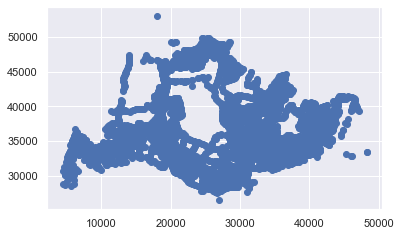

In [5]:
gdf_BusStop.plot()

### Using Geopandas to Import Subzone

In [6]:
#Load into GeoDataFrame
gdf_Subzone = gpd.read_file('MP14_SUBZONE_WEB_PL.shp')

In [7]:
gdf_Subzone

OBJECTID  SUBZONE_NO          SUBZONE_N SUBZONE_C CA_IND  \
0           1           1       MARINA SOUTH    MSSZ01      Y   
1           2           1       PEARL'S HILL    OTSZ01      Y   
2           3           3          BOAT QUAY    SRSZ03      Y   
3           4           8     HENDERSON HILL    BMSZ08      N   
4           5           3            REDHILL    BMSZ03      N   
..        ...         ...                ...       ...    ...   
318       319           7       CONEY ISLAND    PGSZ07      N   
319       320           9        NORTH COAST    WDSZ09      N   
320       321           6  SEMBAWANG STRAITS    SBSZ06      N   
321       322           7        THE WHARVES    SBSZ07      N   
322       323           8       SENOKO NORTH    SBSZ08      N   

          PLN_AREA_N PLN_AREA_C           REGION_N REGION_C           INC_CRC  \
0       MARINA SOUTH         MS     CENTRAL REGION       CR  5ED7EB253F99252E   
1             OUTRAM         OT     CENTRAL REGION       CR  8C7149B9EB32EEFC   
2    SINGAPORE RIVER         SR     CENTRAL REGION       CR  C35FEFF02B13E0E5   
3        BUKIT MERAH         BM     CENTRAL REGION       CR  3775D82C5DDBEFBD   
4        BUKIT MERAH         BM     CENTRAL REGION       CR  85D9ABEF0A40678F   
..               ...        ...                ...      ...               ...   
318          PUNGGOL         PG  NORTH-EAST REGION      NER  8B13A48924BBE015   
319        WOODLANDS         WD       NORTH REGION       NR  898B2436858382A1   
320        SEMBAWANG         SB       NORTH REGION       NR  AA1A638CA2B0D5B7   
321        SEMBAWANG         SB       NORTH REGION       NR  6D89875A351CF51C   
322        SEMBAWANG         SB       NORTH REGION       NR  A800CBEE879C1BF9   

     FMEL_UPD_D      X_ADDR      Y_ADDR    SHAPE_Leng    SHAPE_Area  \
0    2014-12-05  31595.8357  29220.1873   5267.381024  1.630379e+06   
1    2014-12-05  28679.0634  29782.0519   3506.107376  5.598162e+05   
2    2014-12-05  29654.9594  29974.6553   1740.925766  1.608075e+05   
3    2014-12-05  26782.8261  29933.7651   3313.624904  5.954289e+05   
4    2014-12-05  26201.9580  30005.7035   2825.594099  3.874294e+05   
..          ...         ...         ...           ...           ...   
318  2014-12-05  37928.4976  43351.3743   5670.137057  1.200805e+06   
319  2014-12-05  22147.0360  48031.5522  10847.881981  2.450784e+06   
320  2014-12-05  28352.4774  48918.2749   7217.388372  1.540734e+06   
321  2014-12-05  26945.0680  49552.7904  11828.877719  1.635808e+06   
322  2014-12-05  24665.7878  49482.5953   7392.128851  2.241387e+06   

                                              geometry  
0    POLYGON ((31495.560 30140.012, 31980.957 29671...  
1    POLYGON ((29092.275 30021.888, 29119.641 30006...  
2    POLYGON ((29932.332 29879.120, 29947.317 29858...  
3    POLYGON ((27131.276 30059.727, 27088.334 29709...  
4    POLYGON ((26451.027 30396.458, 26440.474 30361...  
..                                                 ...  
318  POLYGON ((38738.411 42607.611, 38742.738 42574...  
319  POLYGON ((21693.062 48119.514, 21702.562 48125...  
320  POLYGON ((29302.173 48931.391, 29141.750 48832...  
321  POLYGON ((26219.892 50256.054, 26219.853 50247...  
322  POLYGON ((26047.112 50238.703, 26048.615 50223...  

[323 rows x 16 columns]

### Left join BusStops with Subzone

In [8]:
from geopandas.tools import sjoin
join_left_df_BusStop = sjoin(gdf_BusStop, gdf_Subzone, how="left")
join_left_df_BusStop

BUS_STOP_N BUS_ROOF_N                   LOC_DESC  \
0         78221        B06                BLK 231A CP   
1         63359        B01          HOUGANG SWIM CPLX   
2         64141        B13             AFT JLN TELAWI   
3         83139        B07           AFT JOO CHIAT PL   
4         55231        B02  OPP SBST ANG MO KIO DEPOT   
...         ...        ...                        ...   
5132      24539        B03              DUNDEE MARINE   
5133      46441        B02                    BLK 816   
5134      64391        B04                    BLK 831   
5135      10389        B01                     BLK 48   
5136      28061        B09                  J GATEWAY   

                         geometry  index_right  OBJECTID  SUBZONE_NO  \
0     POINT (42227.955 39563.156)        245.0     246.0         5.0   
1     POINT (34065.748 39047.458)        207.0     208.0         4.0   
2     POINT (36335.296 38525.741)        208.0     209.0         3.0   
3     POINT (36530.265 32981.180)        166.0     167.0         5.0   
4     POINT (29669.934 40841.514)        227.0     228.0        10.0   
...                           ...          ...       ...         ...   
5132   POINT (8211.954 31924.108)         78.0      79.0         5.0   
5133  POINT (23143.267 47097.652)        305.0     306.0         2.0   
5134  POINT (34273.668 39267.502)        242.0     243.0         1.0   
5135  POINT (27156.674 30126.309)          6.0       7.0         9.0   
5136  POINT (17918.729 35318.219)        134.0     135.0         5.0   

            SUBZONE_N SUBZONE_C CA_IND   PLN_AREA_N PLN_AREA_C  \
0     PASIR RIS DRIVE    PRSZ05      N    PASIR RIS         PR   
1        HOUGANG WEST    HGSZ04      N      HOUGANG         HG   
2     PAYA LEBAR WEST    PLSZ03      N   PAYA LEBAR         PL   
3             FRANKEL    BDSZ05      N        BEDOK         BD   
4        YIO CHU KANG    AMSZ10      N   ANG MO KIO         AM   
...               ...       ...    ...          ...        ...   
5132   PIONEER SECTOR    PNSZ05      N      PIONEER         PN   
5133          MIDVIEW    WDSZ02      N    WOODLANDS         WD   
5134  HOUGANG CENTRAL    HGSZ01      N      HOUGANG         HG   
5135    BUKIT HO SWEE    BMSZ09      N  BUKIT MERAH         BM   
5136   JURONG GATEWAY    JESZ05      N  JURONG EAST         JE   

               REGION_N REGION_C           INC_CRC  FMEL_UPD_D      X_ADDR  \
0           EAST REGION       ER  2B73597AF3F174F3  2014-12-05  42032.4580   
1     NORTH-EAST REGION      NER  27B0E0BDE3579753  2014-12-05  33849.2205   
2           EAST REGION       ER  4BADA58E2612A6E2  2014-12-05  36649.3106   
3           EAST REGION       ER  B34F041CC4B050EC  2014-12-05  37694.5519   
4     NORTH-EAST REGION      NER  5E2B16BB381BAEA4  2014-12-05  29443.7447   
...                 ...      ...               ...         ...         ...   
5132        WEST REGION       WR  F3241D6C0FEF13ED  2014-12-05   8872.7501   
5133       NORTH REGION       NR  42D5F52D334C615F  2014-12-05  23349.7600   
5134  NORTH-EAST REGION      NER  C4419A9A8D05E0DF  2014-12-05  34470.7005   
5135     CENTRAL REGION       CR  7839A8577144EFE2  2014-12-05  27680.0627   
5136        WEST REGION       WR  857DAA77ED3346BF  2014-12-05  17912.9778   

          Y_ADDR   SHAPE_Leng    SHAPE_Area  
0     38988.2187  5311.060366  1.639669e+06  
1     39506.8724  6424.482139  1.328876e+06  
2     39403.4873  5898.475695  6.098947e+05  
3     33007.2679  8750.386291  4.297141e+06  
4     40836.0207  4533.218364  9.094186e+05  
...          ...          ...           ...  
5132  31423.4434  8489.982578  2.796007e+06  
5133  46841.1143  4159.201440  9.364155e+05  
5134  39076.5963  2759.815466  4.417334e+05  
5135  30230.8610  3275.312488  5.517320e+05  
5136  35033.9061  3096.984110  5.546237e+05  

[5137 rows x 20 columns]

### Filter out relevant rows for BusStop_Subzone

In [9]:
BusStop_Subzone = join_left_df_BusStop.filter(['BUS_STOP_N','SUBZONE_N','PLN_AREA_N', 'REGION_N'], axis=1)
BusStop_Subzone

BUS_STOP_N        SUBZONE_N   PLN_AREA_N           REGION_N
0         78221  PASIR RIS DRIVE    PASIR RIS        EAST REGION
1         63359     HOUGANG WEST      HOUGANG  NORTH-EAST REGION
2         64141  PAYA LEBAR WEST   PAYA LEBAR        EAST REGION
3         83139          FRANKEL        BEDOK        EAST REGION
4         55231     YIO CHU KANG   ANG MO KIO  NORTH-EAST REGION
...         ...              ...          ...                ...
5132      24539   PIONEER SECTOR      PIONEER        WEST REGION
5133      46441          MIDVIEW    WOODLANDS       NORTH REGION
5134      64391  HOUGANG CENTRAL      HOUGANG  NORTH-EAST REGION
5135      10389    BUKIT HO SWEE  BUKIT MERAH     CENTRAL REGION
5136      28061   JURONG GATEWAY  JURONG EAST        WEST REGION

[5137 rows x 4 columns]

In [10]:
#BusStop_Subzone_count = BusStop_Subzone.groupby('SUBZONE_N').count()
#BusStop_Subzone_count = BusStop_Subzone_count.filter(['SUBZONE_N', 'BUS_STOP_N'], axis=1)
#BusStop_Subzone_count

### Using Geopandas to Import MRT Stops

In [11]:
#Load into GeoDataFrame
gdf_MRTStop = gpd.read_file('MRTLRTStnPtt.shp')

In [12]:
gdf_MRTStop.head()

OBJECTID                    STN_NAME STN_NO                     geometry
0         1           EUNOS MRT STATION    EW7  POINT (35782.955 33560.078)
1         2  CHINESE GARDEN MRT STATION   EW25  POINT (16790.747 36056.302)
2         3          KHATIB MRT STATION   NS14  POINT (27962.311 44352.568)
3         4          KRANJI MRT STATION    NS7  POINT (20081.697 45214.548)
4         5         REDHILL MRT STATION   EW18  POINT (26163.478 30218.820)

<AxesSubplot:>

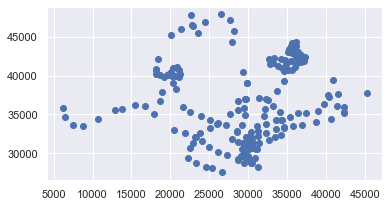

In [13]:
gdf_MRTStop.plot()

### Left join MRTStops with Subzone

In [14]:
from geopandas.tools import sjoin
join_left_df_MRTStop = sjoin(gdf_MRTStop, gdf_Subzone, how="left")
join_left_df_MRTStop
# Note the NaNs where the point did not intersect a boro

OBJECTID_left                     STN_NAME STN_NO  \
0                1            EUNOS MRT STATION    EW7   
1                2   CHINESE GARDEN MRT STATION   EW25   
2                3           KHATIB MRT STATION   NS14   
3                4           KRANJI MRT STATION    NS7   
4                5          REDHILL MRT STATION   EW18   
..             ...                          ...    ...   
180            189    TELOK BLANGAH MRT STATION   CC28   
181            190       TELOK AYER MRT STATION   DT18   
182            191           NEWTON MRT STATION   NS21   
183              0         CANBERRA MRT STATION   NS12   
184              0  WOODLANDS NORTH MRT STATION    TE1   

                        geometry  index_right  OBJECTID_right  SUBZONE_NO  \
0    POINT (35782.955 33560.078)          169             170           5   
1    POINT (16790.747 36056.302)          146             147           4   
2    POINT (27962.311 44352.568)          316             317           8   
3    POINT (20081.697 45214.548)          280             281           2   
4    POINT (26163.478 30218.820)            4               5           3   
..                           ...          ...             ...         ...   
180  POINT (25376.847 28138.967)           23              24           1   
181  POINT (29667.622 29414.587)           35              36           3   
182  POINT (28519.362 32735.207)          120             121           3   
183  POINT (27598.622 47200.242)          307             308           2   
184  POINT (22699.993 47770.400)          291             292           7   

             SUBZONE_N SUBZONE_C CA_IND    PLN_AREA_N PLN_AREA_C  \
0         GEYLANG EAST    GLSZ05      N       GEYLANG         GL   
1             LAKESIDE    JESZ04      N   JURONG EAST         JE   
2               KHATIB    YSSZ08      N        YISHUN         YS   
3            TURF CLUB    SKSZ02      N  SUNGEI KADUT         SK   
4              REDHILL    BMSZ03      N   BUKIT MERAH         BM   
..                 ...       ...    ...           ...        ...   
180    MARITIME SQUARE    BMSZ01      N   BUKIT MERAH         BM   
181          CHINATOWN    OTSZ03      Y        OUTRAM         OT   
182      NEWTON CIRCUS    NTSZ03      Y        NEWTON         NT   
183  SEMBAWANG SPRINGS    SBSZ02      N     SEMBAWANG         SB   
184     GREENWOOD PARK    WDSZ07      N     WOODLANDS         WD   

           REGION_N REGION_C           INC_CRC  FMEL_UPD_D      X_ADDR  \
0    CENTRAL REGION       CR  58687154BD252A0A  2014-12-05  35237.1681   
1       WEST REGION       WR  3BBFD45071B70ECF  2014-12-05  16697.0118   
2      NORTH REGION       NR  DC75517DA31123DB  2014-12-05  27480.6357   
3      NORTH REGION       NR  17459E60C3EEAF30  2014-12-05  20234.6006   
4    CENTRAL REGION       CR  85D9ABEF0A40678F  2014-12-05  26201.9580   
..              ...      ...               ...         ...         ...   
180  CENTRAL REGION       CR  C1AC31ABF9978DDB  2014-12-05  25805.7867   
181  CENTRAL REGION       CR  0FF1661344C84AED  2014-12-05  29153.9676   
182  CENTRAL REGION       CR  8B2F19EEE51EDA60  2014-12-05  28587.1626   
183    NORTH REGION       NR  C739B507A1ACBDB3  2014-12-05  27076.8118   
184    NORTH REGION       NR  A38714A4F4163DCE  2014-12-05  22608.3894   

         Y_ADDR    SHAPE_Leng    SHAPE_Area  
0    33246.0587   7028.340071  2.579087e+06  
1    35114.9062   8828.633830  3.108023e+06  
2    44420.6884   4956.145735  1.432913e+06  
3    44507.1901   7665.676019  3.291406e+06  
4    30005.7035   2825.594099  3.874294e+05  
..          ...           ...           ...  
180  27911.4193  13737.116181  2.701634e+06  
181  29158.0443   4297.599910  5.872227e+05  
182  32653.9428   2399.407300  2.135816e+05  
183  46959.0886   4212.042247  1.099395e+06  
184  47660.0645   4620.865567  1.281297e+06  

[185 rows x 20 columns]

### Filter out relevant rows for MRTStop_Subzone

In [15]:
MRTStop_Subzone = join_left_df_MRTStop.filter(['STN_NAME', 'STN_NO', 'SUBZONE_N', 'PLN_AREA_N', 'REGION_N'], axis=1)
MRTStop_Subzone

STN_NAME STN_NO          SUBZONE_N    PLN_AREA_N  \
0              EUNOS MRT STATION    EW7       GEYLANG EAST       GEYLANG   
1     CHINESE GARDEN MRT STATION   EW25           LAKESIDE   JURONG EAST   
2             KHATIB MRT STATION   NS14             KHATIB        YISHUN   
3             KRANJI MRT STATION    NS7          TURF CLUB  SUNGEI KADUT   
4            REDHILL MRT STATION   EW18            REDHILL   BUKIT MERAH   
..                           ...    ...                ...           ...   
180    TELOK BLANGAH MRT STATION   CC28    MARITIME SQUARE   BUKIT MERAH   
181       TELOK AYER MRT STATION   DT18          CHINATOWN        OUTRAM   
182           NEWTON MRT STATION   NS21      NEWTON CIRCUS        NEWTON   
183         CANBERRA MRT STATION   NS12  SEMBAWANG SPRINGS     SEMBAWANG   
184  WOODLANDS NORTH MRT STATION    TE1     GREENWOOD PARK     WOODLANDS   

           REGION_N  
0    CENTRAL REGION  
1       WEST REGION  
2      NORTH REGION  
3      NORTH REGION  
4    CENTRAL REGION  
..              ...  
180  CENTRAL REGION  
181  CENTRAL REGION  
182  CENTRAL REGION  
183    NORTH REGION  
184    NORTH REGION  

[185 rows x 5 columns]

### EXAMPLE: MRT Stops by tap-in tap-out volume

In [16]:
MRTStop_TITO = pd.read_csv('2.8_transport_node_train_202101.csv')    
sum_column = MRTStop_TITO["TOTAL_TAP_IN_VOLUME"] + MRTStop_TITO["TOTAL_TAP_OUT_VOLUME"]
MRTStop_TITO["TOTAL_TAP_VOLUME"] = sum_column
MRTStop_TITO = MRTStop_TITO.filter(['PT_CODE', 'TOTAL_TAP_VOLUME'], axis=1)
MRTStop_TITO = MRTStop_TITO.groupby('PT_CODE')['TOTAL_TAP_VOLUME'].sum()
MRTStop_TITO

PT_CODE
BP10    183991
BP11    165351
BP12    126103
BP13     65108
BP2     151841
         ...  
SW6     171376
SW7     127504
SW8     101888
TE1      98724
TE3     141889
Name: TOTAL_TAP_VOLUME, Length: 159, dtype: int64

### EXAMPLE: Merge MRT Stops by tap-in tap-out volume with MRTStop_Subzone

In [17]:
testing = pd.merge(MRTStop_Subzone, MRTStop_TITO, how='inner', left_on = 'STN_NO', right_on = 'PT_CODE', validate='many_to_many')
testing.head(10)

STN_NAME STN_NO            SUBZONE_N     PLN_AREA_N  \
0           EUNOS MRT STATION    EW7         GEYLANG EAST        GEYLANG   
1  CHINESE GARDEN MRT STATION   EW25             LAKESIDE    JURONG EAST   
2          KHATIB MRT STATION   NS14               KHATIB         YISHUN   
3          KRANJI MRT STATION    NS7            TURF CLUB   SUNGEI KADUT   
4         REDHILL MRT STATION   EW18              REDHILL    BUKIT MERAH   
5         YEW TEE MRT STATION    NS5              YEW TEE  CHOA CHU KANG   
6         PIONEER MRT STATION   EW28  JURONG WEST CENTRAL    JURONG WEST   
7    COMMONWEALTH MRT STATION   EW20         COMMONWEALTH     QUEENSTOWN   
8           SIMEI MRT STATION    EW3                SIMEI       TAMPINES   
9       ADMIRALTY MRT STATION   NS10       WOODLANDS EAST      WOODLANDS   

         REGION_N  TOTAL_TAP_VOLUME  
0  CENTRAL REGION            642053  
1     WEST REGION            406676  
2    NORTH REGION           1448844  
3    NORTH REGION            262221  
4  CENTRAL REGION            766934  
5     WEST REGION           1410006  
6     WEST REGION           1190585  
7  CENTRAL REGION            640451  
8     EAST REGION            769284  
9    NORTH REGION           2150081

### EXAMPLE: Number of MRT Stops by Subzone

In [18]:
MRTStop_Subzone_count = testing.groupby('SUBZONE_N').count()
MRTStop_Subzone_count = MRTStop_Subzone_count.rename(columns={'STN_NAME': 'STN_NUM'})
MRTStop_Subzone_count = MRTStop_Subzone_count.filter(['SUBZONE_N', 'STN_NUM'], axis=1)
MRTStop_Subzone_count

STN_NUM
SUBZONE_N               
ALJUNIED               3
ANAK BUKIT             1
ANCHORVALE             3
BANGKIT                2
BEDOK NORTH            1
...                  ...
WOODLANDS SOUTH        1
WOODLANDS WEST         1
YEW TEE                1
YIO CHU KANG           1
YISHUN WEST            1

[102 rows x 1 columns]

### EXAMPLE: Filter 'testing' and groupby SUBZONE

In [19]:
MRTStop_testing = testing.filter(['SUBZONE_N', 'TOTAL_TAP_VOLUME', 'STN_NUM'], axis=1)
MRTStop_testing = MRTStop_testing.groupby('SUBZONE_N')['TOTAL_TAP_VOLUME'].sum()
MRTStop_testing

SUBZONE_N
ALJUNIED           1489384
ANAK BUKIT          538115
ANCHORVALE          364099
BANGKIT             232430
BEDOK NORTH        1460136
                    ...   
WOODLANDS SOUTH     141889
WOODLANDS WEST     1005198
YEW TEE            1410006
YIO CHU KANG       1043477
YISHUN WEST        2484007
Name: TOTAL_TAP_VOLUME, Length: 102, dtype: int64

### EXAMPLE: Merge MRTStop_testing and MRTStop_Subzone_count datasets

In [20]:
MRTStop_testing = pd.merge(MRTStop_testing, MRTStop_Subzone_count, how='inner', on = 'SUBZONE_N', validate='many_to_many')
MRTStop_testing

TOTAL_TAP_VOLUME  STN_NUM
SUBZONE_N                                 
ALJUNIED                  1489384        3
ANAK BUKIT                 538115        1
ANCHORVALE                 364099        3
BANGKIT                    232430        2
BEDOK NORTH               1460136        1
...                           ...      ...
WOODLANDS SOUTH            141889        1
WOODLANDS WEST            1005198        1
YEW TEE                   1410006        1
YIO CHU KANG              1043477        1
YISHUN WEST               2484007        1

[102 rows x 2 columns]

# Subzone Demographics Data for 2011-2019 and 2020
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Extracting Base Datasets

#### Filter population by subzone, age group and type of dwelling from sheets and find list of subzones

### 2020

In [21]:
dT2020raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Total)'); x = 69840
dT2020raw = dT2020raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw['SUBZONE_N'] = dT2020raw['SUBZONE_N'].str.upper()
dT2020raw = dT2020raw[:x]
dT2020rawcopy = dT2020raw
dT2020raw = dT2020raw[dT2020raw['SUBZONE_N'] != 'TOTAL']
dT2020raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
dT2020raw

Planning Area               SUBZONE_N  Age Group  \
360      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
361      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
362      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
363      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
364      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
...             ...                     ...        ...   
69835        Yishun             YISHUN WEST  90 & Over   
69836        Yishun             YISHUN WEST  90 & Over   
69837        Yishun             YISHUN WEST  90 & Over   
69838        Yishun             YISHUN WEST  90 & Over   
69839        Yishun             YISHUN WEST  90 & Over   

                        Type of Dwelling  2020  
360                                Total  4810  
361                           Total HDB^  2830  
362                 1- and 2-Room Flats*     -  
363                         3-Room Flats   400  
364                         4-Room Flats   630  
...                                  ...   ...  
69835                       4-Room Flats    90  
69836         5-Room and Executive Flats    20  
69837  Condominiums and Other Apartments    10  
69838                  Landed Properties     -  
69839                             Others    50  

[59760 rows x 5 columns]

In [22]:
listOfSubzones = dT2020raw.SUBZONE_N.unique()

### 2011-2019

In [23]:
dT201119raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)'); y = 68219
dT201119raw = dT201119raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw['SUBZONE_N'] = dT201119raw['SUBZONE_N'].str.upper()
dT201119raw = dT201119raw[:y]
dT201119rawcopy = dT201119raw
dT201119raw = dT201119raw[dT201119raw['SUBZONE_N'] != 'TOTAL']
dT201119raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw

Planning Area               SUBZONE_N  Age Group  \
360      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
361      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
362      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
363      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
364      Ang Mo Kio  ANG MO KIO TOWN CENTRE      Total   
...             ...                     ...        ...   
68214        Yishun             YISHUN WEST  90 & Over   
68215        Yishun             YISHUN WEST  90 & Over   
68216        Yishun             YISHUN WEST  90 & Over   
68217        Yishun             YISHUN WEST  90 & Over   
68218        Yishun             YISHUN WEST  90 & Over   

                        Type of Dwelling  2011  2012  2013  2014  2015  2016  \
360                                Total  4960  4850  4880  4970  5020  4980   
361                           Total HDB^  3400  3350  3330  3280  3250  3150   
362                 1- and 2-Room Flats*     -     -     -     -     -     -   
363                         3-Room Flats   510   490   470   460   460   450   
364                         4-Room Flats   770   780   770   760   730   700   
...                                  ...   ...   ...   ...   ...   ...   ...   
68214                       3-Room Flats    30    40    50    40    50    50   
68215                       4-Room Flats    40    50    50    50    60    70   
68216         5-Room and Executive Flats    20    20    20    20    20    20   
68217  Condominiums and Other Apartments     -     -     -     -     -    10   
68218                  Landed Properties     -     -     -     -     -     -   

       2017  2018  2019  
360    4940  4820  4820  
361    3090  2950  2880  
362       -     -     -  
363     440   430   420  
364     690   650   630  
...     ...   ...   ...  
68214    60    60    60  
68215    70    70    80  
68216    20    20    20  
68217    10    10    10  
68218     -     -     -  

[58139 rows x 13 columns]

In [24]:
listOfSubzones1119 = dT201119raw.SUBZONE_N.unique()

### Extracting Gender

#### Filter male and female population by subzone from sheets and then derive percentage of population that are male by dividing male population by total population

#### NEW: - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value  - .insert() = insert value/column to a specified index

### 2020

In [25]:
dT2020raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Male)'); x = 69840
dT2020raw_male = dT2020raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_male['SUBZONE_N'] = dT2020raw_male['SUBZONE_N'].str.upper()
dT2020raw_male = dT2020raw_male[:x]
dT2020raw_malecopy = dT2020raw_male
dT2020raw_male = dT2020raw_male[dT2020raw_male['SUBZONE_N'] != 'TOTAL']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Age Group'] == 'Total']
dT2020raw_male = dT2020raw_male[dT2020raw_male['Type of Dwelling'] == 'Total']
dT2020raw_male = dT2020raw_male.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_male['2020'] = dT2020raw_male['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_male

SUBZONE_N   2020
360    ANG MO KIO TOWN CENTRE   2260
540                 CHENG SAN  13480
720                CHONG BOON  12860
900               KEBUN BAHRU  10660
1080          SEMBAWANG HILLS   3210
...                       ...    ...
68940              SPRINGLEAF   2180
69120          YISHUN CENTRAL   1290
69300             YISHUN EAST  30030
69480            YISHUN SOUTH  20670
69660             YISHUN WEST  26720

[332 rows x 2 columns]

In [26]:
dT2020raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Female)'); x = 69840
dT2020raw_female = dT2020raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw_female['SUBZONE_N'] = dT2020raw_female['SUBZONE_N'].str.upper()
dT2020raw_female = dT2020raw_female[:x]
dT2020raw_femalecopy = dT2020raw_female
dT2020raw_female = dT2020raw_female[dT2020raw_female['SUBZONE_N'] != 'TOTAL']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Age Group'] == 'Total']
dT2020raw_female = dT2020raw_female[dT2020raw_female['Type of Dwelling'] == 'Total']
dT2020raw_female = dT2020raw_female.filter(['SUBZONE_N', '2020'], axis=1)
dT2020raw_female['2020'] = dT2020raw_female['2020'].replace({'-': 0}).astype(int) #Replace '-' with '0'
dT2020raw_female

SUBZONE_N   2020
360    ANG MO KIO TOWN CENTRE   2550
540                 CHENG SAN  14600
720                CHONG BOON  13640
900               KEBUN BAHRU  11970
1080          SEMBAWANG HILLS   3650
...                       ...    ...
68940              SPRINGLEAF   2190
69120          YISHUN CENTRAL   1340
69300             YISHUN EAST  30640
69480            YISHUN SOUTH  21580
69660             YISHUN WEST  27190

[332 rows x 2 columns]

In [27]:
#Male percentage (2020)
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020'] + dT2020raw_female['2020'])
dT2020_male_perc = pd.DataFrame(dT2020raw_male['2020']/dT2020_male_perc['2020'])
dT2020_male_perc.rename(columns={'2020': 'Male Percentage'}, inplace=True)
dT2020_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2020'], 
            dT2020_male_perc.columns))
dT2020_male_perc.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020_male_perc

SUBZONE_N            2020
                              Male Percentage
360    ANG MO KIO TOWN CENTRE        0.469854
540                 CHENG SAN        0.480057
720                CHONG BOON        0.485283
900               KEBUN BAHRU        0.471056
1080          SEMBAWANG HILLS        0.467930
...                       ...             ...
68940              SPRINGLEAF        0.498856
69120          YISHUN CENTRAL        0.490494
69300             YISHUN EAST        0.494973
69480            YISHUN SOUTH        0.489231
69660             YISHUN WEST        0.495641

[332 rows x 2 columns]

### 2011-2019

In [27]:
dT201119raw_male = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Male)'); y = 68219
dT201119raw_male = dT201119raw_male.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_male['SUBZONE_N'] = dT201119raw_male['SUBZONE_N'].str.upper()
dT201119raw_male = dT201119raw_male[:y]
dT201119raw_malecopy = dT201119raw_male
dT201119raw_male = dT201119raw_male[dT201119raw_male['SUBZONE_N'] != 'TOTAL']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Age Group'] == 'Total']
dT201119raw_male = dT201119raw_male[dT201119raw_male['Type of Dwelling'] == 'Total']
dT201119raw_male = dT201119raw_male.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_male[str(2011+i)] = dT201119raw_male[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_male

SUBZONE_N   2011   2012   2013   2014   2015   2016  \
360    ANG MO KIO TOWN CENTRE   2400   2340   2330   2370   2370   2350   
540                 CHENG SAN  14690  15060  14990  14770  14400  14030   
720                CHONG BOON  14620  14420  14250  13980  13590  13180   
900               KEBUN BAHRU  12450  12250  12130  11830  11450  11130   
1080          SEMBAWANG HILLS   3260   3250   3270   3230   3240   3240   
...                       ...    ...    ...    ...    ...    ...    ...   
67320              SPRINGLEAF   1910   1930   1940   1950   1930   1990   
67500          YISHUN CENTRAL    790    770    780    780    740    730   
67680             YISHUN EAST  16970  18240  19080  22030  27190  28120   
67860            YISHUN SOUTH  19820  19660  19570  19680  19050  18720   
68040             YISHUN WEST  29980  29830  29630  29070  28790  29270   

        2017   2018   2019  
360     2330   2260   2250  
540    13670  13550  13520  
720    12970  13190  13050  
900    10810  10870  10820  
1080    3190   3140   3190  
...      ...    ...    ...  
67320   2010   2110   2180  
67500    710    680   1010  
67680  28530  28210  29510  
67860  18720  19990  20570  
68040  28540  27710  27150  

[323 rows x 10 columns]

In [28]:
dT201119raw_female = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Female)'); y = 68219
dT201119raw_female = dT201119raw_female.rename(columns={'Subzone': 'SUBZONE_N'})
dT201119raw_female['SUBZONE_N'] = dT201119raw_female['SUBZONE_N'].str.upper()
dT201119raw_female = dT201119raw_female[:y]
dT201119raw_femalecopy = dT201119raw_female
dT201119raw_female = dT201119raw_female[dT201119raw_female['SUBZONE_N'] != 'TOTAL']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Age Group'] == 'Total']
dT201119raw_female = dT201119raw_female[dT201119raw_female['Type of Dwelling'] == 'Total']
dT201119raw_female = dT201119raw_female.filter(['SUBZONE_N', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
for i in range(9):
    dT201119raw_female[str(2011+i)] = dT201119raw_female[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_female

SUBZONE_N   2011   2012   2013   2014   2015   2016  \
360    ANG MO KIO TOWN CENTRE   2570   2520   2560   2600   2640   2630   
540                 CHENG SAN  15450  15960  15920  15630  15370  15030   
720                CHONG BOON  15240  15040  14760  14680  14310  13940   
900               KEBUN BAHRU  13250  13050  12890  12710  12460  12180   
1080          SEMBAWANG HILLS   3630   3660   3640   3640   3650   3670   
...                       ...    ...    ...    ...    ...    ...    ...   
67320              SPRINGLEAF   1910   1960   1960   1960   1940   2020   
67500          YISHUN CENTRAL    800    800    790    770    750    730   
67680             YISHUN EAST  17010  18300  19280  22360  27690  28630   
67860            YISHUN SOUTH  20220  20060  20000  20260  19790  19460   
68040             YISHUN WEST  30040  29940  29840  29390  29090  29550   

        2017   2018   2019  
360     2610   2560   2570  
540    14690  14760  14660  
720    13760  13890  13770  
900    11800  12100  12150  
1080    3610   3620   3640  
...      ...    ...    ...  
67320   2060   2120   2170  
67500    710    680   1010  
67680  29010  28730  30100  
67860  19530  20880  21490  
68040  28930  28060  27540  

[323 rows x 10 columns]

In [30]:
#Male percentage (2011-2019)
dT201119_male_perc = pd.DataFrame(listOfSubzones1119, columns = ['SUBZONE_N'])
for i in range(9):
    totalMF = pd.DataFrame(dT201119raw_male[str(2011+i)] + dT201119raw_female[str(2011+i)])
    percMF = list(dT201119raw_male[str(2011+i)]/totalMF[str(2011+i)])
    dT201119_male_perc.insert(1, str(2011+i), percMF, True)
dT201119_male_perc = dT201119_male_perc.filter(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'])
dT201119_male_perc = dT201119_male_perc.rename(columns={'2019': 'Male Percentage', '2018': 'Male Percentage', '2017': 'Male Percentage', '2016': 'Male Percentage', '2015': 'Male Percentage', '2014': 'Male Percentage', '2013': 'Male Percentage', '2012': 'Male Percentage', '2011': 'Male Percentage'})
dT201119_male_perc.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'], 
            dT201119_male_perc.columns))
dT201119_male_perc.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_male_perc

SUBZONE_N            2019            2018            2017  \
                            Male Percentage Male Percentage Male Percentage   
0    ANG MO KIO TOWN CENTRE        0.466805        0.468880        0.471660   
1                 CHENG SAN        0.479773        0.478629        0.482017   
2                CHONG BOON        0.486577        0.487075        0.485223   
3               KEBUN BAHRU        0.471049        0.473226        0.478107   
4           SEMBAWANG HILLS        0.467057        0.464497        0.469118   
..                      ...             ...             ...             ...   
318              SPRINGLEAF        0.501149        0.498818        0.493857   
319          YISHUN CENTRAL        0.500000        0.500000        0.500000   
320             YISHUN EAST        0.495051        0.495434        0.495829   
321            YISHUN SOUTH        0.489063        0.489112        0.489412   
322             YISHUN WEST        0.496434        0.496862        0.496607   

               2016            2015            2014            2013  \
    Male Percentage Male Percentage Male Percentage Male Percentage   
0          0.471888        0.473054        0.476861        0.476483   
1          0.482794        0.483708        0.485855        0.484956   
2          0.485988        0.487097        0.487788        0.491210   
3          0.477477        0.478879        0.482070        0.484812   
4          0.468886        0.470247        0.470160        0.473227   
..              ...             ...             ...             ...   
318        0.496259        0.498708        0.498721        0.497436   
319        0.500000        0.496644        0.503226        0.496815   
320        0.495507        0.495445        0.496283        0.497393   
321        0.490309        0.490474        0.492739        0.494567   
322        0.497620        0.497408        0.497263        0.498234   

               2012            2011  
    Male Percentage Male Percentage  
0          0.481481        0.482897  
1          0.485493        0.487392  
2          0.489477        0.489618  
3          0.484190        0.484436  
4          0.470333        0.473149  
..              ...             ...  
318        0.496144        0.500000  
319        0.490446        0.496855  
320        0.499179        0.499411  
321        0.494965        0.495005  
322        0.499080        0.499500  

[323 rows x 10 columns]

### Extracting Age Groups

#### Filter population by subzone and age group and pivot the data frame, then group population into 4 age groups

#### NEW - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value - .pivot() = reshape dataframe by column/index values  - .insert() = insert value/column to a specified index - . merge() = merge/join datasets

### 2020


In [31]:
dT2020raw_age = dT2020raw[dT2020raw['Type of Dwelling'] == 'Total']
dT2020raw_age = dT2020raw_age.filter(['SUBZONE_N', 'Age Group', '2020'], axis=1)
dT2020raw_age = dT2020raw_age[dT2020raw_age['Age Group'] != 'Total']
dT2020raw_age['2020'] = dT2020raw_age['2020'].replace({'-': 0}).astype(int)
dT2020raw_age = dT2020raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_age['Age Group'] = dT2020raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT2020raw_age = pd.pivot(dT2020raw_age.assign(idx = dT2020raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT2020raw_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020raw_age

SUBZONE_N    2020                                  \
Age Group                         00 - 04 05 - 09 10 - 14 15 - 19 20 - 24   
idx                                                                         
0          ANG MO KIO TOWN CENTRE     170     240     280     320     270   
1                       CHENG SAN    1060    1040    1040    1160    1330   
2                      CHONG BOON     860     840    1010    1060    1310   
3                     KEBUN BAHRU     660     810     950    1010    1170   
4                 SEMBAWANG HILLS     210     310     400     460     500   
..                            ...     ...     ...     ...     ...     ...   
327                    SPRINGLEAF     130     170     250     300     320   
328                YISHUN CENTRAL     100     120     150     130     170   
329                   YISHUN EAST    4270    4410    3270    2970    3300   
330                  YISHUN SOUTH    1930    1690    1920    2090    2500   
331                   YISHUN WEST    1780    1990    2440    2790    3410   

                                                                           \
Age Group 25 - 29 30 - 34 35 - 39 40 - 44 45 - 49 50 - 54 55 - 59 60 - 64   
idx                                                                         
0             280     290     330     400     470     370     320     300   
1            1710    2000    2150    2070    2200    2050    2120    2120   
2            1610    1890    1730    1800    1820    1900    2090    2140   
3            1420    1410    1450    1620    1790    1710    1800    1750   
4             500     350     310     370     550     540     550     480   
..            ...     ...     ...     ...     ...     ...     ...     ...   
327           410     250     180     260     310     290     370     350   
328           220     200     210     230     220     190     210     170   
329          4220    5420    6320    5050    4090    3850    4190    3440   
330          3600    3720    2940    2810    3010    2890    3690    3250   
331          3810    3590    3600    3810    4230    4330    4840    4500   

                                                             
Age Group 65 - 69 70 - 74 75 - 79 80 - 84 85 - 89 90 & Over  
idx                                                          
0             250     230     140     100      40        20  
1            2170    1730     960     640     350       180  
2            2100    1800    1130     780     430       200  
3            1690    1430     840     620     340       160  
4             410     370     230     150     100        60  
..            ...     ...     ...     ...     ...       ...  
327           290     240     120      80      30        20  
328           150      80      50      30      20        10  
329          2590    1670     730     510     250       120  
330          2570    1740     830     580     320       170  
331          3580    2320    1280     880     480       240  

[332 rows x 20 columns]

In [32]:
dT2020_raw_age_0019 = (dT2020raw_age['2020']['00 - 04'] +
                       dT2020raw_age['2020']['05 - 09'] +
                       dT2020raw_age['2020']['10 - 14'] +
                       dT2020raw_age['2020']['15 - 19'])
dT2020_raw_age_2039 = (dT2020raw_age['2020']['20 - 24'] +
                       dT2020raw_age['2020']['25 - 29'] +
                       dT2020raw_age['2020']['30 - 34'] +
                       dT2020raw_age['2020']['35 - 39'])
dT2020_raw_age_4059 = (dT2020raw_age['2020']['40 - 44'] +
                       dT2020raw_age['2020']['45 - 49'] +
                       dT2020raw_age['2020']['50 - 54'] +
                       dT2020raw_age['2020']['55 - 59'])
dT2020_raw_age_6090 = (dT2020raw_age['2020']['60 - 64'] +
                       dT2020raw_age['2020']['65 - 69'] +
                       dT2020raw_age['2020']['70 - 74'] +
                       dT2020raw_age['2020']['75 - 79'] +
                       dT2020raw_age['2020']['80 - 84'] +
                       dT2020raw_age['2020']['85 - 89'] +
                       dT2020raw_age['2020']['90 & Over'])

dT2020_age = pd.DataFrame(dT2020_raw_age_0019, columns = ['00 - 19'])
dT2020_age.insert(1, '20 - 39', dT2020_raw_age_2039, True)
dT2020_age.insert(2, '40 - 59', dT2020_raw_age_4059, True)
dT2020_age.insert(3, '60 & Over', dT2020_raw_age_6090, True)
dT2020_age.columns = pd.MultiIndex.from_tuples(
    zip(['2020', '2020', '2020', '2020'], 
        dT2020_age.columns))
dT2020_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_age

SUBZONE_N    2020                          
                            00 - 19 20 - 39 40 - 59 60 & Over
idx                                                          
0    ANG MO KIO TOWN CENTRE    1010    1170    1560      1080
1                 CHENG SAN    4300    7190    8440      8150
2                CHONG BOON    3770    6540    7610      8580
3               KEBUN BAHRU    3430    5450    6920      6830
4           SEMBAWANG HILLS    1380    1660    2010      1800
..                      ...     ...     ...     ...       ...
327              SPRINGLEAF     850    1160    1230      1130
328          YISHUN CENTRAL     500     800     850       510
329             YISHUN EAST   14920   19260   17180      9310
330            YISHUN SOUTH    7630   12760   12400      9460
331             YISHUN WEST    9000   14410   17210     13280

[332 rows x 5 columns]

### 2011-2019

In [33]:
dT201119raw_age = dT201119raw[dT201119raw['Type of Dwelling'] == 'Total']
dT201119raw_age = dT201119raw_age.filter(['SUBZONE_N', 'Age Group', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_age = dT201119raw_age[dT201119raw_age['Age Group'] != 'Total']
for i in range(9):
    dT201119raw_age[str(2011+i)] = dT201119raw_age[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_age = dT201119raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_age['Age Group'] = dT201119raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT201119raw_age = pd.pivot(dT201119raw_age.assign(idx = dT201119raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
dT201119raw_age.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119raw_age

SUBZONE_N    2011                                  \
Age Group                         00 - 04 05 - 09 10 - 14 15 - 19 20 - 24   
idx                                                                         
0          ANG MO KIO TOWN CENTRE     280     340     290     290     270   
1                       CHENG SAN    1290    1330    1360    1550    1700   
2                      CHONG BOON    1190    1240    1470    1540    1670   
3                     KEBUN BAHRU    1020    1170    1330    1360    1450   
4                 SEMBAWANG HILLS     290     360     530     570     500   
..                            ...     ...     ...     ...     ...     ...   
318                    SPRINGLEAF     160     200     240     350     330   
319                YISHUN CENTRAL      70      40     100     150     140   
320                   YISHUN EAST    1780    2000    2380    2880    2840   
321                  YISHUN SOUTH    1720    2020    2380    3080    3420   
322                   YISHUN WEST    2710    3080    3560    3800    4620   

                                           ...    2019                  \
Age Group 25 - 29 30 - 34 35 - 39 40 - 44  ... 45 - 49 50 - 54 55 - 59   
idx                                        ...                           
0             330     410     500     430  ...     470     350     350   
1            2230    2680    2560    2310  ...    2230    2080    2160   
2            2200    2520    2340    2170  ...    1830    1980    2140   
3            1780    2020    2060    1980  ...    1840    1800    1780   
4             400     330     420     530  ...     550     540     560   
..            ...     ...     ...     ...  ...     ...     ...     ...   
318           220     250     230     250  ...     330     300     380   
319           150     120      90     100  ...     140     150     190   
320          2440    2590    2680    2640  ...    3950    3880    4020   
321          3130    3000    3070    2890  ...    3010    3100    3720   
322          4850    4650    4690    4800  ...    4270    4510    4870   

                                                                     
Age Group 60 - 64 65 - 69 70 - 74 75 - 79 80 - 84 85 - 89 90 & Over  
idx                                                                  
0             280     260     210     140      80      40        20  
1            2200    2140    1560    1020     590     310       160  
2            2160    2070    1670    1180     730     390       180  
3            1740    1710    1300     890     590     310       150  
4             480     420     310     240     150     100        50  
..            ...     ...     ...     ...     ...     ...       ...  
318           320     280     230     100      70      30        20  
319           150     120      70      40      20      10        10  
320          3270    2410    1390     750     450     220       110  
321          3190    2410    1520     900     530     270       170  
322          4480    3410    2070    1360     810     420       230  

[323 rows x 172 columns]

In [130]:
dT2019_raw_age_0019 = (dT201119raw_age['2019']['00 - 04'] +
                           dT201119raw_age['2019']['05 - 09'] +
                           dT201119raw_age['2019']['10 - 14'] +
                           dT201119raw_age['2019']['15 - 19'])
dT2019_raw_age_2039 = (dT201119raw_age['2019']['20 - 24'] +
                           dT201119raw_age['2019']['25 - 29'] +
                           dT201119raw_age['2019']['30 - 34'] +
                           dT201119raw_age['2019']['35 - 39'])
dT2019_raw_age_4059 = (dT201119raw_age['2019']['40 - 44'] +
                           dT201119raw_age['2019']['45 - 49'] +
                           dT201119raw_age['2019']['50 - 54'] +
                           dT201119raw_age['2019']['55 - 59'])
dT2019_raw_age_6090 = (dT201119raw_age['2019']['60 - 64'] +
                       dT201119raw_age['2019']['65 - 69'] +
                       dT201119raw_age['2019']['70 - 74'] +
                       dT201119raw_age['2019']['75 - 79'] +
                       dT201119raw_age['2019']['80 - 84'] +
                       dT201119raw_age['2019']['85 - 89'] +
                       dT201119raw_age['2019']['90 & Over'])

dT201119_age = pd.DataFrame(dT2019_raw_age_0019, columns = ['00 - 19'])
dT201119_age.insert(1, '20 - 39', dT2019_raw_age_2039, True)
dT201119_age.insert(2, '40 - 59', dT2019_raw_age_4059, True)
dT201119_age.insert(3, '60 & Over', dT2019_raw_age_6090, True)
dT201119_age.columns = pd.MultiIndex.from_tuples(
        zip(['2019', '2019', '2019', '2019'], 
            dT201119_age.columns))

for i in range(8):
    dTx_raw_age_0019 = (dT201119raw_age[str(2018-i)]['00 - 04'] +
                           dT201119raw_age[str(2018-i)]['05 - 09'] +
                           dT201119raw_age[str(2018-i)]['10 - 14'] +
                           dT201119raw_age[str(2018-i)]['15 - 19'])
    dTx_raw_age_2039 = (dT201119raw_age[str(2018-i)]['20 - 24'] +
                           dT201119raw_age[str(2018-i)]['25 - 29'] +
                           dT201119raw_age[str(2018-i)]['30 - 34'] +
                           dT201119raw_age[str(2018-i)]['35 - 39'])
    dTx_raw_age_4059 = (dT201119raw_age[str(2018-i)]['40 - 44'] +
                           dT201119raw_age[str(2018-i)]['45 - 49'] +
                           dT201119raw_age[str(2018-i)]['50 - 54'] +
                           dT201119raw_age[str(2018-i)]['55 - 59'])
    dTx_raw_age_6090 = (dT201119raw_age[str(2018-i)]['60 - 64'] +
                           dT201119raw_age[str(2018-i)]['65 - 69'] +
                           dT201119raw_age[str(2018-i)]['70 - 74'] +
                           dT201119raw_age[str(2018-i)]['75 - 79'] +
                           dT201119raw_age[str(2018-i)]['80 - 84'] +
                           dT201119raw_age[str(2018-i)]['85 - 89'] +
                           dT201119raw_age[str(2018-i)]['90 & Over'])

    dTx_age = pd.DataFrame(dTx_raw_age_0019, columns = ['00 - 19'])
    dTx_age.insert(1, '20 - 39', dTx_raw_age_2039, True)
    dTx_age.insert(2, '40 - 59', dTx_raw_age_4059, True)
    dTx_age.insert(3, '60 & Over', dTx_raw_age_6090, True)
    dTx_age.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i), str(2018-i), str(2018-i), str(2018-i)], 
            dTx_age.columns))
    dT201119_age = pd.merge(dT201119_age, dTx_age, on='idx') 
dT201119_age.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119_age

SUBZONE_N    2019                              2018          \
                            00 - 19 20 - 39 40 - 59 60 & Over 00 - 19 20 - 39   
idx                                                                             
0    ANG MO KIO TOWN CENTRE    1030    1160    1590      1030    1050    1160   
1                 CHENG SAN    4340    7380    8510      7980    4460    7510   
2                CHONG BOON    3920    6700    7840      8380    4050    6900   
3               KEBUN BAHRU    3680    5510    7090      6690    3690    5550   
4           SEMBAWANG HILLS    1380    1680    2050      1750    1390    1660   
..                      ...     ...     ...     ...       ...     ...     ...   
318              SPRINGLEAF     860    1150    1270      1050     850    1140   
319          YISHUN CENTRAL     340     630     640       420     190     460   
320             YISHUN EAST   15030   19490   16510      8600   14480   19140   
321            YISHUN SOUTH    7610   12840   12620      8990    7310   12440   
322             YISHUN WEST    9540   14780   17600     12780   10050   15380   

                         2017  ...    2013              2012                  \
    40 - 59 60 & Over 00 - 19  ... 40 - 59 60 & Over 00 - 19 20 - 39 40 - 59   
idx                            ...                                             
0      1590      1020    1090  ...    1490       860    1150    1440    1460   
1      8590      7750    4630  ...    9730      6430    5660    9430    9750   
2      8020      8130    4110  ...    9060      6860    5220    8390    9230   
3      7220      6510    3590  ...    7920      5790    4700    7000    8020   
4      2080      1660    1450  ...    2180      1430    1730    1640    2180   
..      ...       ...     ...  ...     ...       ...     ...     ...     ...   
318    1240      1010     820  ...    1190       770     910    1100    1170   
319     390       340     220  ...     500       230     350     500     510   
320   15570      7770   14680  ...   11920      4220    9320   11840   11640   
321   12690      8440    6840  ...   13030      5810    8740   12500   13030   
322   18150     12210   10770  ...   19840      9220   12670   18490   19890   

                 2011                            
    60 & Over 00 - 19 20 - 39 40 - 59 60 & Over  
idx                                              
0         820    1200    1510    1450       800  
1        6190    5530    9170    9660      5790  
2        6630    5440    8730    9370      6310  
3        5580    4880    7310    8150      5360  
4        1350    1750    1650    2180      1330  
..        ...     ...     ...     ...       ...  
318       730     950    1030    1170       690  
319       220     360     500     530       230  
320      3750    9040   10550   11070      3360  
321      5460    9200   12620   13130      5110  
322      8680   13150   18810   19920      8140  

[323 rows x 37 columns]

### Extracting Type of Dwelling & Income

#### Extract income levels by type of dwelling (separate excel), then filter 2020 population by subzone, and then type of dwelling and combine datasets to calculate average income by subzone


#### NEW: - .MultiIndex = allows for hierarchical indexing - .replace() = replace values in columns with another value - .insert() = insert value/column to a specified index - . loc[] = access group or column by label - . merge() = merge/join datasets

In [29]:
#Finding income
incomeRaw = pd.read_csv('average-mhi-from-each-source-by-type-of-dwelling.csv')
incomeDict = {}

#1- and 2-Room Flats*
oneAndTwo = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 1- & 2-Room Flats']
oneAndTwoTotal = oneAndTwo.loc[incomeRaw['level_2'] == 'Total']
incomeDict['1- and 2-Room Flats*'] = int(oneAndTwoTotal['value'])

#3-Room Flats
three = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 3-Room Flats']
threeTotal = three.loc[incomeRaw['level_2'] == 'Total']
incomeDict['3-Room Flats'] = int(threeTotal['value'])

#4-Room Flats
four = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 4-Room Flats']
fourTotal = four.loc[incomeRaw['level_2'] == 'Total']
incomeDict['4-Room Flats'] = int(fourTotal['value'])

#5-Room and Executive Flats
fiveAndExec = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 5-Room & Executive Flats']
fiveAndExecTotal = fiveAndExec.loc[incomeRaw['level_2'] == 'Total']
incomeDict['5-Room and Executive Flats'] = int(fiveAndExecTotal['value'])

#Condominiums and Other Apartments
condoAndApart = incomeRaw.loc[incomeRaw['level_1'] == 'Condominiums & Other Apartments']
condoAndApartTotal = condoAndApart.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Condominiums and Other Apartments'] = int(condoAndApartTotal['value'])

#Landed Properties
landed = incomeRaw.loc[incomeRaw['level_1'] == 'Landed Properties']
landedTotal = landed.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Landed Properties'] = int(landedTotal['value'])

incomeDict

{'1- and 2-Room Flats*': 1906,
 '3-Room Flats': 5130,
 '4-Room Flats': 8088,
 '5-Room and Executive Flats': 11044,
 'Condominiums and Other Apartments': 20536,
 'Landed Properties': 26058}

### 2020

In [36]:
dT2020raw_dwelling = dT2020raw[dT2020raw['Age Group'] == 'Total']
dT2020raw_dwelling = dT2020raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2020'], axis=1)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total']
dT2020raw_dwelling['2020'] = dT2020raw_dwelling['2020'].replace({'-': 0}).astype(int)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Others']
dT2020raw_dwelling = dT2020raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_dwelling = pd.pivot(dT2020raw_dwelling.assign(idx = dT2020raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT2020raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020raw_dwelling

SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
327                           SPRINGLEAF                    0            0   
328                       YISHUN CENTRAL                    0            0   
329                          YISHUN EAST                 4210         7180   
330                         YISHUN SOUTH                 1000         4560   
331                          YISHUN WEST                 1230        18020   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
..                        ...                        ...   
327                         0                          0   
328                       700                        590   
329                     32110                      13240   
330                     20100                      13330   
331                     22090                       5880   

                                                                      
Type of Dwelling Condominiums and Other Apartments Landed Properties  
idx                                                                   
0                                             1950                 0  
1                                                0                 0  
2                                                0                 0  
3                                             1670              1100  
4                                              280              6500  
..                                             ...               ...  
327                                            130              4210  
328                                           1330                 0  
329                                           3920                 0  
330                                           3010                 0  
331                                           6160                 0  

[332 rows x 7 columns]

In [37]:
#Summing total number of people in the subzone
dT2020raw_dwelling_total_subzone = dT2020raw_dwelling['2020'].sum(axis=1)
dT2020raw_dwelling.insert(7, "Total", dT2020raw_dwelling_total_subzone, True)
dT2020raw_dwelling

SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
327                           SPRINGLEAF                    0            0   
328                       YISHUN CENTRAL                    0            0   
329                          YISHUN EAST                 4210         7180   
330                         YISHUN SOUTH                 1000         4560   
331                          YISHUN WEST                 1230        18020   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
..                        ...                        ...   
327                         0                          0   
328                       700                        590   
329                     32110                      13240   
330                     20100                      13330   
331                     22090                       5880   

                                                                      Total  
Type of Dwelling Condominiums and Other Apartments Landed Properties         
idx                                                                          
0                                             1950                 0   4780  
1                                                0                 0  27970  
2                                                0                 0  26000  
3                                             1670              1100  22390  
4                                              280              6500   6780  
..                                             ...               ...    ...  
327                                            130              4210   4340  
328                                           1330                 0   2620  
329                                           3920                 0  60660  
330                                           3010                 0  42000  
331                                           6160                 0  53380  

[332 rows x 8 columns]

In [38]:
#Get average income by subzone
average_income = ((dT2020raw_dwelling['2020']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT2020raw_dwelling['2020']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT2020raw_dwelling['2020']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT2020raw_dwelling['2020']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT2020raw_dwelling['2020']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT2020raw_dwelling['2020']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT2020raw_dwelling['Total'])
dT2020_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT2020_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(["2020"], 
            dT2020_dwelling_income.columns))
dT2020_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020_dwelling_income

SUBZONE_N           2020
                            Average Income
idx                                       
0    ANG MO KIO TOWN CENTRE   14031.765690
1                 CHENG SAN    6985.963532
2                CHONG BOON    6783.663846
3               KEBUN BAHRU    8393.957124
4           SEMBAWANG HILLS   25829.952802
..                      ...            ...
327              SPRINGLEAF   25892.594470
328          YISHUN CENTRAL   15072.687023
329             YISHUN EAST    8758.440818
330            YISHUN SOUTH    9449.940000
331             YISHUN WEST    8709.092919

[332 rows x 2 columns]

### 2011-2019

In [39]:
dT201119raw_dwelling = dT201119raw[dT201119raw['Age Group'] == 'Total']
dT201119raw_dwelling = dT201119raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Total']
for i in range(9):
    dT201119raw_dwelling[str(2011+i)] = dT201119raw_dwelling[str(2011+i)].replace({'-': 0}).astype(int)
dT201119raw_dwelling = dT201119raw_dwelling[dT201119raw_dwelling['Type of Dwelling'] != 'Others']
dT201119raw_dwelling = dT201119raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
dT201119raw_dwelling = pd.pivot(dT201119raw_dwelling.assign(idx = dT201119raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT201119raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones1119, True)
dT201119raw_dwelling

SUBZONE_N                 2011               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          510   
1                              CHENG SAN                  900        16060   
2                             CHONG BOON                 1770        14710   
3                            KEBUN BAHRU                 1980        12740   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
318                           SPRINGLEAF                    0            0   
319                       YISHUN CENTRAL                    0           10   
320                          YISHUN EAST                  830         3280   
321                         YISHUN SOUTH                    0         4000   
322                          YISHUN WEST                  320        22250   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         770                       2130   
1                        8760                       4220   
2                        9420                       3690   
3                        6950                       2490   
4                           0                          0   
..                        ...                        ...   
318                         0                          0   
319                       860                        720   
320                     19900                       9050   
321                     21240                      13290   
322                     27570                       6950   

                                                                      \
Type of Dwelling Condominiums and Other Apartments Landed Properties   
idx                                                                    
0                                             1520                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0              1200   
4                                              170              6620   
..                                             ...               ...   
318                                             90              3670   
319                                              0                 0   
320                                            910                 0   
321                                           1450                 0   
322                                           2440                 0   

                                 2012                            ...  \
Type of Dwelling 1- and 2-Room Flats* 3-Room Flats 4-Room Flats  ...   
idx                                                              ...   
0                                   0          490          780  ...   
1                                 910        15870         8910  ...   
2                                1810        14470         9300  ...   
3                                1960        12530         6870  ...   
4                                   0            0            0  ...   
..                                ...          ...          ...  ...   
318                                 0            0            0  ...   
319                                 0            0          870  ...   
320                              1190         3750        21710  ...   
321                                 0         4010        20960  ...   
322                              1000        21840        27150  ...   

                         2018                             \
Type of Dwelling 4-

In [40]:
#Summing total number of people in the subzone
for i in range(9):
    dT201119raw_dwelling_total_subzone = dT201119raw_dwelling[str(2011+i)].sum(axis=1)
    dT201119raw_dwelling.insert((i+1)*7, "Total " + str(2011+i), dT201119raw_dwelling_total_subzone, True)
dT201119raw_dwelling

SUBZONE_N                 2011               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          510   
1                              CHENG SAN                  900        16060   
2                             CHONG BOON                 1770        14710   
3                            KEBUN BAHRU                 1980        12740   
4                        SEMBAWANG HILLS                    0            0   
..                                   ...                  ...          ...   
318                           SPRINGLEAF                    0            0   
319                       YISHUN CENTRAL                    0           10   
320                          YISHUN EAST                  830         3280   
321                         YISHUN SOUTH                    0         4000   
322                          YISHUN WEST                  320        22250   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         770                       2130   
1                        8760                       4220   
2                        9420                       3690   
3                        6950                       2490   
4                           0                          0   
..                        ...                        ...   
318                         0                          0   
319                       860                        720   
320                     19900                       9050   
321                     21240                      13290   
322                     27570                       6950   

                                                                      \
Type of Dwelling Condominiums and Other Apartments Landed Properties   
idx                                                                    
0                                             1520                 0   
1                                                0                 0   
2                                                0                 0   
3                                                0              1200   
4                                              170              6620   
..                                             ...               ...   
318                                             90              3670   
319                                              0                 0   
320                                            910                 0   
321                                           1450                 0   
322                                           2440                 0   

                 Total 2011                 2012               ...  \
Type of Dwelling            1- and 2-Room Flats* 3-Room Flats  ...   
idx                                                            ...   
0                      4930                    0          490  ...   
1                     29940                  910        15870  ...   
2                     29590                 1810        14470  ...   
3                     25360                 1960        12530  ...   
4                      6790                    0            0  ...   
..                      ...                  ...          ...  ...   
318                    3760                    0            0  ...   
319                    1590                    0            0  ...   
320                   33970                 1190         3750  ...   
321                   39980                    0         4010  ...   
322                   59530                 1000        21840  ...   

                                              2018                    \
Type of Dwelling Condominiums and O

In [41]:
#Get average income by subzone
average_income = ((dT201119raw_dwelling['2019']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling['2019']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling['2019']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling['2019']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling['2019']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling['2019']['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total 2019'])
dT201119_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
dT201119_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip(['2019'], 
            dT201119_dwelling_income.columns))

for i in range(8):
    average_income = ((dT201119raw_dwelling[str(2018-i)]['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  dT201119raw_dwelling[str(2018-i)]['3-Room Flats']*incomeDict['3-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['4-Room Flats']*incomeDict['4-Room Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  dT201119raw_dwelling[str(2018-i)]['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  dT201119raw_dwelling[str(2018-i)]['Landed Properties']*incomeDict['Landed Properties']) /
                  dT201119raw_dwelling['Total ' + str(2018-i)])
    dTx_dwelling_income = pd.DataFrame(average_income, columns = ["Average Income"])
    dTx_dwelling_income.columns = pd.MultiIndex.from_tuples(
        zip([str(2018-i)], 
            dTx_dwelling_income.columns))
    dT201119_dwelling_income = pd.merge(dT201119_dwelling_income, dTx_dwelling_income, on='idx') 
dT201119_dwelling_income.insert(0, 'SUBZONE_N', listOfSubzones1119, True)
dT201119_dwelling_income

SUBZONE_N           2019           2018           2017  \
                            Average Income Average Income Average Income   
idx                                                                        
0    ANG MO KIO TOWN CENTRE   13907.732218   13743.987448   13602.922449   
1                 CHENG SAN    6986.915568    6973.570770    6980.914569   
2                CHONG BOON    6751.101746    6707.572932    6623.310994   
3               KEBUN BAHRU    8319.792345    8054.120652    7347.398119   
4           SEMBAWANG HILLS   25853.784024   25917.889552   25934.741071   
..                      ...            ...            ...            ...   
318              SPRINGLEAF   25891.443155   25912.684211   25948.109453   
319          YISHUN CENTRAL   13279.683168    9401.777778    9420.281690   
320             YISHUN EAST    8772.138255    8673.237878    8647.148618   
321            YISHUN SOUTH    9429.982309    9380.840551    9534.322547   
322             YISHUN WEST    8671.504340    8624.077466    8546.349491   

              2016           2015           2014           2013  \
    Average Income Average Income Average Income Average Income   
idx                                                               
0     13539.979798   13361.839357   13198.447154   12945.097308   
1      6979.994466    6974.590142    6957.848545    6931.585826   
2      6602.594575    6609.765089    6607.232231    6609.915767   
3      7328.784195    7294.472481    7249.231848    7234.456055   
4     25920.556369   25928.451613   25936.191176   25928.641288   
..             ...            ...            ...            ...   
318   25932.500000   25913.822454   25914.571429   25914.197917   
319    9413.103448    9397.369128    9393.246753    9405.961783   
320    8591.942535    8580.201932    8546.121676    8526.434533   
321    9605.695836    9585.707254    9540.842264    9298.932962   
322    8422.286549    7975.623628    7718.863448    7726.745677   

              2012           2011  
    Average Income Average Income  
idx                                
0     12855.532091   12897.058824  
1      6878.401297    6732.122912  
2      6608.470910    6616.331193  
3      7255.289547    7259.891167  
4     25928.641288   25919.746686  
..             ...            ...  
318   25913.445026   25925.824468  
319    9416.329114    9407.962264  
320    8614.975623    8772.314984  
321    9216.490671    9226.140070  
322    7745.710815    7804.505627  

[323 rows x 10 columns]

### Combining Datasets of 2020 and 2011-2019

#### Combine all datasets for 2020, 2011-2019 and 2011-2020 datasets

#### NEW: - . merge() = merge/join datasets

### 2020

In [42]:
dT2020_data1 = pd.merge(dT2020_male_perc, dT2020_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1 = pd.merge(dT2020_data1, dT2020_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT2020_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2020                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.469854    1010    1170    1560      1080   
1                 CHENG SAN        0.480057    4300    7190    8440      8150   
2                CHONG BOON        0.485283    3770    6540    7610      8580   
3               KEBUN BAHRU        0.471056    3430    5450    6920      6830   
4           SEMBAWANG HILLS        0.467930    1380    1660    2010      1800   
..                      ...             ...     ...     ...     ...       ...   
327              SPRINGLEAF        0.498856     850    1160    1230      1130   
328          YISHUN CENTRAL        0.490494     500     800     850       510   
329             YISHUN EAST        0.494973   14920   19260   17180      9310   
330            YISHUN SOUTH        0.489231    7630   12760   12400      9460   
331             YISHUN WEST        0.495641    9000   14410   17210     13280   

                    
    Average Income  
0     14031.765690  
1      6985.963532  
2      6783.663846  
3      8393.957124  
4     25829.952802  
..             ...  
327   25892.594470  
328   15072.687023  
329    8758.440818  
330    9449.940000  
331    8709.092919  

[332 rows x 7 columns]

### 2011-2019

In [131]:
dT201119_data1 = pd.merge(dT201119_male_perc, dT201119_age, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = pd.merge(dT201119_data1, dT201119_dwelling_income, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT201119_data1 = dT201119_data1[['SUBZONE_N','2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']]
dT201119_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2019                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.466805    1030    1160    1590      1030   
1                 CHENG SAN        0.479773    4340    7380    8510      7980   
2                CHONG BOON        0.486577    3920    6700    7840      8380   
3               KEBUN BAHRU        0.471049    3680    5510    7090      6690   
4           SEMBAWANG HILLS        0.467057    1380    1680    2050      1750   
..                      ...             ...     ...     ...     ...       ...   
318              SPRINGLEAF        0.501149     860    1150    1270      1050   
319          YISHUN CENTRAL        0.500000     340     630     640       420   
320             YISHUN EAST        0.495051   15030   19490   16510      8600   
321            YISHUN SOUTH        0.489063    7610   12840   12620      8990   
322             YISHUN WEST        0.496434    9540   14780   17600     12780   

                              2018                  ...    2012          \
    Average Income Male Percentage 00 - 19 20 - 39  ... 20 - 39 40 - 59   
0     13907.732218        0.468880    1050    1160  ...    1440    1460   
1      6986.915568        0.478629    4460    7510  ...    9430    9750   
2      6751.101746        0.487075    4050    6900  ...    8390    9230   
3      8319.792345        0.473226    3690    5550  ...    7000    8020   
4     25853.784024        0.464497    1390    1660  ...    1640    2180   
..             ...             ...     ...     ...  ...     ...     ...   
318   25891.443155        0.498818     850    1140  ...    1100    1170   
319   13279.683168        0.500000     190     460  ...     500     510   
320    8772.138255        0.495434   14480   19140  ...   11840   11640   
321    9429.982309        0.489112    7310   12440  ...   12500   13030   
322    8671.504340        0.496862   10050   15380  ...   18490   19890   

                                        2011                          \
    60 & Over Average Income Male Percentage 00 - 19 20 - 39 40 - 59   
0         820   12855.532091        0.482897    1200    1510    1450   
1        6190    6878.401297        0.487392    5530    9170    9660   
2        6630    6608.470910        0.489618    5440    8730    9370   
3        5580    7255.289547        0.484436    4880    7310    8150   
4        1350   25928.641288        0.473149    1750    1650    2180   
..        ...            ...             ...     ...     ...     ...   
318       730   25913.445026        0.500000     950    1030    1170   
319       220    9416.329114        0.496855     360     500     530   
320      3750    8614.975623        0.499411    9040   10550   11070   
321      5460    9216.490671        0.495005    9200   12620   13130   
322      8680    7745.710815        0.499500   13150   18810   19920   

                              
    60 & Over Average Income  
0         800   12897.058824  
1        5790    6732.122912  
2        6310    6616.331193  
3        5360    7259.891167  
4        1330   25919.746686  
..        ...            ...  
318       690   25925.824468  
319       230    9407.962264  
320      3360    8772.314984  
321      5110    9226.140070  
322      8140    7804.505627  

[323 rows x 55 columns]

### 2011-2020

In [132]:
dT_data1 = pd.merge(dT2020_data1, dT201119_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
dT_data1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N            2020                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.469854    1010    1170    1560      1080   
1                 CHENG SAN        0.480057    4300    7190    8440      8150   
2                CHONG BOON        0.485283    3770    6540    7610      8580   
3               KEBUN BAHRU        0.471056    3430    5450    6920      6830   
4           SEMBAWANG HILLS        0.467930    1380    1660    2010      1800   
..                      ...             ...     ...     ...     ...       ...   
315              SPRINGLEAF        0.498856     850    1160    1230      1130   
316          YISHUN CENTRAL        0.490494     500     800     850       510   
317             YISHUN EAST        0.494973   14920   19260   17180      9310   
318            YISHUN SOUTH        0.489231    7630   12760   12400      9460   
319             YISHUN WEST        0.495641    9000   14410   17210     13280   

                              2019                  ...    2012          \
    Average Income Male Percentage 00 - 19 20 - 39  ... 20 - 39 40 - 59   
0     14031.765690        0.466805    1030    1160  ...    1440    1460   
1      6985.963532        0.479773    4340    7380  ...    9430    9750   
2      6783.663846        0.486577    3920    6700  ...    8390    9230   
3      8393.957124        0.471049    3680    5510  ...    7000    8020   
4     25829.952802        0.467057    1380    1680  ...    1640    2180   
..             ...             ...     ...     ...  ...     ...     ...   
315   25892.594470        0.501149     860    1150  ...    1100    1170   
316   15072.687023        0.500000     340     630  ...     500     510   
317    8758.440818        0.495051   15030   19490  ...   11840   11640   
318    9449.940000        0.489063    7610   12840  ...   12500   13030   
319    8709.092919        0.496434    9540   14780  ...   18490   19890   

                                        2011                          \
    60 & Over Average Income Male Percentage 00 - 19 20 - 39 40 - 59   
0         820   12855.532091        0.482897    1200    1510    1450   
1        6190    6878.401297        0.487392    5530    9170    9660   
2        6630    6608.470910        0.489618    5440    8730    9370   
3        5580    7255.289547        0.484436    4880    7310    8150   
4        1350   25928.641288        0.473149    1750    1650    2180   
..        ...            ...             ...     ...     ...     ...   
315       730   25913.445026        0.500000     950    1030    1170   
316       220    9416.329114        0.496855     360     500     530   
317      3750    8614.975623        0.499411    9040   10550   11070   
318      5460    9216.490671        0.495005    9200   12620   13130   
319      8680    7745.710815        0.499500   13150   18810   19920   

                              
    60 & Over Average Income  
0         800   12897.058824  
1        5790    6732.122912  
2        6310    6616.331193  
3        5360    7259.891167  
4        1330   25919.746686  
..        ...            ...  
315       690   25925.824468  
316       230    9407.962264  
317      3360    8772.314984  
318      5110    9226.140070  
319      8140    7804.505627  

[320 rows x 61 columns]

In [134]:
dT_Subzones = pd.DataFrame(dT_data1['SUBZONE_N'])
dT_Subzones

SUBZONE_N
0    ANG MO KIO TOWN CENTRE
1                 CHENG SAN
2                CHONG BOON
3               KEBUN BAHRU
4           SEMBAWANG HILLS
..                      ...
315              SPRINGLEAF
316          YISHUN CENTRAL
317             YISHUN EAST
318            YISHUN SOUTH
319             YISHUN WEST

[320 rows x 1 columns]

In [135]:
gdf_SubzoneNoDupe = gdf_Subzone
gdf_SubzoneNoDupe = pd.DataFrame(gdf_SubzoneNoDupe[['SUBZONE_N', 'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C']])
gdf_SubzoneNoDupe = gdf_SubzoneNoDupe.drop_duplicates()
gdf_SubzoneNoDupe

SUBZONE_N       PLN_AREA_N PLN_AREA_C           REGION_N REGION_C
0         MARINA SOUTH     MARINA SOUTH         MS     CENTRAL REGION       CR
1         PEARL'S HILL           OUTRAM         OT     CENTRAL REGION       CR
2            BOAT QUAY  SINGAPORE RIVER         SR     CENTRAL REGION       CR
3       HENDERSON HILL      BUKIT MERAH         BM     CENTRAL REGION       CR
4              REDHILL      BUKIT MERAH         BM     CENTRAL REGION       CR
..                 ...              ...        ...                ...      ...
318       CONEY ISLAND          PUNGGOL         PG  NORTH-EAST REGION      NER
319        NORTH COAST        WOODLANDS         WD       NORTH REGION       NR
320  SEMBAWANG STRAITS        SEMBAWANG         SB       NORTH REGION       NR
321        THE WHARVES        SEMBAWANG         SB       NORTH REGION       NR
322       SENOKO NORTH        SEMBAWANG         SB       NORTH REGION       NR

[323 rows x 5 columns]

In [136]:
gdf_SubzoneNoDupe = pd.merge(dT_Subzones, gdf_SubzoneNoDupe, how='inner', on = 'SUBZONE_N', validate='many_to_many')
gdf_SubzoneNoDupe

SUBZONE_N  PLN_AREA_N PLN_AREA_C           REGION_N REGION_C
0    ANG MO KIO TOWN CENTRE  ANG MO KIO         AM  NORTH-EAST REGION      NER
1                 CHENG SAN  ANG MO KIO         AM  NORTH-EAST REGION      NER
2                CHONG BOON  ANG MO KIO         AM  NORTH-EAST REGION      NER
3               KEBUN BAHRU  ANG MO KIO         AM  NORTH-EAST REGION      NER
4           SEMBAWANG HILLS  ANG MO KIO         AM  NORTH-EAST REGION      NER
..                      ...         ...        ...                ...      ...
315              SPRINGLEAF      YISHUN         YS       NORTH REGION       NR
316          YISHUN CENTRAL      YISHUN         YS       NORTH REGION       NR
317             YISHUN EAST      YISHUN         YS       NORTH REGION       NR
318            YISHUN SOUTH      YISHUN         YS       NORTH REGION       NR
319             YISHUN WEST      YISHUN         YS       NORTH REGION       NR

[320 rows x 5 columns]

In [137]:
dT_data1.insert(0, 'PLN_AREA_C', list(gdf_SubzoneNoDupe['PLN_AREA_C']), True)
dT_data1.insert(0, 'PLN_AREA_N', list(gdf_SubzoneNoDupe['PLN_AREA_N']), True)
dT_data1.insert(0, 'REGION_C', list(gdf_SubzoneNoDupe['REGION_C']), True)
dT_data1.insert(0, 'REGION_N', list(gdf_SubzoneNoDupe['REGION_N']), True)

dT_data1

REGION_N REGION_C  PLN_AREA_N PLN_AREA_C  \
                                                         
0    NORTH-EAST REGION      NER  ANG MO KIO         AM   
1    NORTH-EAST REGION      NER  ANG MO KIO         AM   
2    NORTH-EAST REGION      NER  ANG MO KIO         AM   
3    NORTH-EAST REGION      NER  ANG MO KIO         AM   
4    NORTH-EAST REGION      NER  ANG MO KIO         AM   
..                 ...      ...         ...        ...   
315       NORTH REGION       NR      YISHUN         YS   
316       NORTH REGION       NR      YISHUN         YS   
317       NORTH REGION       NR      YISHUN         YS   
318       NORTH REGION       NR      YISHUN         YS   
319       NORTH REGION       NR      YISHUN         YS   

                  SUBZONE_N            2020                                    \
                            Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over   
0    ANG MO KIO TOWN CENTRE        0.469854    1010    1170    1560      1080   
1                 CHENG SAN        0.480057    4300    7190    8440      8150   
2                CHONG BOON        0.485283    3770    6540    7610      8580   
3               KEBUN BAHRU        0.471056    3430    5450    6920      6830   
4           SEMBAWANG HILLS        0.467930    1380    1660    2010      1800   
..                      ...             ...     ...     ...     ...       ...   
315              SPRINGLEAF        0.498856     850    1160    1230      1130   
316          YISHUN CENTRAL        0.490494     500     800     850       510   
317             YISHUN EAST        0.494973   14920   19260   17180      9310   
318            YISHUN SOUTH        0.489231    7630   12760   12400      9460   
319             YISHUN WEST        0.495641    9000   14410   17210     13280   

     ...    2012                                             2011          \
     ... 20 - 39 40 - 59 60 & Over Average Income Male Percentage 00 - 19   
0    ...    1440    1460       820   12855.532091        0.482897    1200   
1    ...    9430    9750      6190    6878.401297        0.487392    5530   
2    ...    8390    9230      6630    6608.470910        0.489618    5440   
3    ...    7000    8020      5580    7255.289547        0.484436    4880   
4    ...    1640    2180      1350   25928.641288        0.473149    1750   
..   ...     ...     ...       ...            ...             ...     ...   
315  ...    1100    1170       730   25913.445026        0.500000     950   
316  ...     500     510       220    9416.329114        0.496855     360   
317  ...   11840   11640      3750    8614.975623        0.499411    9040   
318  ...   12500   13030      5460    9216.490671        0.495005    9200   
319  ...   18490   19890      8680    7745.710815        0.499500   13150   

                                              
    20 - 39 40 - 59 60 & Over Average Income  
0      1510    1450       800   12897.058824  
1      9170    9660      5790    6732.122912  
2      8730    9370      6310    6616.331193  
3      7310    8150      5360    7259.891167  
4      1650    2180      1330   25919.746686  
..      ...     ...       ...            ...  
315    1030    1170       690   25925.824468  
316     500     530       230    9407.962264  
317   10550   11070      3360    8772.314984  
318   12620   13130      5110    9226.140070  
319   18810   19920      8140    7804.505627  

[320 rows x 65 columns]

In [138]:
dT_data1.to_csv('dT_data1.csv', index=False)

#### Cleaning up dataset 1 - replacing NaN with 0, setting column datatypes etc.

In [50]:
# replacement of "-" with 0 was already done before calculations,
# but the calculations can produce a NaN, 
# e.g. for male percentage where divide by 0 occurs.
dT_data1 = pd.read_csv('dT_data1.csv', header = [0, 1])
dT_data1 = dT_data1.replace(np.nan, 0)
dT_data1

REGION_N           REGION_C         PLN_AREA_N  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0    NORTH-EAST REGION                NER         ANG MO KIO   
1    NORTH-EAST REGION                NER         ANG MO KIO   
2    NORTH-EAST REGION                NER         ANG MO KIO   
3    NORTH-EAST REGION                NER         ANG MO KIO   
4    NORTH-EAST REGION                NER         ANG MO KIO   
..                 ...                ...                ...   
315       NORTH REGION                 NR             YISHUN   
316       NORTH REGION                 NR             YISHUN   
317       NORTH REGION                 NR             YISHUN   
318       NORTH REGION                 NR             YISHUN   
319       NORTH REGION                 NR             YISHUN   

            PLN_AREA_C               SUBZONE_N            2020          \
    Unnamed: 3_level_1      Unnamed: 4_level_1 Male Percentage 00 - 19   
0                   AM  ANG MO KIO TOWN CENTRE        0.469854    1010   
1                   AM               CHENG SAN        0.480057    4300   
2                   AM              CHONG BOON        0.485283    3770   
3                   AM             KEBUN BAHRU        0.471056    3430   
4                   AM         SEMBAWANG HILLS        0.467930    1380   
..                 ...                     ...             ...     ...   
315                 YS              SPRINGLEAF        0.498856     850   
316                 YS          YISHUN CENTRAL        0.490494     500   
317                 YS             YISHUN EAST        0.494973   14920   
318                 YS            YISHUN SOUTH        0.489231    7630   
319                 YS             YISHUN WEST        0.495641    9000   

                               ...    2012                                   \
    20 - 39 40 - 59 60 & Over  ... 20 - 39 40 - 59 60 & Over Average Income   
0      1170    1560      1080  ...    1170    1560      1080   12855.532091   
1      7190    8440      8150  ...    7190    8440      8150    6878.401297   
2      6540    7610      8580  ...    6540    7610      8580    6608.470910   
3      5450    6920      6830  ...    5450    6920      6830    7255.289547   
4      1660    2010      1800  ...    1660    2010      1800   25928.641288   
..      ...     ...       ...  ...     ...     ...       ...            ...   
315    1160    1230      1130  ...   10520   11080      5890   25913.445026   
316     800     850       510  ...   30470   31480     13910    9416.329114   
317   19260   17180      9310  ...       0       0         0    8614.975623   
318   12760   12400      9460  ...   12010   12920      5530    9216.490671   
319   14410   17210     13280  ...   10300    9840      7560    7745.710815   

               2011                                                   
    Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over Average Income  
0          0.482897    1200    1170    1560      1080   12897.058824  
1          0.487392    5530    7190    8440      8150    6732.122912  
2          0.489618    5440    6540    7610      8580    6616.331193  
3          0.484436    4880    5450    6920      6830    7259.891167  
4          0.473149    1750    1660    2010      1800   25919.746686  
..              ...     ...     ...     ...       ...            ...  
315        0.500000     950   10520   11080      5890   25925.824468  
316        0.496855     360   30470   31480     13910    9407.962264  
317        0.499411    9040       0       0         0    8772.314984  
318        0.495005    9200   12010   12920      5530    9226.140070  
319        0.499500   13150   10300    9840      7560    7804.505627  

[320 rows x 65 columns]

### Preparing the data for time series forecasting

#### Add additional columns for hierarchical info (e.g. region_planning area)

In [51]:
# create a concatenation of state and region, to create a unique identifier which we will then use for creating the hierarchical structure.
dT_data1_hierarchical = dT_data1[['SUBZONE_N', 'PLN_AREA_N', 'REGION_C']]
dT_data1_hierarchical.columns = dT_data1_hierarchical.columns.get_level_values(0)
dT_data1_hierarchical["region_pln"] = dT_data1_hierarchical['REGION_C']+"_"+dT_data1_hierarchical['PLN_AREA_N']
dT_data1_hierarchical["region_pln_subzone"] = dT_data1_hierarchical["region_pln"]+"_"+dT_data1_hierarchical['SUBZONE_N']
dT_data1_hierarchical

<ipython-input-51-0cb6d7173ded>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dT_data1_hierarchical["region_pln"] = dT_data1_hierarchical['REGION_C']+"_"+dT_data1_hierarchical['PLN_AREA_N']
<ipython-input-51-0cb6d7173ded>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dT_data1_hierarchical["region_pln_subzone"] = dT_data1_hierarchical["region_pln"]+"_"+dT_data1_hierarchical['SUBZONE_N']


SUBZONE_N  PLN_AREA_N REGION_C      region_pln  \
0    ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
1                 CHENG SAN  ANG MO KIO      NER  NER_ANG MO KIO   
2                CHONG BOON  ANG MO KIO      NER  NER_ANG MO KIO   
3               KEBUN BAHRU  ANG MO KIO      NER  NER_ANG MO KIO   
4           SEMBAWANG HILLS  ANG MO KIO      NER  NER_ANG MO KIO   
..                      ...         ...      ...             ...   
315              SPRINGLEAF      YISHUN       NR       NR_YISHUN   
316          YISHUN CENTRAL      YISHUN       NR       NR_YISHUN   
317             YISHUN EAST      YISHUN       NR       NR_YISHUN   
318            YISHUN SOUTH      YISHUN       NR       NR_YISHUN   
319             YISHUN WEST      YISHUN       NR       NR_YISHUN   

                        region_pln_subzone  
0    NER_ANG MO KIO_ANG MO KIO TOWN CENTRE  
1                 NER_ANG MO KIO_CHENG SAN  
2                NER_ANG MO KIO_CHONG BOON  
3               NER_ANG MO KIO_KEBUN BAHRU  
4           NER_ANG MO KIO_SEMBAWANG HILLS  
..                                     ...  
315                   NR_YISHUN_SPRINGLEAF  
316               NR_YISHUN_YISHUN CENTRAL  
317                  NR_YISHUN_YISHUN EAST  
318                 NR_YISHUN_YISHUN SOUTH  
319                  NR_YISHUN_YISHUN WEST  

[320 rows x 5 columns]

In [52]:
# inspect all the subzones per planning area
dT_data1_hierarchical.groupby("PLN_AREA_N")["SUBZONE_N"].apply(set).to_frame()

SUBZONE_N
PLN_AREA_N                                                                
ANG MO KIO               {CHONG BOON, YIO CHU KANG EAST, YIO CHU KANG W...
BEDOK                    {BEDOK RESERVOIR, SIGLAP, KAKI BUKIT, FRANKEL,...
BISHAN                             {MARYMOUNT, BISHAN EAST, UPPER THOMSON}
BOON LAY                             {LIU FANG, SHIPYARD, SAMULUN, TUKANG}
BUKIT BATOK              {GOMBAK, BUKIT BATOK EAST, GUILIN, BUKIT BATOK...
BUKIT MERAH              {BUKIT HO SWEE, KAMPONG TIONG BAHRU, MARITIME ...
BUKIT PANJANG            {SENJA, NATURE RESERVE, JELEBU, BANGKIT, FAJAR...
BUKIT TIMAH              {CORONATION ROAD, HILLCREST, FARRER COURT, LEE...
CENTRAL WATER CATCHMENT                          {CENTRAL WATER CATCHMENT}
CHANGI                         {CHANGI WEST, CHANGI AIRPORT, CHANGI POINT}
CHANGI BAY                                                    {CHANGI BAY}
CHOA CHU KANG            {YEW TEE, TECK WHYE, CHOA CHU KANG CENTRAL, CH...
CLEMENTI                 {PANDAN, FABER, TOH TUCK, CLEMENTI CENTRAL, CL...
DOWNTOWN CORE            {BUGIS, PHILLIP, BAYFRONT SUBZONE, ANSON, TANJ...
GEYLANG                  {MACPHERSON, KAMPONG UBI, ALJUNIED, GEYLANG EA...
HOUGANG                  {HOUGANG WEST, TAI SENG, DEFU INDUSTRIAL PARK,...
JURONG EAST              {JURONG PORT, YUHUA EAST, PENJURU CRESCENT, IN...
JURONG WEST              {JURONG WEST CENTRAL, TAMAN JURONG, KIAN TECK,...
KALLANG                  {KAMPONG BUGIS, BOON KENG, BENDEMEER, TANJONG ...
LIM CHU KANG                                                {LIM CHU KANG}
MANDAI                           {MANDAI ESTATE, MANDAI EAST, MANDAI WEST}
MARINA EAST                                                  {MARINA EAST}
MARINA SOUTH                                                {MARINA SOUTH}
MARINE PARADE            {MARINE PARADE, KATONG, MOUNTBATTEN, EAST COAS...
MUSEUM                             {FORT CANNING, BRAS BASAH, DHOBY GHAUT}
NEWTON                   {NEWTON CIRCUS, CAIRNHILL, GOODWOOD PARK, ISTA...
NORTH-EASTERN ISLANDS                              {NORTH-EASTERN ISLANDS}
NOVENA                   {MALCOLM, DUNEARN, MOUNT PLEASANT, MOULMEIN, B...
ORCHARD                                     {TANGLIN, BOULEVARD, SOMERSET}
OUTRAM                   {CHINA SQUARE, PEOPLE'S PARK, CHINATOWN, PEARL...
PASIR RIS                {PASIR RIS DRIVE, PASIR RIS CENTRAL, LOYANG WE...
PAYA LEBAR               {PAYA LEBAR NORTH, PAYA LEBAR EAST, PLAB, PAYA...
PIONEER                  {BENOI SECTOR, JOO KOON, GUL CIRCLE, GUL BASIN...
PUNGGOL                  {NORTHSHORE, WATERWAY EAST, PUNGGOL TOWN CENTR...
QUEENSTOWN               {KENT RIDGE, DOVER, ONE NORTH, TANGLIN HALT, G...
RIVER VALLEY             {PATERSON, INSTITUTION HILL, OXLEY, ONE TREE H...
ROCHOR                   {BENCOOLEN, ROCHOR CANAL, MACKENZIE, FARRER PA...
SELETAR                  {SELETAR, PULAU PUNGGOL TIMOR, PULAU PUNGGOL B...
SEMBAWANG                {THE WHARVES, SEMBAWANG EAST, SEMBAWANG SPRING...
SENGKANG                 {LORONG HALUS NORTH, RIVERVALE, FERNVALE, ANCH...
SERANGOON                {SERANGOON NORTH, SERANGOON NORTH IND ESTATE, ...
SIMPANG                  {TANJONG IRAU, SIMPANG SOUTH, PULAU SELETAR, S...
SINGAPORE RIVER                   {BOAT QUAY, CLARKE QUAY, ROBERTSON QUAY}
SOUTHERN ISLANDS                                 {SOUTHERN GROUP, SENTOSA}
STRAITS VIEW                                                {STRAITS VIEW}
SUNGEI KADUT             {RESERVOIR VIEW, TURF CLUB, GALI BATU, KRANJI,...
TAMPINES                 {SIMEI, TAMPINES WEST, XILIN, TAMPINES EAST, T...
TANGLIN                             {RIDOUT, TYERSALL, CHATSWORTH, NASSIM}
TOA PAYOH                {LORONG 8 TOA PAYOH, BIDADARI, TOA PAYOH CENTR...
TUAS                     {TUAS NORTH, TUAS BAY, TENGEH, TUAS VIEW, TUAS...
WESTERN ISLANDS                 {SUDONG, JURONG ISLAND AND BUKOM, SEMAKAU}
WOODLANDS                {WOODLANDS WEST, MIDVIEW, WOODGROVE, SENOKO WE...
YISHUN         

#### Pivot the data to obtain year as a column, and shift the corresponding data down the dataframe to achieve unique columns.

#### NEW - .concat to perform the equivalent of SQL unions to do the pivoting

In [53]:
pivotedData = dT_data1['2020']
pivotedData.insert(0,"SUBZONE_N",dT_data1["SUBZONE_N"],True)
pivotedData['Year'] = '2020-12-31'

pd.options.mode.chained_assignment = None  # default='warn'

for i in range(9):
    dataToMerge = dT_data1[str(2019-int(i))]
    dataToMerge.insert(0,"SUBZONE_N",dT_data1["SUBZONE_N"],True)
    pivotedData = pd.concat([pivotedData, dataToMerge])
    pivotedData['Year'] = pivotedData['Year'].replace(np.nan, str(2019-int(i))+"-12-31", regex=True)

pivotedData['Year'] = pd.to_datetime(pivotedData['Year'])
pivotedData

<ipython-input-53-4cab5819306c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivotedData['Year'] = '2020-12-31'


SUBZONE_N  Male Percentage  00 - 19  20 - 39  40 - 59  \
0    ANG MO KIO TOWN CENTRE         0.469854     1010     1170     1560   
1                 CHENG SAN         0.480057     4300     7190     8440   
2                CHONG BOON         0.485283     3770     6540     7610   
3               KEBUN BAHRU         0.471056     3430     5450     6920   
4           SEMBAWANG HILLS         0.467930     1380     1660     2010   
..                      ...              ...      ...      ...      ...   
315              SPRINGLEAF         0.500000      950    10520    11080   
316          YISHUN CENTRAL         0.496855      360    30470    31480   
317             YISHUN EAST         0.499411     9040        0        0   
318            YISHUN SOUTH         0.495005     9200    12010    12920   
319             YISHUN WEST         0.499500    13150    10300     9840   

     60 & Over  Average Income       Year  
0         1080    14031.765690 2020-12-31  
1         8150     6985.963532 2020-12-31  
2         8580     6783.663846 2020-12-31  
3         6830     8393.957124 2020-12-31  
4         1800    25829.952802 2020-12-31  
..         ...             ...        ...  
315       5890    25925.824468 2011-12-31  
316      13910     9407.962264 2011-12-31  
317          0     8772.314984 2011-12-31  
318       5530     9226.140070 2011-12-31  
319       7560     7804.505627 2011-12-31  

[3200 rows x 8 columns]

In [54]:
dT_data1_hierarchical_pivoted = pd.merge(dT_data1_hierarchical,pivotedData, how='right', on='SUBZONE_N')
dT_data1_hierarchical_pivoted

SUBZONE_N  PLN_AREA_N REGION_C      region_pln  \
0     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
1     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
2     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
3     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
4     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
...                      ...         ...      ...             ...   
3195             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3196             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3197             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3198             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3199             YISHUN WEST      YISHUN       NR       NR_YISHUN   

                         region_pln_subzone  Male Percentage  00 - 19  \
0     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.469854     1010   
1     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.466805     1030   
2     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.468880     1050   
3     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.471660     1090   
4     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.471888     1120   
...                                     ...              ...      ...   
3195                  NR_YISHUN_YISHUN WEST         0.497408    11310   
3196                  NR_YISHUN_YISHUN WEST         0.497263    11690   
3197                  NR_YISHUN_YISHUN WEST         0.498234    12270   
3198                  NR_YISHUN_YISHUN WEST         0.499080    12670   
3199                  NR_YISHUN_YISHUN WEST         0.499500    13150   

      20 - 39  40 - 59  60 & Over  Average Income       Year  
0        1170     1560       1080    14031.765690 2020-12-31  
1        1160     1590       1030    13907.732218 2019-12-31  
2        1170     1560       1080    13743.987448 2018-12-31  
3        1170     1560       1080    13602.922449 2017-12-31  
4        1170     1560       1080    13539.979798 2016-12-31  
...       ...      ...        ...             ...        ...  
3195    10300     9840       7560     7975.623628 2015-12-31  
3196    10300     9840       7560     7718.863448 2014-12-31  
3197    10300     9840       7560     7726.745677 2013-12-31  
3198    10300     9840       7560     7745.710815 2012-12-31  
3199    10300     9840       7560     7804.505627 2011-12-31  

[3200 rows x 12 columns]

In [55]:
dT_data1_hierarchical_pivoted.dtypes

SUBZONE_N                     object
PLN_AREA_N                    object
REGION_C                      object
region_pln                    object
region_pln_subzone            object
Male Percentage              float64
00 - 19                        int64
20 - 39                        int64
40 - 59                        int64
60 & Over                      int64
Average Income               float64
Year                  datetime64[ns]
dtype: object

In [56]:
##just to confirm that the NaN have been replaced
#dT_data1_hierarchical_pivoted.loc[dT_data1_hierarchical_pivoted['region_pln_subzone'] == 'WR_TUAS_TENGEH']

In [57]:
dT_data1_hierarchical_pivoted.to_csv('dT_data1_hierarchical_pivoted.csv', index=False)

# Combining Tap In/Tap Out Data into a total "Traffic" column
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

## Cleaning of Bus Data for 2021 Jan

In [58]:
BusData202101 = pd.read_csv('2.5_transport_node_bus_202101.csv')
BusData202101.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
0    2021-01  WEEKENDS/HOLIDAY              7     BUS    56061   
1    2021-01           WEEKDAY              7     BUS    56061   
2    2021-01           WEEKDAY              8     BUS    64179   
3    2021-01  WEEKENDS/HOLIDAY              8     BUS    64179   
4    2021-01  WEEKENDS/HOLIDAY             16     BUS    11551   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                    8                    58  
1                   17                    53  
2                    1                    56  
3                    4                    16  
4                   25                   202

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [59]:
BusData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202101['TOTAL_TAP_IN_VOLUME'] + BusData202101['TOTAL_TAP_OUT_VOLUME']
BusData202101Weekday = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKDAY'])
BusData202101WeekendPH = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202101Weekday = BusData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202101Merge = pd.merge(BusData202101Weekday, BusData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge = BusData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Merge.head()

YEAR_MONTH  TIME_PER_HOUR  PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-01              7    56061                         101   
1    2021-01              8    64179                          13   
2    2021-01             16    11551                         190   
3    2021-01             17    85061                        4359   
4    2021-01             12    10219                         221   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                          381                                   70   
1                          312                                   57   
2                         2404                                  428   
3                         8381                                 2078   
4                          145                                   66   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                                 482  
1                                 325  
2                                2594  
3                               12740  
4                                 366

#### Combining the data into peak and combining the hours of the day

In [60]:
BusData202101Sorted = BusData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Sorted = BusData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202101AMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 8])
BusData202101PMPeak = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 18])
BusData202101Peak = pd.merge(BusData202101AMPeak, BusData202101PMPeak, on=['PT_CODE'])
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202101Peak = BusData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202101Time = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202101TimeTemp = pd.DataFrame(BusData202101Sorted[BusData202101Sorted['TIME_PER_HOUR'] == variable])
    BusData202101TimeTemp = BusData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202101Time = pd.merge(BusData202101Time, BusData202101TimeTemp, on=['PT_CODE'])
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202101Time = BusData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
BusData202101Time = BusData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
BusData202101Peak = BusData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
BusData202101 = pd.merge(BusData202101Peak, BusData202101Time, on=['PT_CODE'])
BusData202101

PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01  \
0        1012                                         4609   
1        1029                                         4058   
2        1039                                         6101   
3        1059                                         6914   
4        1109                                          278   
...       ...                                          ...   
2840    99041                                         2372   
2841    99049                                         2110   
2842    99129                                          268   
2843    99139                                         1694   
2844    99181                                         2590   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01  \
0                                   26623   
1                                   23532   
2                                   37469   
3                                   39846   
4                                    1584   
...                                   ...   
2840                                14102   
2841                                12336   
2842                                 1678   
2843                                10934   
2844                                15494   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01  \
0                                      34138   
1                                      30264   
2                                      51485   
3                                      43429   
4                                       2735   
...                                      ...   
2840                                   11746   
2841                                   13520   
2842                                    1902   
2843                                   11722   
2844                                   14970   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01  
0                                    204722  
1                                    183138  
2                                    326397  
3                                    266965  
4                                     15925  
...                                     ...  
2840                                  72926  
2841                                  82986  
2842                                  11718  
2843                                  76620  
2844                                  91132  

[2845 rows x 5 columns]

## Cleaning of Bus Data for 2021 Feb

In [61]:
BusData202102 = pd.read_csv('2.5_transport_node_bus_202102.csv')
BusData202102.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
0    2021-02  WEEKENDS/HOLIDAY              6     BUS    67551   
1    2021-02           WEEKDAY              6     BUS    67551   
2    2021-02           WEEKDAY              7     BUS    66541   
3    2021-02  WEEKENDS/HOLIDAY              7     BUS    66541   
4    2021-02           WEEKDAY             17     BUS    54209   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                  177                    16  
1                 2645                    52  
2                  472                   261  
3                  125                    91  
4                 1213                   760

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [62]:
BusData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202102['TOTAL_TAP_IN_VOLUME'] + BusData202102['TOTAL_TAP_OUT_VOLUME']
BusData202102Weekday = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKDAY'])
BusData202102WeekendPH = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202102Weekday = BusData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202102Merge = pd.merge(BusData202102Weekday, BusData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge = BusData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Merge.head()


YEAR_MONTH  TIME_PER_HOUR  PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-02              6    67551                       13579   
1    2021-02              7    66541                        2610   
2    2021-02             17    54209                        7197   
3    2021-02             12    61049                         656   
4    2021-02             17    67611                        3787   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                          292                                 2697   
1                         1487                                  733   
2                         4240                                 1973   
3                          676                                  210   
4                         1586                                  881   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                               13871  
1                                4097  
2                               11437  
3                                1332  
4                                5373

#### Combining the data into peak and combining the hours of the day

In [63]:
BusData202102Sorted = BusData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Sorted = BusData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202102AMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 8])
BusData202102PMPeak = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 18])
BusData202102Peak = pd.merge(BusData202102AMPeak, BusData202102PMPeak, on=['PT_CODE'])
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202102Peak = BusData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202102Time = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202102TimeTemp = pd.DataFrame(BusData202102Sorted[BusData202102Sorted['TIME_PER_HOUR'] == variable])
    BusData202102TimeTemp = BusData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202102Time = pd.merge(BusData202102Time, BusData202102TimeTemp, on=['PT_CODE'])
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202102Time = BusData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
BusData202102Time = BusData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
BusData202102Peak = BusData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
BusData202102 = pd.merge(BusData202102Peak, BusData202102Time, on=['PT_CODE'])
BusData202102


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02  \
0        1012                                         4044   
1        1029                                         3821   
2        1039                                         5887   
3        1059                                         6448   
4        1109                                          265   
...       ...                                          ...   
2773    99009                                         6336   
2774    99021                                         1637   
2775    99041                                         2294   
2776    99139                                         1801   
2777    99181                                         2551   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02  \
0                                   22730   
1                                   21535   
2                                   35115   
3                                   36504   
4                                    1567   
...                                   ...   
2773                                43464   
2774                                 8575   
2775                                13348   
2776                                11867   
2777                                15229   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02  \
0                                      31690   
1                                      27334   
2                                      50781   
3                                      41237   
4                                       2584   
...                                      ...   
2773                                   52575   
2774                                    6892   
2775                                   11229   
2776                                   12255   
2777                                   14656   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02  
0                                    185464  
1                                    160562  
2                                    311335  
3                                    246329  
4                                     14976  
...                                     ...  
2773                                 363851  
2774                                  37336  
2775                                  68553  
2776                                  80525  
2777                                  89638  

[2778 rows x 5 columns]

## Cleaning of Bus Data for 2021 Mar

In [64]:
BusData202103 = pd.read_csv('2.5_transport_node_bus_202103.csv')
BusData202103.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
0    2021-03  WEEKENDS/HOLIDAY             21     BUS    25579   
1    2021-03           WEEKDAY             21     BUS    25579   
2    2021-03           WEEKDAY             17     BUS    40251   
3    2021-03  WEEKENDS/HOLIDAY             17     BUS    40251   
4    2021-03  WEEKENDS/HOLIDAY             23     BUS    62249   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                   25                     0  
1                  206                     2  
2                    1                    10  
3                    9                     1  
4                   15                    16

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [65]:
BusData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202103['TOTAL_TAP_IN_VOLUME'] + BusData202103['TOTAL_TAP_OUT_VOLUME']
BusData202103Weekday = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKDAY'])
BusData202103WeekendPH = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202103Weekday = BusData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
BusData202103Merge = pd.merge(BusData202103Weekday, BusData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge = BusData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Merge.head()


YEAR_MONTH  TIME_PER_HOUR  PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-03             21    25579                        1080   
1    2021-03             17    40251                          23   
2    2021-03             23    62249                         220   
3    2021-03             14    54629                         384   
4    2021-03             20    41031                        2317   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                           10                                  208   
1                           52                                   11   
2                          102                                   52   
3                         2413                                  485   
4                         2065                                  756   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                                1090  
1                                  75  
2                                 322  
3                                2797  
4                                4382

#### Combining the data into peak and combining the hours of the day

In [66]:
BusData202103Sorted = BusData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Sorted = BusData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
BusData202103AMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 8])
BusData202103PMPeak = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 18])
BusData202103Peak = pd.merge(BusData202103AMPeak, BusData202103PMPeak, on=['PT_CODE'])
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
BusData202103Peak = BusData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
BusData202103Time = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    BusData202103TimeTemp = pd.DataFrame(BusData202103Sorted[BusData202103Sorted['TIME_PER_HOUR'] == variable])
    BusData202103TimeTemp = BusData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    BusData202103Time = pd.merge(BusData202103Time, BusData202103TimeTemp, on=['PT_CODE'])
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + BusData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    BusData202103Time = BusData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
BusData202103Time = BusData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
BusData202103Peak = BusData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
BusData202103 = pd.merge(BusData202103Peak, BusData202103Time, on=['PT_CODE'])
BusData202103


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03  \
0        1012                                         5305   
1        1029                                         4904   
2        1039                                         7105   
3        1059                                         7954   
4        1109                                          391   
...       ...                                          ...   
2783    99089                                          194   
2784    99101                                          328   
2785    99111                                           89   
2786    99139                                         2184   
2787    99181                                         3017   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03  \
0                                   29171   
1                                   27198   
2                                   40691   
3                                   44042   
4                                    2169   
...                                   ...   
2783                                 1048   
2784                                 1816   
2785                                  489   
2786                                13334   
2787                                17569   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03  \
0                                      38268   
1                                      34861   
2                                      58718   
3                                      48751   
4                                       2940   
...                                      ...   
2783                                    1266   
2784                                    1547   
2785                                     623   
2786                                   13649   
2787                                   17976   

      TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03  
0                                    218668  
1                                    199891  
2                                    346190  
3                                    280947  
4                                     16780  
...                                     ...  
2783                                   7226  
2784                                   8897  
2785                                   3787  
2786                                  83905  
2787                                 104164  

[2788 rows x 5 columns]

## Merging data from all 3 months and getting the Average ,Weekday Percentage and Peak Hour Percentage

In [67]:
BusData2021 = pd.merge(BusData202101, BusData202102, on=['PT_CODE'])
BusData2021 = pd.merge(BusData2021, BusData202103, on=['PT_CODE'])
BusData2021.head()

PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01  \
0     1012                                         4609   
1     1029                                         4058   
2     1039                                         6101   
3     1059                                         6914   
4     1109                                          278   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01  \
0                                26623   
1                                23532   
2                                37469   
3                                39846   
4                                 1584   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01  \
0                                   34138   
1                                   30264   
2                                   51485   
3                                   43429   
4                                    2735   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01  \
0                                 204722   
1                                 183138   
2                                 326397   
3                                 266965   
4                                  15925   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02  \
0                                         4044   
1                                         3821   
2                                         5887   
3                                         6448   
4                                          265   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02  \
0                                22730   
1                                21535   
2                                35115   
3                                36504   
4                                 1567   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02  \
0                                   31690   
1                                   27334   
2                                   50781   
3                                   41237   
4                                    2584   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02  \
0                                 185464   
1                                 160562   
2                                 311335   
3                                 246329   
4                                  14976   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03  \
0                                         5305   
1                                         4904   
2                                         7105   
3                                         7954   
4                                          391   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03  \
0                                29171   
1                                27198   
2                                40691   
3                                44042   
4                                 2169   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03  \
0                                   38268   
1                                   34861   
2                                   58718   
3                                   48751   
4                                    2940   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03  
0                                 218668  
1                                 199891  
2                                 346190  
3                                 280947  
4                                  16780

In [68]:
#Finding the Total of the 3 months
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']

#Finding the Average of the 3 months
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)

#Finding the Peak Hour Percentage
BusData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / BusData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']

#Finding the Weekday Percentage
BusData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
BusData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
BusData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
BusData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / BusData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusData2021Avg = BusData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
BusData2021Avg = BusData2021Avg.rename(columns = {'PT_CODE' : 'BUS_STOP_N'})

BusData2021Avg

BUS_STOP_N  WEEKDAY_PERCENTAGE (%)  PEAK_HOUR_PERCENTAGE (%)  \
0           1012               85.485190                 12.897202   
1           1029               85.044638                 13.293818   
2           1039               81.807298                 11.512498   
3           1059               83.990250                 15.158245   
4           1109               86.606825                 11.155153   
...          ...                     ...                       ...   
2608       99009               75.631042                 11.964041   
2609       99021               92.576011                 24.682485   
2610       99041               83.009302                 19.873319   
2611       99139               78.046049                 14.990666   
2612       99181               83.531625                 16.948135   

      AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  AVG_TAP_IN_TAP_OUT_VOLUME_PEAK  \
0                                     4653.0                         26175.0   
1                                     4261.0                         24088.0   
2                                     6364.0                         37758.0   
3                                     7105.0                         40131.0   
4                                      311.0                          1773.0   
...                                      ...                             ...   
2608                                  6835.0                         45156.0   
2609                                  2004.0                         10475.0   
2610                                  2504.0                         14464.0   
2611                                  1893.0                         12045.0   
2612                                  2719.0                         16097.0   

      AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                               34699.0                          202951.0  
1                               30820.0                          181197.0  
2                               53661.0                          327974.0  
3                               44472.0                          264747.0  
4                                2753.0                           15894.0  
...                                 ...                               ...  
2608                            57091.0                          377431.0  
2609                             7858.0                           42439.0  
2610                            12083.0                           72781.0  
2611                            12542.0                           80350.0  
2612                            15867.0                           94978.0  

[2613 rows x 7 columns]

## Merging GeoData with the tap in tap out volume data

In [69]:
#Convert GeoDataFrame into DataFrame
BusGeoDataPD = join_left_df_BusStop.convert_dtypes()
BusGeoDataPD = BusGeoDataPD.sort_values(by=['BUS_STOP_N'])
BusGeoDataPD = BusGeoDataPD.astype({'BUS_STOP_N': 'int64'})
BusGeoDataPD.to_csv('BusGeoDataPD.csv', index=False)
#Merging the DataFrame together
BusGeoDataTITO = pd.merge(BusGeoDataPD, BusData2021Avg, on=['BUS_STOP_N'])
BusGeoDataTITO.head()

BUS_STOP_N BUS_ROOF_N             LOC_DESC                     geometry  \
0        1012        B03  HOTEL GRAND PACIFIC  POINT (30140.804 31031.951)   
1        1029        B07         OPP NATL LIB  POINT (30345.826 31007.645)   
2        1039        B09           BUGIS CUBE  POINT (30471.076 31175.633)   
3        1059        B08     BUGIS STN EXIT A  POINT (30570.371 31494.548)   
4        1109       TMNL         QUEEN ST TER  POINT (30603.560 31759.582)   

   index_right  OBJECTID  SUBZONE_NO     SUBZONE_N SUBZONE_C CA_IND  ...  \
0           58        59          10      VICTORIA    RCSZ10      Y  ...   
1           57        58           1         BUGIS    DTSZ01      Y  ...   
2           57        58           1         BUGIS    DTSZ01      Y  ...   
3           57        58           1         BUGIS    DTSZ01      Y  ...   
4           98        99           4  ROCHOR CANAL    RCSZ04      Y  ...   

       X_ADDR      Y_ADDR   SHAPE_Leng     SHAPE_Area WEEKDAY_PERCENTAGE (%)  \
0  30189.2101  31335.7252  2093.770233  214250.298128              85.485190   
1  30528.3347  31278.4644  2658.881648  280174.766696              85.044638   
2  30528.3347  31278.4644  2658.881648  280174.766696              81.807298   
3  30528.3347  31278.4644  2658.881648  280174.766696              83.990250   
4  30693.7830  31819.1316  1686.009453  120171.321214              86.606825   

  PEAK_HOUR_PERCENTAGE (%)  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0                12.897202                                  4653.0   
1                13.293818                                  4261.0   
2                11.512498                                  6364.0   
3                15.158245                                  7105.0   
4                11.155153                                   311.0   

   AVG_TAP_IN_TAP_OUT_VOLUME_PEAK  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                         26175.0                            34699.0   
1                         24088.0                            30820.0   
2                         37758.0                            53661.0   
3                         40131.0                            44472.0   
4                          1773.0                             2753.0   

   AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                          202951.0  
1                          181197.0  
2                          327974.0  
3                          264747.0  
4                           15894.0  

[5 rows x 26 columns]

## Merging the Busstop tap in tap out data into Subzones

In [70]:
BusGeoDataSubzone = BusGeoDataTITO.groupby('SUBZONE_N')['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].sum()
BusGeoDataSubzone['BUS_PEAK_HOUR_PERCENTAGE (%)'] = 100 * BusGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / BusGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusGeoDataSubzone['BUS_WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * BusGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / BusGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusGeoDataSubzone = BusGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'})
BusGeoDataSubzone = BusGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'BUS_TAP_IN_TAP_OUT_VOLUME_PEAK'})
BusGeoDataSubzone = BusGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'})
BusGeoDataSubzone = BusGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY'})
BusGeoDataSubzone

<ipython-input-70-467da191795d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BusGeoDataSubzone = BusGeoDataTITO.groupby('SUBZONE_N')['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].sum()


BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
SUBZONE_N                                                 
ADMIRALTY                                       29287.0   
ALEXANDRA HILL                                  83091.0   
ALEXANDRA NORTH                                  4018.0   
ALJUNIED                                       272101.0   
ANAK BUKIT                                      78683.0   
...                                                 ...   
YISHUN SOUTH                                   104593.0   
YISHUN WEST                                    251923.0   
YUHUA EAST                                      82565.0   
YUHUA WEST                                      94785.0   
YUNNAN                                         211322.0   

                 BUS_TAP_IN_TAP_OUT_VOLUME_PEAK  \
SUBZONE_N                                         
ADMIRALTY                              164308.0   
ALEXANDRA HILL                         450292.0   
ALEXANDRA NORTH                         21668.0   
ALJUNIED                              1524723.0   
ANAK BUKIT                             435307.0   
...                                         ...   
YISHUN SOUTH                           581266.0   
YISHUN WEST                           1406888.0   
YUHUA EAST                             463334.0   
YUHUA WEST                             532423.0   
YUNNAN                                1175472.0   

                 BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
SUBZONE_N                                            
ADMIRALTY                                 175825.0   
ALEXANDRA HILL                            447924.0   
ALEXANDRA NORTH                            31027.0   
ALJUNIED                                 1602735.0   
ANAK BUKIT                                478669.0   
...                                            ...   
YISHUN SOUTH                              670209.0   
YISHUN WEST                              1609608.0   
YUHUA EAST                                533404.0   
YUHUA WEST                                655843.0   
YUNNAN                                   1396588.0   

                 BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY  \
SUBZONE_N                                           
ADMIRALTY                               1018879.0   
ALEXANDRA HILL                          2536961.0   
ALEXANDRA NORTH                          167962.0   
ALJUNIED                                9329329.0   
ANAK BUKIT                              2742579.0   
...                                           ...   
YISHUN SOUTH                            3831390.0   
YISHUN WEST                             9260108.0   
YUHUA EAST                              3075746.0   
YUHUA WEST                              3752620.0   
YUNNAN                                  7971300.0   

                 BUS_PEAK_HOUR_PERCENTAGE (%)  BUS_WEEKDAY_PERCENTAGE (%)  
SUBZONE_N                                                                  
ADMIRALTY                           16.126351                   86.283553  
ALEXANDRA HILL                      17.749268                   88.279639  
ALEXANDRA NORTH                     12.900537                   92.363154  
ALJUNIED                            16.343330                   85.897657  
ANAK BUKIT                          15.872177                   87.266219  
...                                       ...                         ...  
YISHUN SOUTH                        15.171152                   87.462905  
YISHUN WEST                         15.192998                   86.910865  
YUHUA EAST                          15.064118                   86.711321  
YUHUA WEST                          14.188034                   87.384681  
YUNNAN                              14.746302                   87.601019  

[263 rows x 6 columns]

In [71]:
BusGeoData = pd.merge(BusGeoDataSubzone, dT2020_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
BusGeoData

C:\Users\User\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N  BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0          ADMIRALTY                                 29287.0   
1     ALEXANDRA HILL                                 83091.0   
2    ALEXANDRA NORTH                                  4018.0   
3           ALJUNIED                                272101.0   
4         ANAK BUKIT                                 78683.0   
..               ...                                     ...   
255     YISHUN SOUTH                                104593.0   
256      YISHUN WEST                                251923.0   
257       YUHUA EAST                                 82565.0   
258       YUHUA WEST                                 94785.0   
259           YUNNAN                                211322.0   

     BUS_TAP_IN_TAP_OUT_VOLUME_PEAK  BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                          164308.0                           175825.0   
1                          450292.0                           447924.0   
2                           21668.0                            31027.0   
3                         1524723.0                          1602735.0   
4                          435307.0                           478669.0   
..                              ...                                ...   
255                        581266.0                           670209.0   
256                       1406888.0                          1609608.0   
257                        463334.0                           533404.0   
258                        532423.0                           655843.0   
259                       1175472.0                          1396588.0   

     BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY  BUS_PEAK_HOUR_PERCENTAGE (%)  \
0                           1018879.0                     16.126351   
1                           2536961.0                     17.749268   
2                            167962.0                     12.900537   
3                           9329329.0                     16.343330   
4                           2742579.0                     15.872177   
..                                ...                           ...   
255                         3831390.0                     15.171152   
256                         9260108.0                     15.192998   
257                         3075746.0                     15.064118   
258                         3752620.0                     14.188034   
259                         7971300.0                     14.746302   

     BUS_WEEKDAY_PERCENTAGE (%)  (2020, Male Percentage)  (2020, 00 - 19)  \
0                     86.283553                 0.492816             3400   
1                     88.279639                 0.491475             1990   
2                     92.363154                 0.467681              630   
3                     85.897657                 0.493623             6150   
4                     87.266219                 0.474166             4280   
..                          ...                      ...              ...   
255                   87.462905                 0.489231             7630   
256                   86.910865                 0.495641             9000   
257                   86.711321                 0.489302             3800   
258                   87.384681                 0.497390             3260   
259                   87.601019                 0.507407            13070   

     (2020, 20 - 39)  (2020, 40 - 59)  (2020, 60 & Over)  \
0               3820             4440               2280   
1               3220             3730               4560   
2                790              940                270   
3              10720            12170              10940   
4               5660             6190               5750   
..               ...              ...                ...   
255            12760            12400               9460   
256            14410            17210              13280   
257             6470             71

## Cleaning of MRT Data for 2021 Jan

In [72]:
MRTData202101 = pd.read_csv('2.8_transport_node_train_202101.csv')
MRTData202101.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
0    2021-01           WEEKDAY             11   TRAIN     NS7   
1    2021-01  WEEKENDS/HOLIDAY             11   TRAIN     NS7   
2    2021-01           WEEKDAY             16   TRAIN     SW4   
3    2021-01  WEEKENDS/HOLIDAY             16   TRAIN     SW4   
4    2021-01  WEEKENDS/HOLIDAY             10   TRAIN     CC5   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                 2266                  1691  
1                 1656                  1484  
2                 1012                  1586  
3                  581                   614  
4                  767                  1551

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [73]:
MRTData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202101['TOTAL_TAP_IN_VOLUME'] + MRTData202101['TOTAL_TAP_OUT_VOLUME']
MRTData202101Weekday = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKDAY'])
MRTData202101WeekendPH = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202101Weekday = MRTData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202101Merge = pd.merge(MRTData202101Weekday, MRTData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge = MRTData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Merge.head()

YEAR_MONTH  TIME_PER_HOUR PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-01             11     NS7                       14642   
1    2021-01             16     SW4                        6222   
2    2021-01             10     CC5                        7724   
3    2021-01             13    CC23                       44730   
4    2021-01             22    EW33                        4936   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        11423                                 3957   
1                         9158                                 2598   
2                        20402                                 4698   
3                        44386                                16584   
4                         5425                                 1619   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                               26065  
1                               15380  
2                               28126  
3                               89116  
4                               10361

#### Combining the data into peak and combining the hours of the day

In [74]:
MRTData202101Sorted = MRTData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Sorted = MRTData202101Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202101AMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 8])
MRTData202101PMPeak = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 18])
MRTData202101Peak = pd.merge(MRTData202101AMPeak, MRTData202101PMPeak, on=['PT_CODE'])
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202101Peak = MRTData202101Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202101Time = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202101TimeTemp = pd.DataFrame(MRTData202101Sorted[MRTData202101Sorted['TIME_PER_HOUR'] == variable])
    MRTData202101TimeTemp = MRTData202101TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202101Time = pd.merge(MRTData202101Time, MRTData202101TimeTemp, on=['PT_CODE'])
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202101Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202101Time = MRTData202101Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'})
MRTData202101Time = MRTData202101Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'})
MRTData202101Peak = MRTData202101Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'})
MRTData202101 = pd.merge(MRTData202101Peak, MRTData202101Time, on=['PT_CODE'])
MRTData202101


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01  \
0         BP10                                        21622   
1      BP6/DT1                                       227080   
2    CC10/DT26                                       124989   
3         CC11                                       141453   
4         CC12                                        29260   
..         ...                                          ...   
142        SW4                                         7458   
143        SW5                                        34338   
144        SW6                                        18163   
145        SW7                                        12944   
146        SW8                                        10471   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01  \
0                                 120612   
1                                1255890   
2                                 669731   
3                                 739073   
4                                 159754   
..                                   ...   
142                                41430   
143                               197126   
144                               101649   
145                                73224   
146                                58521   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01  \
0                                    132139   
1                                   1183782   
2                                    490945   
3                                    496584   
4                                    197629   
..                                      ...   
142                                   43880   
143                                  236533   
144                                  126157   
145                                   90609   
146                                   75293   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01  
0                                   764399  
1                                  6910968  
2                                  2805259  
3                                  2718296  
4                                  1094697  
..                                     ...  
142                                 254378  
143                                1401073  
144                                 721223  
145                                 526835  
146                                 429655  

[147 rows x 5 columns]

## Cleaning of MRT Data for 2021 Feb

In [75]:
MRTData202102 = pd.read_csv('2.8_transport_node_train_202102.csv')
MRTData202102.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
0    2021-02  WEEKENDS/HOLIDAY             11   TRAIN     NS7   
1    2021-02           WEEKDAY             11   TRAIN     NS7   
2    2021-02  WEEKENDS/HOLIDAY             16   TRAIN     SW4   
3    2021-02           WEEKDAY             16   TRAIN     SW4   
4    2021-02           WEEKDAY             10   TRAIN     CC5   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                 1635                  1588  
1                 2333                  1674  
2                  521                   506  
3                  969                  1582  
4                 1233                  3146

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [76]:
MRTData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202102['TOTAL_TAP_IN_VOLUME'] + MRTData202102['TOTAL_TAP_OUT_VOLUME']
MRTData202102Weekday = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKDAY'])
MRTData202102WeekendPH = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202102Weekday = MRTData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202102Merge = pd.merge(MRTData202102Weekday, MRTData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge = MRTData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Merge.head()

YEAR_MONTH  TIME_PER_HOUR PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-02             11     NS7                       14935   
1    2021-02             16     SW4                        5887   
2    2021-02             10     CC5                        7489   
3    2021-02             13    CC23                       42213   
4    2021-02             22    EW33                        5263   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        11546                                 4007   
1                         8922                                 2551   
2                        18320                                 4379   
3                        40765                                15650   
4                         5551                                 1782   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                               26481  
1                               14809  
2                               25809  
3                               82978  
4                               10814

#### Combining the data into peak and combining the hours of the day

In [77]:
MRTData202102Sorted = MRTData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Sorted = MRTData202102Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202102AMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 8])
MRTData202102PMPeak = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 18])
MRTData202102Peak = pd.merge(MRTData202102AMPeak, MRTData202102PMPeak, on=['PT_CODE'])
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202102Peak = MRTData202102Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202102Time = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202102TimeTemp = pd.DataFrame(MRTData202102Sorted[MRTData202102Sorted['TIME_PER_HOUR'] == variable])
    MRTData202102TimeTemp = MRTData202102TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202102Time = pd.merge(MRTData202102Time, MRTData202102TimeTemp, on=['PT_CODE'])
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202102Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202102Time = MRTData202102Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'})
MRTData202102Time = MRTData202102Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'})
MRTData202102Peak = MRTData202102Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'})
MRTData202102 = pd.merge(MRTData202102Peak, MRTData202102Time, on=['PT_CODE'])
MRTData202102


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02  \
0      BP6/DT1                                       206449   
1    CC10/DT26                                       108399   
2         CC11                                       122154   
3         CC12                                        26291   
4         CC14                                        48703   
..         ...                                          ...   
139        SW4                                         6588   
140        SW5                                        32494   
141        SW6                                        17253   
142        SW7                                        12513   
143        SW8                                         9671   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02  \
0                                1127101   
1                                 578645   
2                                 633872   
3                                 142481   
4                                 258213   
..                                   ...   
139                                36412   
140                               181338   
141                                94721   
142                                69089   
143                                53099   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02  \
0                                   1117251   
1                                    462049   
2                                    440460   
3                                    181870   
4                                    231516   
..                                      ...   
139                                   40889   
140                                  225209   
141                                  119535   
142                                   86050   
143                                   70221   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02  
0                                  6397221  
1                                  2626225  
2                                  2381246  
3                                   999994  
4                                  1276668  
..                                     ...  
139                                 234521  
140                                1298589  
141                                 670181  
142                                 489188  
143                                 395119  

[144 rows x 5 columns]

## Cleaning of MRT Data for 2021 Mar

In [78]:
MRTData202103 = pd.read_csv('2.8_transport_node_train_202103.csv')
MRTData202103.head()

YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
0    2021-03  WEEKENDS/HOLIDAY             11   TRAIN     NS7   
1    2021-03           WEEKDAY             11   TRAIN     NS7   
2    2021-03  WEEKENDS/HOLIDAY             16   TRAIN     SW4   
3    2021-03           WEEKDAY             16   TRAIN     SW4   
4    2021-03           WEEKDAY             10   TRAIN     CC5   

   TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
0                 1601                  1415  
1                 2838                  2077  
2                  442                   508  
3                 1087                  1688  
4                 1623                  4696

#### Combining the raw data to Total Tap In Tap Out Volume, and combining the weekday and weekend data into a single week

In [79]:
MRTData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202103['TOTAL_TAP_IN_VOLUME'] + MRTData202103['TOTAL_TAP_OUT_VOLUME']
MRTData202103Weekday = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKDAY'])
MRTData202103WeekendPH = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202103Weekday = MRTData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]

#Calculating the tap in tap out for a single week 
MRTData202103Merge = pd.merge(MRTData202103Weekday, MRTData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = 5*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + 2*MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge = MRTData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKLY', 'TOTAL_TAP_OUT_VOLUME_WEEKLY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Merge.head()


YEAR_MONTH  TIME_PER_HOUR PT_CODE  TOTAL_TAP_IN_VOLUME_WEEKLY  \
0    2021-03             11     NS7                       17392   
1    2021-03             16     SW4                        6319   
2    2021-03             10     CC5                        9517   
3    2021-03             13    CC23                       49686   
4    2021-03             22    EW33                        5061   

   TOTAL_TAP_OUT_VOLUME_WEEKLY  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        13215                                 4915   
1                         9456                                 2775   
2                        26708                                 6319   
3                        50297                                18949   
4                         5446                                 1903   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                               30607  
1                               15775  
2                               36225  
3                               99983  
4                               10507

#### Combining the data into peak and combining the hours of the day

In [80]:
MRTData202103Sorted = MRTData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Sorted = MRTData202103Sorted[['TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]

#Getting the peak hour tap in tap out value
MRTData202103AMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 8])
MRTData202103PMPeak = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 18])
MRTData202103Peak = pd.merge(MRTData202103AMPeak, MRTData202103PMPeak, on=['PT_CODE'])
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Peak['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
MRTData202103Peak = MRTData202103Peak[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK']]

#Getting the tap in tap out for the 24 hr time frame
MRTData202103Time = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == 0])
for variable in range(5,24):
    MRTData202103TimeTemp = pd.DataFrame(MRTData202103Sorted[MRTData202103Sorted['TIME_PER_HOUR'] == variable])
    MRTData202103TimeTemp = MRTData202103TimeTemp[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
    MRTData202103Time = pd.merge(MRTData202103Time, MRTData202103TimeTemp, on=['PT_CODE'])
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_y']
    MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_x'] + MRTData202103Time['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_y']
    MRTData202103Time = MRTData202103Time[['PT_CODE', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'})
MRTData202103Time = MRTData202103Time.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03'})
MRTData202103Peak = MRTData202103Peak.rename(columns = {'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'})
MRTData202103 = pd.merge(MRTData202103Peak, MRTData202103Time, on=['PT_CODE'])
MRTData202103


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03  \
0      BP6/DT1                                       256819   
1    CC10/DT26                                       138730   
2         CC11                                       166070   
3         CC12                                        31968   
4         CC14                                        60869   
..         ...                                          ...   
141        SW4                                         8061   
142        SW5                                        39261   
143        SW6                                        21053   
144        SW7                                        14775   
145        SW8                                        11998   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03  \
0                                1377235   
1                                 729814   
2                                 855618   
3                                 170896   
4                                 319519   
..                                   ...   
141                                43775   
142                               215399   
143                               114027   
144                                80487   
145                                64674   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03  \
0                                   1340994   
1                                    550674   
2                                    574441   
3                                    205193   
4                                    273490   
..                                      ...   
141                                   49717   
142                                  268038   
143                                  140514   
144                                  101743   
145                                   82485   

     TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03  
0                                  7471228  
1                                  3035850  
2                                  3063053  
3                                  1113579  
4                                  1483880  
..                                     ...  
141                                 277371  
142                                1505650  
143                                 771672  
144                                 564739  
145                                 453653  

[146 rows x 5 columns]

## Merging data from all 3 months and getting the Average ,Weekday Percentage and Peak Hour Percentage

In [81]:
MRTData2021 = pd.merge(MRTData202101, MRTData202102, on=['PT_CODE'])
MRTData2021 = pd.merge(MRTData2021, MRTData202103, on=['PT_CODE'])
MRTData2021.head()


PT_CODE  TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01  \
0    BP6/DT1                                       227080   
1  CC10/DT26                                       124989   
2       CC11                                       141453   
3       CC12                                        29260   
4       CC14                                        42863   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01  \
0                              1255890   
1                               669731   
2                               739073   
3                               159754   
4                               231849   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01  \
0                                 1183782   
1                                  490945   
2                                  496584   
3                                  197629   
4                                  213547   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01  \
0                                6910968   
1                                2805259   
2                                2718296   
3                                1094697   
4                                1208661   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02  \
0                                       206449   
1                                       108399   
2                                       122154   
3                                        26291   
4                                        48703   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02  \
0                              1127101   
1                               578645   
2                               633872   
3                               142481   
4                               258213   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02  \
0                                 1117251   
1                                  462049   
2                                  440460   
3                                  181870   
4                                  231516   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02  \
0                                6397221   
1                                2626225   
2                                2381246   
3                                 999994   
4                                1276668   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03  \
0                                       256819   
1                                       138730   
2                                       166070   
3                                        31968   
4                                        60869   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03  \
0                              1377235   
1                               729814   
2                               855618   
3                               170896   
4                               319519   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03  \
0                                 1340994   
1                                  550674   
2                                  574441   
3                                  205193   
4                                  273490   

   TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03  
0                                7471228  
1                                3035850  
2                                3063053  
3                                1113579  
4                                1483880

In [82]:
#Finding the Total of the 3 months
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03']
MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02'] + MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']

#Finding the Average of the 3 months
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / 3)
MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = round(MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] / 3)

#Finding the Peak Hour Percentage
MRTData2021['PEAK_HOUR_PERCENTAGE_01 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['PEAK_HOUR_PERCENTAGE_02 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['PEAK_HOUR_PERCENTAGE_03 (%)'] = 100 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_PEAK_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['PEAK_HOUR_PERCENTAGE (%)'] = 100 * MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / MRTData2021['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']

#Finding the Weekday Percentage
MRTData2021['WEEKDAY_PERCENTAGE_01 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_01'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_01']
MRTData2021['WEEKDAY_PERCENTAGE_02 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_02'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_02']
MRTData2021['WEEKDAY_PERCENTAGE_03 (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_03'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY_03']
MRTData2021['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / MRTData2021['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTData2021Avg = MRTData2021[['PT_CODE', 'WEEKDAY_PERCENTAGE (%)', 'PEAK_HOUR_PERCENTAGE (%)', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']]
MRTData2021Avg = MRTData2021Avg.rename(columns = {'PT_CODE' : 'STN_NO'})

MRTData2021Avg


STN_NO  WEEKDAY_PERCENTAGE (%)  PEAK_HOUR_PERCENTAGE (%)  \
0      BP6/DT1               87.635447                 18.095922   
1    CC10/DT26               88.792293                 23.362616   
2         CC11               92.586059                 27.302126   
3         CC12               91.122630                 14.747205   
4         CC14               90.515894                 20.396502   
..         ...                     ...                       ...   
139        SW4               87.753664                 15.871319   
140        SW5               86.768830                 14.121707   
141        SW6               89.272407                 14.349849   
142        SW7               88.059430                 14.094523   
143        SW8               89.171693                 13.790004   

     AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  AVG_TAP_IN_TAP_OUT_VOLUME_PEAK  \
0                                  230116.0                       1253409.0   
1                                  124039.0                        659397.0   
2                                  143226.0                        742854.0   
3                                   29173.0                        157710.0   
4                                   50812.0                        269860.0   
..                                      ...                             ...   
139                                  7369.0                         40539.0   
140                                 35364.0                        197954.0   
141                                 18823.0                        103466.0   
142                                 13411.0                         74267.0   
143                                 10713.0                         58765.0   

     AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                            1214009.0                         6926472.0  
1                             501223.0                         2822445.0  
2                             503828.0                         2720865.0  
3                             194897.0                         1069423.0  
4                             239518.0                         1323070.0  
..                                 ...                               ...  
139                            44829.0                          255423.0  
140                           243260.0                         1401771.0  
141                           128735.0                          721025.0  
142                            92801.0                          526921.0  
143                            76000.0                          426142.0  

[144 rows x 7 columns]

## Merging GeoData with the tap in tap out volume data

In [83]:
#Convert GeoDataFrame into DataFrame
MRTGeoDataPD = join_left_df_MRTStop.convert_dtypes()
MRTGeoDataPD = MRTGeoDataPD.sort_values(by=['STN_NAME'])
MRTGeoDataPD.to_csv('MRTGeoDataPD.csv', index=False)
#Merging the DataFrame together
MRTGeoDataTITO = pd.merge(MRTStop_Subzone, MRTData2021Avg, on=['STN_NO'])
MRTGeoDataTITO.head()

STN_NAME STN_NO     SUBZONE_N    PLN_AREA_N  \
0           EUNOS MRT STATION    EW7  GEYLANG EAST       GEYLANG   
1  CHINESE GARDEN MRT STATION   EW25      LAKESIDE   JURONG EAST   
2          KHATIB MRT STATION   NS14        KHATIB        YISHUN   
3          KRANJI MRT STATION    NS7     TURF CLUB  SUNGEI KADUT   
4         REDHILL MRT STATION   EW18       REDHILL   BUKIT MERAH   

         REGION_N  WEEKDAY_PERCENTAGE (%)  PEAK_HOUR_PERCENTAGE (%)  \
0  CENTRAL REGION               87.008186                 18.137015   
1     WEST REGION               87.765052                 19.189098   
2    NORTH REGION               88.229560                 17.983240   
3    NORTH REGION               88.043734                 22.536754   
4  CENTRAL REGION               88.954330                 20.983163   

   AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  AVG_TAP_IN_TAP_OUT_VOLUME_PEAK  \
0                                 86612.0                        474995.0   
1                                 59884.0                        325743.0   
2                                198951.0                       1082959.0   
3                                 45726.0                        250407.0   
4                                125326.0                        670748.0   

   AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY  
0                           455736.0                         2618926.0  
1                           297970.0                         1697542.0  
2                          1062645.0                         6022046.0  
3                           195652.0                         1111105.0  
4                           568703.0                         3196601.0

## Merging the MRT tap in tap out data into Subzones

In [84]:
MRTGeoDataSubzone = MRTGeoDataTITO.groupby('SUBZONE_N')['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].sum()
MRTGeoDataSubzone['MRT_PEAK_HOUR_PERCENTAGE (%)'] = 100 * MRTGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_PEAK'] / MRTGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTGeoDataSubzone['MRT_WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * MRTGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / MRTGeoDataSubzone['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
MRTGeoDataSubzone = MRTGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK' : 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'})
MRTGeoDataSubzone = MRTGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK' : 'MRT_TAP_IN_TAP_OUT_VOLUME_PEAK'})
MRTGeoDataSubzone = MRTGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY' : 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'})
MRTGeoDataSubzone = MRTGeoDataSubzone.rename(columns = {'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY' : 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY'})
MRTGeoDataSubzone

<ipython-input-84-8d0814f89709>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MRTGeoDataSubzone = MRTGeoDataTITO.groupby('SUBZONE_N')['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_PEAK', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].sum()


MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
SUBZONE_N                                                 
ALJUNIED                                       205135.0   
ANAK BUKIT                                      68900.0   
ANCHORVALE                                      42201.0   
BEDOK NORTH                                    185128.0   
BEDOK RESERVOIR                                 47536.0   
...                                                 ...   
WOODLANDS EAST                                 289600.0   
WOODLANDS WEST                                 125307.0   
YEW TEE                                        194970.0   
YIO CHU KANG                                   174329.0   
YISHUN WEST                                    318412.0   

                 MRT_TAP_IN_TAP_OUT_VOLUME_PEAK  \
SUBZONE_N                                         
ALJUNIED                              1125054.0   
ANAK BUKIT                             383243.0   
ANCHORVALE                             231522.0   
BEDOK NORTH                           1020027.0   
BEDOK RESERVOIR                        256282.0   
...                                         ...   
WOODLANDS EAST                        1574654.0   
WOODLANDS WEST                         689116.0   
YEW TEE                               1054779.0   
YIO CHU KANG                           916778.0   
YISHUN WEST                           1741819.0   

                 MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
SUBZONE_N                                            
ALJUNIED                                 1067636.0   
ANAK BUKIT                                371088.0   
ANCHORVALE                                269032.0   
BEDOK NORTH                              1017300.0   
BEDOK RESERVOIR                           226403.0   
...                                            ...   
WOODLANDS EAST                           1579028.0   
WOODLANDS WEST                            728756.0   
YEW TEE                                  1037986.0   
YIO CHU KANG                              815902.0   
YISHUN WEST                              1775142.0   

                 MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY  \
SUBZONE_N                                           
ALJUNIED                                6124951.0   
ANAK BUKIT                              2167239.0   
ANCHORVALE                              1520656.0   
BEDOK NORTH                             5883659.0   
BEDOK RESERVOIR                         1280495.0   
...                                           ...   
WOODLANDS EAST                          8927028.0   
WOODLANDS WEST                          4137581.0   
YEW TEE                                 5862515.0   
YIO CHU KANG                            4428233.0   
YISHUN WEST                            10164492.0   

                 MRT_PEAK_HOUR_PERCENTAGE (%)  MRT_WEEKDAY_PERCENTAGE (%)  
SUBZONE_N                                                                  
ALJUNIED                            18.368376                   87.154656  
ANAK BUKIT                          17.683467                   85.613077  
ANCHORVALE                          15.225140                   88.459191  
BEDOK NORTH                         17.336610                   86.451305  
BEDOK RESERVOIR                     20.014291                   88.404484  
...                                       ...                         ...  
WOODLANDS EAST                      17.639174                   88.440856  
WOODLANDS WEST                      16.655046                   88.065466  
YEW TEE                             17.991920                   88.527364  
YIO CHU KANG                        20.703021                   92.125008  
YISHUN WEST                         17.136311                   87.320744  

[91 rows x 6 columns]

In [85]:
MRTGeoData = pd.merge(MRTGeoDataSubzone, dT2020_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
MRTGeoData

C:\Users\User\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


SUBZONE_N  MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0          ALJUNIED                                205135.0   
1        ANAK BUKIT                                 68900.0   
2        ANCHORVALE                                 42201.0   
3       BEDOK NORTH                                185128.0   
4   BEDOK RESERVOIR                                 47536.0   
..              ...                                     ...   
85   WOODLANDS EAST                                289600.0   
86   WOODLANDS WEST                                125307.0   
87          YEW TEE                                194970.0   
88     YIO CHU KANG                                174329.0   
89      YISHUN WEST                                318412.0   

    MRT_TAP_IN_TAP_OUT_VOLUME_PEAK  MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        1125054.0                          1067636.0   
1                         383243.0                           371088.0   
2                         231522.0                           269032.0   
3                        1020027.0                          1017300.0   
4                         256282.0                           226403.0   
..                             ...                                ...   
85                       1574654.0                          1579028.0   
86                        689116.0                           728756.0   
87                       1054779.0                          1037986.0   
88                        916778.0                           815902.0   
89                       1741819.0                          1775142.0   

    MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY  MRT_PEAK_HOUR_PERCENTAGE (%)  \
0                          6124951.0                     18.368376   
1                          2167239.0                     17.683467   
2                          1520656.0                     15.225140   
3                          5883659.0                     17.336610   
4                          1280495.0                     20.014291   
..                               ...                           ...   
85                         8927028.0                     17.639174   
86                         4137581.0                     16.655046   
87                         5862515.0                     17.991920   
88                         4428233.0                     20.703021   
89                        10164492.0                     17.136311   

    MRT_WEEKDAY_PERCENTAGE (%)  (2020, Male Percentage)  (2020, 00 - 19)  \
0                    87.154656                 0.493623             6150   
1                    85.613077                 0.474166             4280   
2                    88.459191                 0.492519            13550   
3                    86.451305                 0.485093            13230   
4                    88.404484                 0.489988             5280   
..                         ...                      ...              ...   
85                   88.440856                 0.499949            23130   
86                   88.065466                 0.508994             6220   
87                   88.527364                 0.497771             8460   
88                   92.125008                      NaN                0   
89                   87.320744                 0.495641             9000   

    (2020, 20 - 39)  (2020, 40 - 59)  (2020, 60 & Over)  \
0             10720            12170              10940   
1              5660             6190               5750   
2             14460            13710               6410   
3             20760            24610              23260   
4              6820             7960               5420   
..              ...              ...                ...   
85            30470            31480              13910   
86            10300             9840               7560   
87            11480            13730               6730   
88                0             

## Merging the Bus Data with MRT Data by Town Planning Subzones

In [113]:
BusMRTGeoDataSubzone = pd.merge(BusGeoDataSubzone, MRTGeoDataSubzone, on=['SUBZONE_N'])
BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] = BusMRTGeoDataSubzone['BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK'] + BusMRTGeoDataSubzone['MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK']
BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_PEAK'] = BusMRTGeoDataSubzone['BUS_TAP_IN_TAP_OUT_VOLUME_PEAK'] + BusMRTGeoDataSubzone['MRT_TAP_IN_TAP_OUT_VOLUME_PEAK']
BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] = BusMRTGeoDataSubzone['BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + BusMRTGeoDataSubzone['MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY']
BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKLY'] = BusMRTGeoDataSubzone['BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY'] + BusMRTGeoDataSubzone['MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusMRTGeoDataSubzone['PEAK_HOUR_PERCENTAGE (%)'] = 100 * BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_PEAK'] / BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusMRTGeoDataSubzone['WEEKDAY_PERCENTAGE (%)'] = 100 * 5 * BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] / BusMRTGeoDataSubzone['TAP_IN_TAP_OUT_VOLUME_WEEKLY']
BusMRTGeoDataSubzone = pd.merge(BusMRTGeoDataSubzone, dT2020_data1, how='inner', on = 'SUBZONE_N', validate='many_to_many')
BusMRTGeoDataSubzone

SUBZONE_N  BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0          ALJUNIED                                272101.0   
1        ANAK BUKIT                                 78683.0   
2        ANCHORVALE                                 80421.0   
3       BEDOK NORTH                                514937.0   
4   BEDOK RESERVOIR                                107940.0   
..              ...                                     ...   
81   WOODLANDS EAST                                283127.0   
82   WOODLANDS WEST                                129634.0   
83          YEW TEE                                107981.0   
84     YIO CHU KANG                                114012.0   
85      YISHUN WEST                                251923.0   

    BUS_TAP_IN_TAP_OUT_VOLUME_PEAK  BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        1524723.0                          1602735.0   
1                         435307.0                           478669.0   
2                         443213.0                           542681.0   
3                        2876278.0                          3408440.0   
4                         598335.0                           651821.0   
..                             ...                                ...   
81                       1552276.0                          1710348.0   
82                        719971.0                           850840.0   
83                        598776.0                           708942.0   
84                        604035.0                           549487.0   
85                       1406888.0                          1609608.0   

    BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY  BUS_PEAK_HOUR_PERCENTAGE (%)  \
0                          9329329.0                     16.343330   
1                          2742579.0                     15.872177   
2                          3076215.0                     14.407738   
3                         19588547.0                     14.683468   
4                          3731588.0                     16.034326   
..                               ...                           ...   
81                         9687117.0                     16.024128   
82                         4838125.0                     14.881199   
83                         4064449.0                     14.732034   
84                         3002239.0                     20.119484   
85                         9260108.0                     15.192998   

    BUS_WEEKDAY_PERCENTAGE (%)  MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0                    85.897657                                205135.0   
1                    87.266219                                 68900.0   
2                    88.205961                                 42201.0   
3                    87.000838                                185128.0   
4                    87.338286                                 47536.0   
..                         ...                                     ...   
81                   88.279516                                289600.0   
82                   87.930758                                125307.0   
83                   87.212559                                194970.0   
84                   91.512868                                174329.0   
85                   86.910865                                318412.0   

    MRT_TAP_IN_TAP_OUT_VOLUME_PEAK  MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  ...  \
0                        1125054.0                          1067636.0  ...   
1                         383243.0                           371088.0  ...   
2                         231522.0                           269032.0  ...   
3                        1020027.0                          1017300.0  ...   
4                         256282.0                           226403.0  ...   
..                             ...                                ...  ...   
81                       1574654.0                          1579028.0  ...   
82                    

In [118]:
BusMRTGeoDataSubzone.to_csv('BusMRTGeoDataSubzone.csv', index=False)

### ================================ PT. 2 ================================
##  >>>>>>>>>>>>>>> EXPLORATORY ANALYSIS <<<<<<<<<<<<<<<
### =====================================================================

# Singapore Total

In [30]:
total_Singapore = pd.DataFrame(index = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'], columns = ['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income'])

## 2020

In [31]:
total_Singapore_2020 = dT2020rawcopy[dT2020rawcopy['Planning Area'] == 'Total']
total_Singapore_2020 = total_Singapore_2020.filter(['Planning Area', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
total_Singapore_2020

Planning Area  Age Group                   Type of Dwelling     2020
0           Total      Total                              Total  4044210
1           Total      Total                         Total HDB^  3152410
2           Total      Total               1- and 2-Room Flats*   177360
3           Total      Total                       3-Room Flats   575200
4           Total      Total                       4-Room Flats  1338370
..            ...        ...                                ...      ...
175         Total  90 & Over                       4-Room Flats     5350
176         Total  90 & Over         5-Room and Executive Flats     3750
177         Total  90 & Over  Condominiums and Other Apartments     1260
178         Total  90 & Over                  Landed Properties     2450
179         Total  90 & Over                             Others     2530

[180 rows x 4 columns]

In [32]:
total_Singapore_2020_dwelling = total_Singapore_2020[total_Singapore_2020['Age Group'] == 'Total']
total_Singapore_2020_dwelling = total_Singapore_2020_dwelling.filter(['Type of Dwelling', '2020'], axis=1)
total_Singapore_2020_dwelling = total_Singapore_2020_dwelling[total_Singapore_2020_dwelling['Type of Dwelling'] != 'Total']
total_Singapore_2020_dwelling = total_Singapore_2020_dwelling[total_Singapore_2020_dwelling['Type of Dwelling'] != 'Total HDB^']
total_Singapore_2020_dwelling = total_Singapore_2020_dwelling[total_Singapore_2020_dwelling['Type of Dwelling'] != 'Others']
total_Singapore_2020_dwelling = pd.pivot(total_Singapore_2020_dwelling.assign(idx = total_Singapore_2020_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
total_Singapore_2020_dwelling_total_subzone = total_Singapore_2020_dwelling['2020'].sum(axis=1)
total_Singapore_2020_dwelling.insert(6, "Total", total_Singapore_2020_dwelling_total_subzone, True)
total_Singapore_2020_dwelling 

2020                            \
Type of Dwelling 1- and 2-Room Flats* 3-Room Flats 4-Room Flats   
idx                                                               
0                              177360       575200      1338370   

                                                                               \
Type of Dwelling 5-Room and Executive Flats Condominiums and Other Apartments   
idx                                                                             
0                                   1061480                            607940   

                                        Total  
Type of Dwelling Landed Properties             
idx                                            
0                           248860  4009210.0

In [33]:
average_income_2020 = ((total_Singapore_2020_dwelling['2020']['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                  total_Singapore_2020_dwelling['2020']['3-Room Flats']*incomeDict['3-Room Flats'] +
                  total_Singapore_2020_dwelling['2020']['4-Room Flats']*incomeDict['4-Room Flats'] +
                  total_Singapore_2020_dwelling['2020']['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                  total_Singapore_2020_dwelling['2020']['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                  total_Singapore_2020_dwelling['2020']['Landed Properties']*incomeDict['Landed Properties']) /
                  total_Singapore_2020_dwelling['Total'])
average_income_2020 = int(average_income_2020)
total_Singapore.iloc[0][5] = average_income_2020
total_Singapore

Male Percentage 00 - 19 20 - 39 40 - 59 60 & Over Average Income
2020             NaN     NaN     NaN     NaN       NaN          11175
2019             NaN     NaN     NaN     NaN       NaN            NaN
2018             NaN     NaN     NaN     NaN       NaN            NaN
2017             NaN     NaN     NaN     NaN       NaN            NaN
2016             NaN     NaN     NaN     NaN       NaN            NaN
2015             NaN     NaN     NaN     NaN       NaN            NaN
2014             NaN     NaN     NaN     NaN       NaN            NaN
2013             NaN     NaN     NaN     NaN       NaN            NaN
2012             NaN     NaN     NaN     NaN       NaN            NaN
2011             NaN     NaN     NaN     NaN       NaN            NaN

In [34]:
total_Singapore_2020_age = total_Singapore_2020[total_Singapore_2020['Type of Dwelling'] == 'Total']
total_Singapore_2020_age = total_Singapore_2020_age.filter(['Age Group', '2020'], axis=1)
total_Singapore_2020_age = total_Singapore_2020_age[total_Singapore_2020_age['Age Group'] != 'Total']
total_Singapore_2020_age = pd.pivot(total_Singapore_2020_age.assign(idx = total_Singapore_2020_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
total_Singapore_2020_age

2020                                                          \
Age Group   0 - 4 10 - 14 15 - 19 20 - 24 25 - 29 30 - 34 35 - 39 40 - 44   
idx                                                                         
0          183080  206390  215230  244540  287000  297800  299520  299290   

                                                                           \
Age Group 45 - 49   5 - 9 50 - 54 55 - 59 60 - 64 65 - 69 70 - 74 75 - 79   
idx                                                                         
0          311740  198740  296070  305830  284630  229400  170010   90990   

                                     
Age Group 80 - 84 85 - 89 90 & Over  
idx                                  
0           66510   36590     20880

In [40]:
total_Singapore_2020_age_0019 = int(total_Singapore_2020_age['2020']['0 - 4'] +
                                 total_Singapore_2020_age['2020']['5 - 9'] +
                                 total_Singapore_2020_age['2020']['10 - 14'] +
                                 total_Singapore_2020_age['2020']['15 - 19'])
total_Singapore_2020_age_2039 = int(total_Singapore_2020_age['2020']['20 - 24'] +
                                 total_Singapore_2020_age['2020']['25 - 29'] +
                                 total_Singapore_2020_age['2020']['30 - 34'] +
                                 total_Singapore_2020_age['2020']['35 - 39'])
total_Singapore_2020_age_4059 = int(total_Singapore_2020_age['2020']['40 - 44'] +
                                 total_Singapore_2020_age['2020']['45 - 49'] +
                                 total_Singapore_2020_age['2020']['50 - 54'] +
                                 total_Singapore_2020_age['2020']['55 - 59'])
total_Singapore_2020_age_6090 = int(total_Singapore_2020_age['2020']['60 - 64'] +
                                 total_Singapore_2020_age['2020']['65 - 69'] +
                                 total_Singapore_2020_age['2020']['70 - 74'] +
                                 total_Singapore_2020_age['2020']['75 - 79'] +
                                 total_Singapore_2020_age['2020']['80 - 84'] +
                                 total_Singapore_2020_age['2020']['85 - 89'] +
                                 total_Singapore_2020_age['2020']['90 & Over'])
total_Singapore.iloc[0][4] = total_Singapore_2020_age_6090
total_Singapore.iloc[0][3] = total_Singapore_2020_age_4059
total_Singapore.iloc[0][2] = total_Singapore_2020_age_2039
total_Singapore.iloc[0][1] = total_Singapore_2020_age_0019
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income
2020        0.488985  803440  1128860  1212930    899010          11175
2019             NaN     NaN      NaN      NaN       NaN          11130
2018             NaN     NaN      NaN      NaN       NaN          11071
2017             NaN     NaN      NaN      NaN       NaN          10985
2016             NaN     NaN      NaN      NaN       NaN          10890
2015             NaN     NaN      NaN      NaN       NaN          10819
2014             NaN     NaN      NaN      NaN       NaN          10774
2013             NaN     NaN      NaN      NaN       NaN          10742
2012             NaN     NaN      NaN      NaN       NaN          10718
2011             NaN     NaN      NaN      NaN       NaN          10702

In [41]:
total_Singapore_2020_male = dT2020raw_malecopy.iloc[0][4]
total_Singapore_2020_female = dT2020raw_femalecopy.iloc[0][4]
total_Singapore_2020_male_perc = total_Singapore_2020_male/(total_Singapore_2020_male + total_Singapore_2020_female)
total_Singapore.iloc[0][0] = total_Singapore_2020_male_perc
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income
2020        0.488985  803440  1128860  1212930    899010          11175
2019             NaN     NaN      NaN      NaN       NaN          11130
2018             NaN     NaN      NaN      NaN       NaN          11071
2017             NaN     NaN      NaN      NaN       NaN          10985
2016             NaN     NaN      NaN      NaN       NaN          10890
2015             NaN     NaN      NaN      NaN       NaN          10819
2014             NaN     NaN      NaN      NaN       NaN          10774
2013             NaN     NaN      NaN      NaN       NaN          10742
2012             NaN     NaN      NaN      NaN       NaN          10718
2011             NaN     NaN      NaN      NaN       NaN          10702

## 2011-2019

In [42]:
total_Singapore_201119 = dT201119rawcopy[dT201119rawcopy['Planning Area'] == 'Total']
total_Singapore_201119 = total_Singapore_201119.filter(['Planning Area', 'Age Group', 'Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
total_Singapore_201119

Planning Area  Age Group                   Type of Dwelling     2011  \
0           Total      Total                              Total  3789250   
1           Total      Total                         Total HDB^  3120820   
2           Total      Total               1- and 2-Room Flats*   122470   
3           Total      Total                       3-Room Flats   629210   
4           Total      Total                       4-Room Flats  1283520   
..            ...        ...                                ...      ...   
175         Total  90 & Over                       4-Room Flats     2650   
176         Total  90 & Over         5-Room and Executive Flats     1990   
177         Total  90 & Over  Condominiums and Other Apartments      640   
178         Total  90 & Over                  Landed Properties     1390   
179         Total  90 & Over                             Others     1770   

        2012     2013     2014     2015     2016     2017     2018     2019  
0    3818210  3844750  3870740  3902690  3933560  3965800  3994280  4026210  
1    3136920  3147630  3154690  3162360  3162640  3156580  3149250  3154520  
2     132210   143450   151720   159790   163850   168050   170960   173770  
3     621570   612100   609830   604580   599420   590810   584820   580230  
4    1294680  1303960  1311750  1320290  1325540  1330160  1331440  1337740  
..       ...      ...      ...      ...      ...      ...      ...      ...  
175     2850     3070     3250     3470     3720     4140     4460     4900  
176     2120     2270     2400     2520     2670     2940     3240     3500  
177      670      710      750      820      910     1040     1090     1190  
178     1460     1520     1590     1690     1800     1920     2080     2270  
179     1760     1850     1910     1930     2050     2040     2200     2430  

[180 rows x 12 columns]

In [43]:
total_Singapore_201119_dwelling = total_Singapore_201119[total_Singapore_201119['Age Group'] == 'Total']
total_Singapore_201119_dwelling = total_Singapore_201119_dwelling.filter(['Type of Dwelling', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
total_Singapore_201119_dwelling = total_Singapore_201119_dwelling[total_Singapore_201119_dwelling['Type of Dwelling'] != 'Total']
total_Singapore_201119_dwelling = total_Singapore_201119_dwelling[total_Singapore_201119_dwelling['Type of Dwelling'] != 'Total HDB^']
total_Singapore_201119_dwelling = total_Singapore_201119_dwelling[total_Singapore_201119_dwelling['Type of Dwelling'] != 'Others']
total_Singapore_201119_dwelling = pd.pivot(total_Singapore_201119_dwelling.assign(idx = total_Singapore_201119_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
for i in range(9):
    total_Singapore_201119_dwelling_total_subzone = total_Singapore_201119_dwelling[str(2011+i)].sum(axis=1)
    total_Singapore_201119_dwelling.insert(6+i*7, "Total " + str(2011+i), total_Singapore_201119_dwelling_total_subzone, True)
total_Singapore_201119_dwelling 

2011                            \
Type of Dwelling 1- and 2-Room Flats* 3-Room Flats 4-Room Flats   
idx                                                               
0                              122470       629210      1283520   

                                                                               \
Type of Dwelling 5-Room and Executive Flats Condominiums and Other Apartments   
idx                                                                             
0                                   1077240                            383260   

                                   Total 2011                 2012  \
Type of Dwelling Landed Properties            1- and 2-Room Flats*   
idx                                                                  
0                           247560  3743260.0               132210   

                                            ...  \
Type of Dwelling 3-Room Flats 4-Room Flats  ...   
idx                                         ...   
0                      621570      1294680  ...   

                                              2018                    \
Type of Dwelling Condominiums and Other Apartments Landed Properties   
idx                                                                    
0                                           562230            248240   

                 Total 2018                 2019                            \
Type of Dwelling            1- and 2-Room Flats* 3-Room Flats 4-Room Flats   
idx                                                                          
0                 3959720.0               173770       580230      1337740   

                                                                               \
Type of Dwelling 5-Room and Executive Flats Condominiums and Other Apartments   
idx                                                                             
0                                   1062780                            587860   

                                   Total 2019  
Type of Dwelling Landed Properties             
idx                                            
0                           249080  3991460.0  

[1 rows x 63 columns]

In [44]:
for i in range(9):
    average_income_201119 = ((total_Singapore_201119_dwelling[str(2011+i)]['1- and 2-Room Flats*']*incomeDict['1- and 2-Room Flats*'] +
                      total_Singapore_201119_dwelling[str(2011+i)]['3-Room Flats']*incomeDict['3-Room Flats'] +
                      total_Singapore_201119_dwelling[str(2011+i)]['4-Room Flats']*incomeDict['4-Room Flats'] +
                      total_Singapore_201119_dwelling[str(2011+i)]['5-Room and Executive Flats']*incomeDict['5-Room and Executive Flats'] +
                      total_Singapore_201119_dwelling[str(2011+i)]['Condominiums and Other Apartments']*incomeDict['Condominiums and Other Apartments'] +
                      total_Singapore_201119_dwelling[str(2011+i)]['Landed Properties']*incomeDict['Landed Properties']) /
                      total_Singapore_201119_dwelling['Total ' + str(2011+i)])
    average_income_201119 = int(average_income_201119)
    total_Singapore.iloc[9-i][5] = average_income_201119
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income
2020        0.488985  803440  1128860  1212930    899010          11175
2019             NaN     NaN      NaN      NaN       NaN          11130
2018             NaN     NaN      NaN      NaN       NaN          11071
2017             NaN     NaN      NaN      NaN       NaN          10985
2016             NaN     NaN      NaN      NaN       NaN          10890
2015             NaN     NaN      NaN      NaN       NaN          10819
2014             NaN     NaN      NaN      NaN       NaN          10774
2013             NaN     NaN      NaN      NaN       NaN          10742
2012             NaN     NaN      NaN      NaN       NaN          10718
2011             NaN     NaN      NaN      NaN       NaN          10702

In [45]:
total_Singapore_201119_age = total_Singapore_201119[total_Singapore_201119['Type of Dwelling'] == 'Total']
total_Singapore_201119_age = total_Singapore_201119_age.filter(['Age Group', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis=1)
total_Singapore_201119_age = total_Singapore_201119_age[total_Singapore_201119_age['Age Group'] != 'Total']
total_Singapore_201119_age = pd.pivot(total_Singapore_201119_age.assign(idx = total_Singapore_201119_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
total_Singapore_201119_age

2011                                                          \
Age Group   0 - 4 10 - 14 15 - 19 20 - 24 25 - 29 30 - 34 35 - 39 40 - 44   
idx                                                                         
0          188250  240540  260740  255070  262610  297560  316160  306610   

                           ...    2019                                  \
Age Group 45 - 49   5 - 9  ...   5 - 9 50 - 54 55 - 59 60 - 64 65 - 69   
idx                        ...                                           
0          323990  208120  ...  197780  301680  306760  278830  221300   

                                                     
Age Group 70 - 74 75 - 79 80 - 84 85 - 89 90 & Over  
idx                                                  
0          150130   94600   62290   33940     19430  

[1 rows x 171 columns]

In [46]:
for i in range(9):
    total_Singapore_201119_age_0019 = int(total_Singapore_201119_age[str(2011+i)]['0 - 4'] +
                                     total_Singapore_201119_age[str(2011+i)]['5 - 9'] +
                                     total_Singapore_201119_age[str(2011+i)]['10 - 14'] +
                                     total_Singapore_201119_age[str(2011+i)]['15 - 19'])
    total_Singapore_201119_age_2039 = int(total_Singapore_201119_age[str(2011+i)]['20 - 24'] +
                                     total_Singapore_201119_age[str(2011+i)]['25 - 29'] +
                                     total_Singapore_201119_age[str(2011+i)]['30 - 34'] +
                                     total_Singapore_201119_age[str(2011+i)]['35 - 39'])
    total_Singapore_201119_age_4059 = int(total_Singapore_201119_age[str(2011+i)]['40 - 44'] +
                                     total_Singapore_201119_age[str(2011+i)]['45 - 49'] +
                                     total_Singapore_201119_age[str(2011+i)]['50 - 54'] +
                                     total_Singapore_201119_age[str(2011+i)]['55 - 59'])
    total_Singapore_201119_age_6090 = int(total_Singapore_201119_age[str(2011+i)]['60 - 64'] +
                                     total_Singapore_201119_age[str(2011+i)]['65 - 69'] +
                                     total_Singapore_201119_age[str(2011+i)]['70 - 74'] +
                                     total_Singapore_201119_age[str(2011+i)]['75 - 79'] +
                                     total_Singapore_201119_age[str(2011+i)]['80 - 84'] +
                                     total_Singapore_201119_age[str(2011+i)]['85 - 89'] +
                                     total_Singapore_201119_age[str(2011+i)]['90 & Over'])
    total_Singapore.iloc[9-i][4] = total_Singapore_201119_age_6090
    total_Singapore.iloc[9-i][3] = total_Singapore_201119_age_4059
    total_Singapore.iloc[9-i][2] = total_Singapore_201119_age_2039
    total_Singapore.iloc[9-i][1] = total_Singapore_201119_age_0019
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income
2020        0.488985  803440  1128860  1212930    899010          11175
2019             NaN  813290  1131540  1220880    860520          11130
2018             NaN  817650  1132270  1224840    819550          11071
2017             NaN  827450  1129570  1229430    779330          10985
2016             NaN  835940  1128380  1229820    739440          10890
2015             NaN  845320  1126850  1230320    700210          10819
2014             NaN  855300  1123900  1228440    663110          10774
2013             NaN  870310  1124880  1222980    626600          10742
2012             NaN  885170  1128460  1211950    592640          10718
2011             NaN  897650  1131400  1199410    560820          10702

In [47]:
for i in range(9):
    total_Singapore_201119_male = dT201119raw_malecopy.iloc[0][4+i]
    total_Singapore_201119_female = dT201119raw_femalecopy.iloc[0][4+i]
    total_Singapore_201119_male_perc = total_Singapore_201119_male/(total_Singapore_201119_male + total_Singapore_201119_female)
    total_Singapore.iloc[9-i][0] = total_Singapore_201119_male_perc
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income
2020        0.488985  803440  1128860  1212930    899010          11175
2019         0.48914  813290  1131540  1220880    860520          11130
2018        0.489659  817650  1132270  1224840    819550          11071
2017        0.490078  827450  1129570  1229430    779330          10985
2016         0.49053  835940  1128380  1229820    739440          10890
2015        0.491105  845320  1126850  1230320    700210          10819
2014        0.491485  855300  1123900  1228440    663110          10774
2013         0.49197  870310  1124880  1222980    626600          10742
2012         0.49239  885170  1128460  1211950    592640          10718
2011        0.493018  897650  1131400  1199410    560820          10702

In [48]:
total_Singapore["Year"] = "2020-12-31", "2019-12-31", "2018-12-31", "2017-12-31", "2016-12-31", "2015-12-31", "2014-12-31", "2013-12-31", "2012-12-31", "2011-12-31"
total_Singapore

Male Percentage 00 - 19  20 - 39  40 - 59 60 & Over Average Income  \
2020        0.488985  803440  1128860  1212930    899010          11175   
2019         0.48914  813290  1131540  1220880    860520          11130   
2018        0.489659  817650  1132270  1224840    819550          11071   
2017        0.490078  827450  1129570  1229430    779330          10985   
2016         0.49053  835940  1128380  1229820    739440          10890   
2015        0.491105  845320  1126850  1230320    700210          10819   
2014        0.491485  855300  1123900  1228440    663110          10774   
2013         0.49197  870310  1124880  1222980    626600          10742   
2012         0.49239  885170  1128460  1211950    592640          10718   
2011        0.493018  897650  1131400  1199410    560820          10702   

            Year  
2020  2020-12-31  
2019  2019-12-31  
2018  2018-12-31  
2017  2017-12-31  
2016  2016-12-31  
2015  2015-12-31  
2014  2014-12-31  
2013  2013-12-31  
2012  2012-12-31  
2011  2011-12-31

In [49]:
total_Singapore.to_csv('total_Singapore.csv', index=False)

# Dataset 1 - Demographics from 2011-2020 (TIME SERIES)
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

<AxesSubplot:xlabel='Year'>

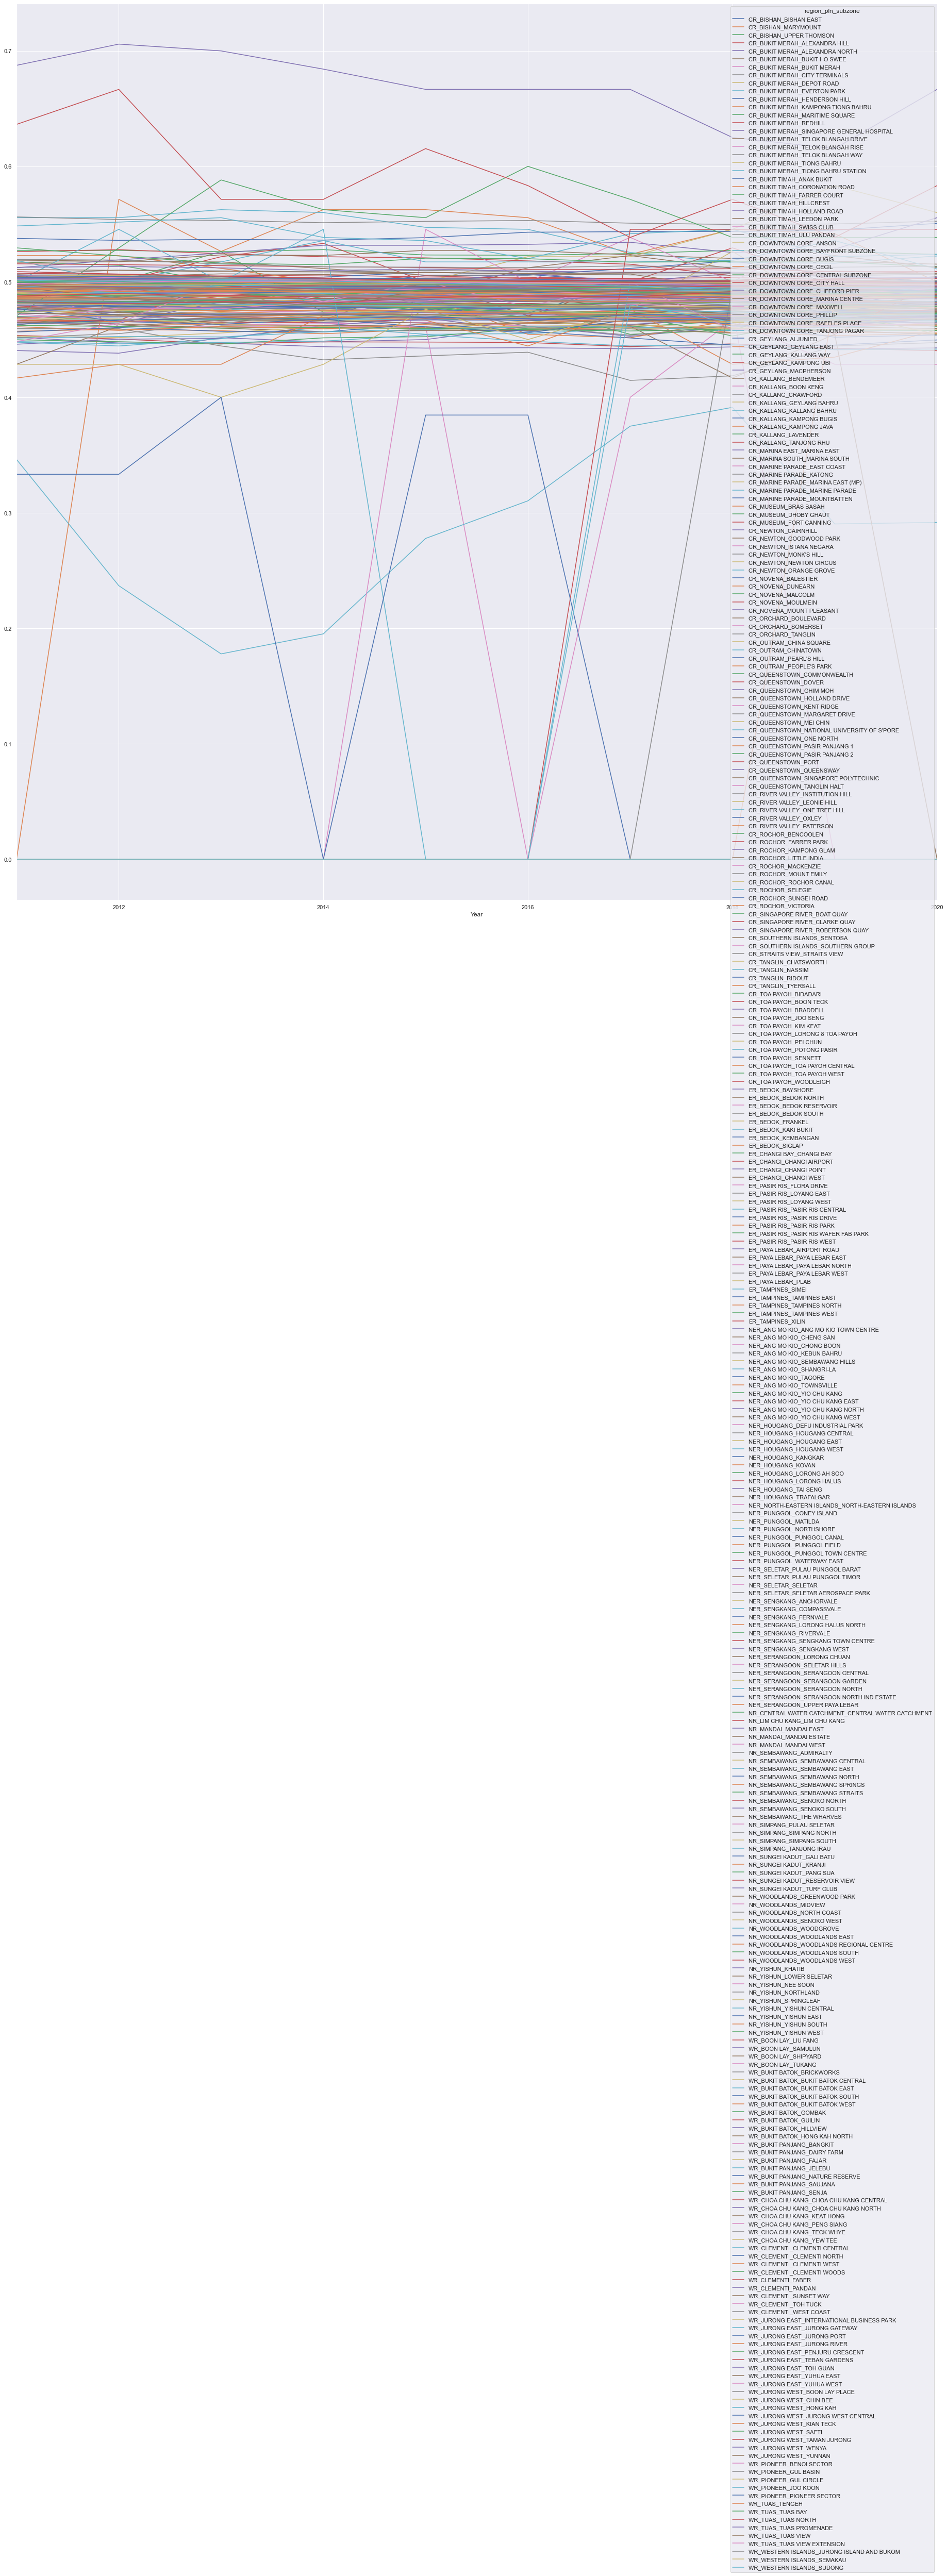

In [102]:
# plot all the subzones
dT_data1_hierarchical_pivoted.pivot(index="Year", columns="region_pln_subzone", values="Male Percentage").plot(figsize=(32,32))

## Ploting of Boxplot, HeatMap and Pairplot

In [103]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [104]:
dT_data1_hierarchical_pivoted.describe()

Male Percentage       00 - 19       20 - 39       40 - 59  \
count      3200.000000   3200.000000   3200.000000   3200.000000   
mean          0.350058   2640.884375   3362.015625   3628.731250   
std           0.220842   4061.645940   5159.500028   5287.249162   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.478731    890.000000   1100.000000   1360.000000   
75%           0.494444   3590.000000   4717.500000   4810.000000   
max           0.705882  34000.000000  39670.000000  38740.000000   

          60 & Over  Average Income  
count   3200.000000     3200.000000  
mean    2685.831250     9962.048126  
std     3854.678502     8482.546563  
min        0.000000        0.000000  
25%        0.000000        0.000000  
50%     1000.000000     9102.728755  
75%     4330.000000    20170.976561  
max    31530.000000    26058.000000

### Check the Relationship amongst Variables

Correlation between the variables, followed by all bi-variate jointplots.

                 Male Percentage   00 - 19   20 - 39   40 - 59  60 & Over  \
Male Percentage         1.000000  0.416203  0.177469  0.183530   0.186567   
00 - 19                 0.416203  1.000000  0.418749  0.418151   0.402430   
20 - 39                 0.177469  0.418749  1.000000  0.986954   0.912565   
40 - 59                 0.183530  0.418151  0.986954  1.000000   0.939673   
60 & Over               0.186567  0.402430  0.912565  0.939673   1.000000   
Average Income          0.731327  0.082800  0.015083  0.023634   0.006547   

                 Average Income  
Male Percentage        0.731327  
00 - 19                0.082800  
20 - 39                0.015083  
40 - 59                0.023634  
60 & Over              0.006547  
Average Income         1.000000  


<AxesSubplot:>

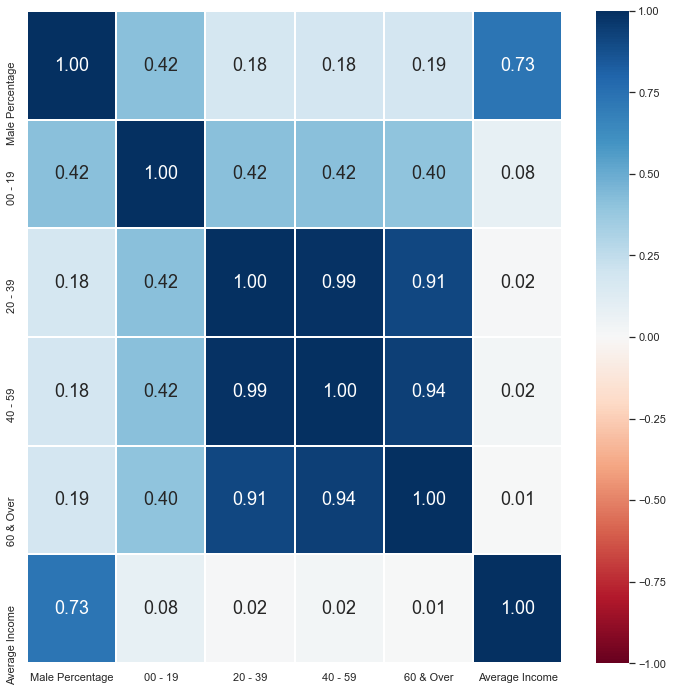

In [105]:
# Correlation Matrix
print(dT_data1_hierarchical_pivoted.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(dT_data1_hierarchical_pivoted.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

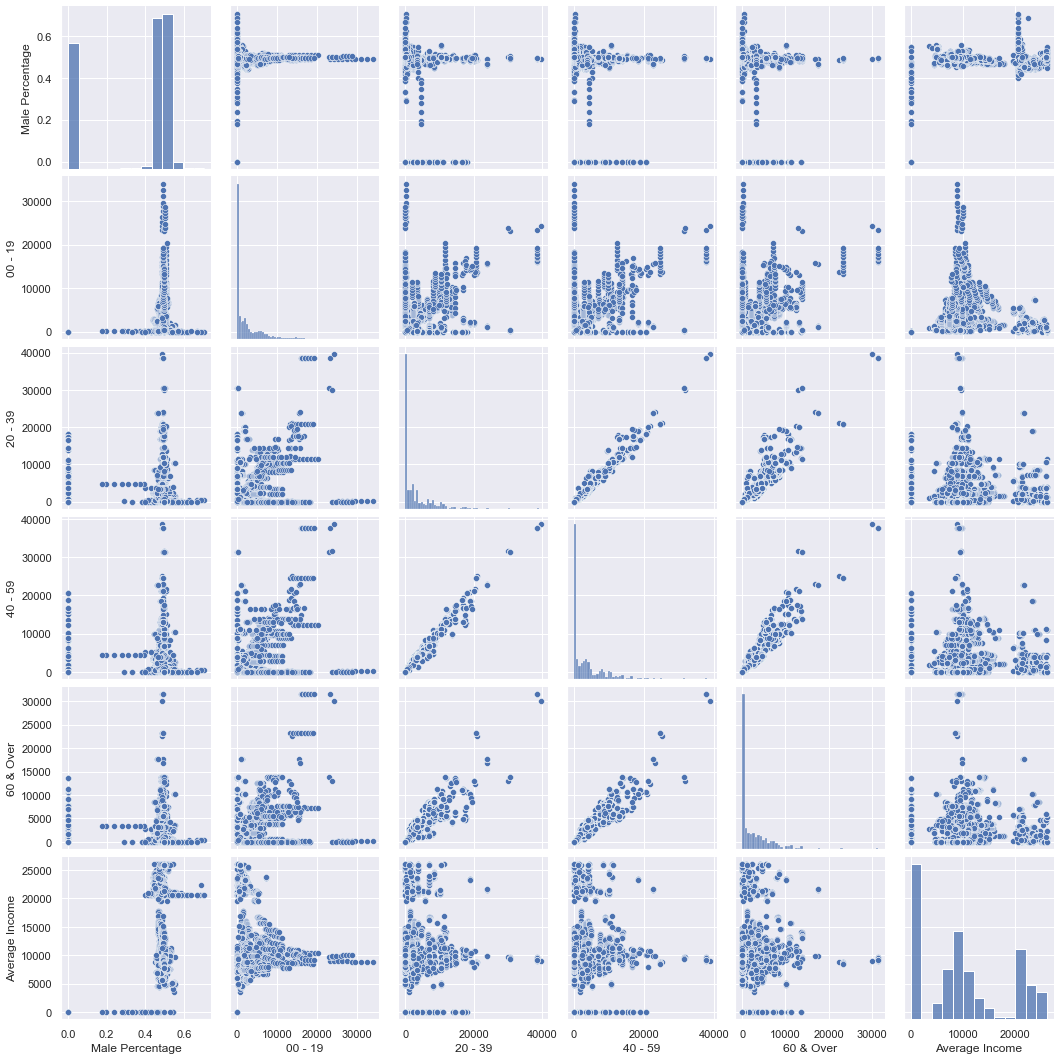

In [106]:
# Draw pairs of variables against one another
sb.pairplot(data = dT_data1_hierarchical_pivoted)

# Dataset 2 - Traffic and Demographics for 2021
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––

## Ploting of Boxplot, HeatMap and Pairplot

In [107]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Check the Variables Independently

Summary Statistics of `BusMRTGeoDataSubzone`, followed by Statistical Visualizations on the variables. 

In [108]:
BusMRTGeoData = BusMRTGeoDataSubzone.drop(columns=['BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'BUS_TAP_IN_TAP_OUT_VOLUME_PEAK', 'BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'BUS_PEAK_HOUR_PERCENTAGE (%)', 'BUS_WEEKDAY_PERCENTAGE (%)', 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'MRT_TAP_IN_TAP_OUT_VOLUME_PEAK', 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'MRT_PEAK_HOUR_PERCENTAGE (%)', 'MRT_WEEKDAY_PERCENTAGE (%)'])


BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  BUS_TAP_IN_TAP_OUT_VOLUME_PEAK  \
count                               86.000000                    8.600000e+01   
mean                            108302.976744                    5.970732e+05   
std                             122627.952452                    6.778048e+05   
min                               2500.000000                    1.409600e+04   
25%                              30005.000000                    1.678458e+05   
50%                              62490.500000                    3.526280e+05   
75%                             146909.750000                    8.114032e+05   
max                             745396.000000                    4.124510e+06   

       BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY  \
count                       8.600000e+01                      8.600000e+01   
mean                        6.528426e+05                      3.730118e+06   
std                         7.647330e+05                      4.372134e+06   
min                         1.204400e+04                      6.672000e+04   
25%                         1.751662e+05                      9.742288e+05   
50%                         3.923930e+05                      2.262110e+06   
75%                         8.328762e+05                      4.766020e+06   
max                         4.762371e+06                      2.716958e+07   

       BUS_PEAK_HOUR_PERCENTAGE (%)  BUS_WEEKDAY_PERCENTAGE (%)  \
count                     86.000000                   86.000000   
mean                      16.467967                   87.553741   
std                        2.292238                    2.534295   
min                       12.867787                   73.540619   
25%                       15.183711                   86.921074   
50%                       15.901693                   87.654454   
75%                       16.971289                   88.413075   
max                       27.424784                   95.112947   

       MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  MRT_TAP_IN_TAP_OUT_VOLUME_PEAK  \
count                               86.000000                    8.600000e+01   
mean                            108252.744186                    5.885211e+05   
std                              99278.429280                    5.417096e+05   
min                              11622.000000                    6.389400e+04   
25%                              39344.500000                    2.176400e+05   
50%                              82816.000000                    4.503945e+05   
75%                             131184.500000                    7.155975e+05   
max                             604550.000000                    3.314468e+06   

       MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY  \
count                       8.600000e+01                      8.600000e+01   
mean                        5.686369e+05                      3.234685e+06   
std                         5.360030e+05                      3.071347e+06   
min                         5.861400e+04                      3.357600e+05   
25%                         1.981518e+05                      1.187280e+06   
50%                         4.533150e+05                      2.576258e+06   
75%                         7.180805e+05                      4.092199e+06   
max                         3.342422e+06                      1.915497e+07   

       ...  TAP_IN_TAP_OUT_VOLUME_WEEKDAY  TAP_IN_TAP_OUT_VOLUME_WEEKLY  \
count  ...                   8.600000e+01                  8.600000e+01   
mean   ...                   1.221480e+06                  6.964802e+06   
std    ...                   1.112984e+06                  6.367739e+06   
min    ...                   7.405400e+04                  4.407360e+05   
25%    ...                   4.774005e+05                  2.600672e+06   
50%    ...                   8.993385e+05                  5.069507e+06   
75%    ...  

In [ ]:
BusMRTGeoDataNoSubzone = BusMRTGeoData.drop(columns=['SUBZONE_N'])
BusMRTGeoData1 = BusMRTGeoData.drop(columns=['TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK', 'TAP_IN_TAP_OUT_VOLUME_PEAK', 'TAP_IN_TAP_OUT_VOLUME_WEEKDAY', 'PEAK_HOUR_PERCENTAGE (%)', 'WEEKDAY_PERCENTAGE (%)'])


ValueError: could not convert string to float: 'ALJUNIED'

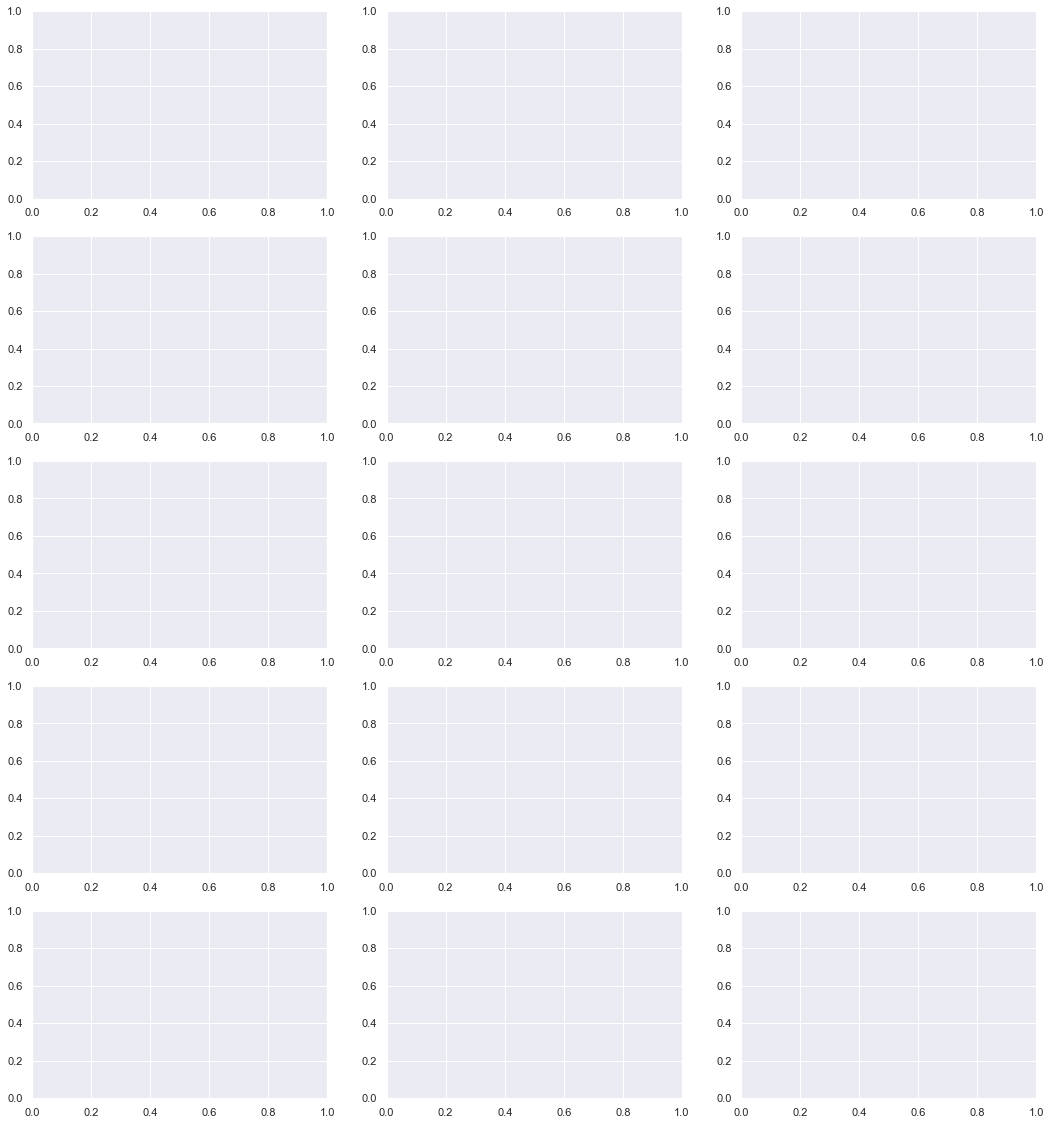

In [109]:
# Draw the distributions of all variables
f, axes = plt.subplots(12, 3, figsize=(15, 60))

count = 0
for var in BusMRTGeoDataNoSubzone:
    sb.boxplot(data = BusMRTGeoDataNoSubzone[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = BusMRTGeoDataNoSubzone[var], ax = axes[count,1])
    sb.violinplot(data = BusMRTGeoDataNoSubzone[var], orient = "h", ax = axes[count,2])
    count += 1

### Let's count the number of outliers in each variable

In [119]:
# Calculate the quartiles
Q1 = BusMRTGeoData.quantile(0.25)
Q3 = BusMRTGeoData.quantile(0.75)

# Rule to identify outliers
rule = ((BusMRTGeoData < (Q1 - 1.5 * (Q3 - Q1))) | (BusMRTGeoData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

(2020, 00 - 19)                            6
(2020, 20 - 39)                            2
(2020, 40 - 59)                            3
(2020, 60 & Over)                          3
(2020, Average Income)                     0
(2020, Male Percentage)                    7
BUS_PEAK_HOUR_PERCENTAGE (%)              10
BUS_TAP_IN_TAP_OUT_VOLUME_PEAK             3
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY          3
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK     3
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY           3
BUS_WEEKDAY_PERCENTAGE (%)                14
MRT_PEAK_HOUR_PERCENTAGE (%)               2
MRT_TAP_IN_TAP_OUT_VOLUME_PEAK             5
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY          4
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK     5
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY           4
MRT_WEEKDAY_PERCENTAGE (%)                 9
PEAK_HOUR_PERCENTAGE (%)                   8
SUBZONE_N                                  0
TAP_IN_TAP_OUT_VOLUME_PEAK                 4
TAP_IN_TAP_OUT_VOLUME_WEEKDAY              6
TAP_IN_TAP

### Check the Relationship amongst Variables

Correlation between the variables, followed by all bi-variate jointplots.

                                        BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK                                1.000000   
BUS_TAP_IN_TAP_OUT_VOLUME_PEAK                                        0.999901   
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY                                     0.996290   
BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY                                      0.995680   
BUS_PEAK_HOUR_PERCENTAGE (%)                                         -0.125586   
BUS_WEEKDAY_PERCENTAGE (%)                                            0.015294   
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK                                0.477151   
MRT_TAP_IN_TAP_OUT_VOLUME_PEAK                                        0.476780   
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY                                     0.462179   
MRT_TAP_IN_TAP_OUT_VOLUME_WEEKLY                                      0.460937   
MRT_PEAK_HOUR_PERCENTAGE (%)                                         -0.040143   
MRT_WEEKDAY_PERC

<AxesSubplot:>

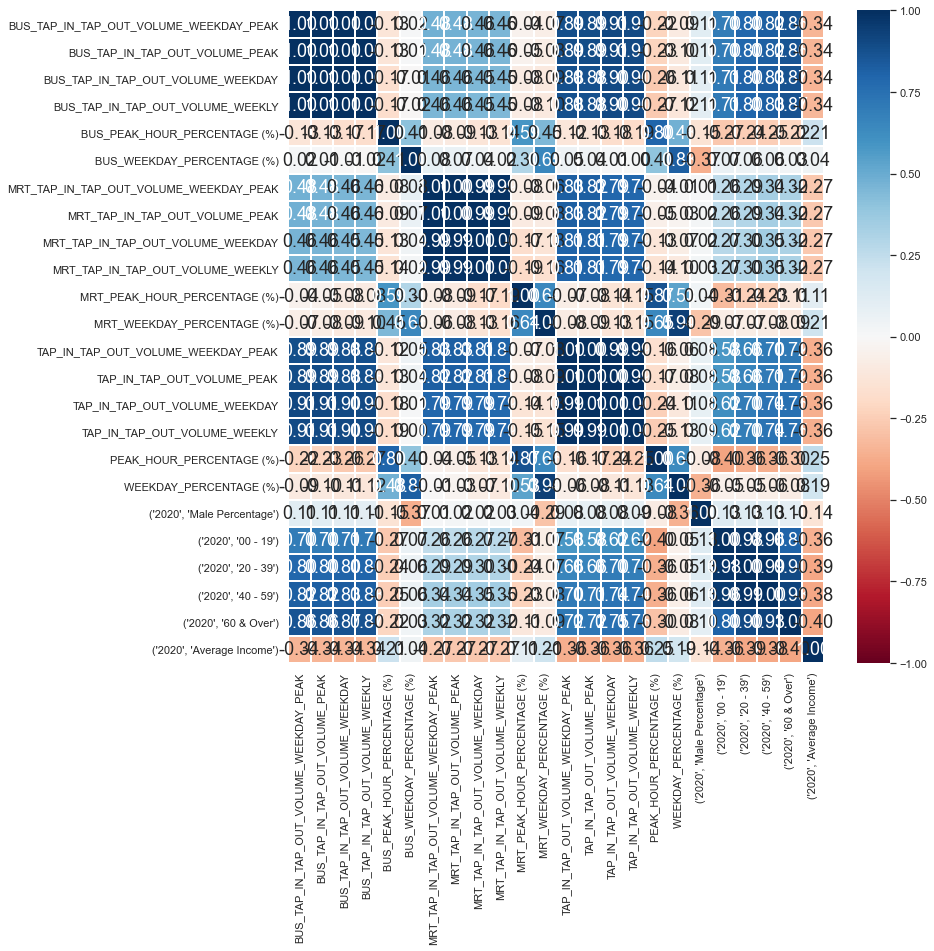

In [120]:
# Correlation Matrix
print(BusMRTGeoData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(BusMRTGeoData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

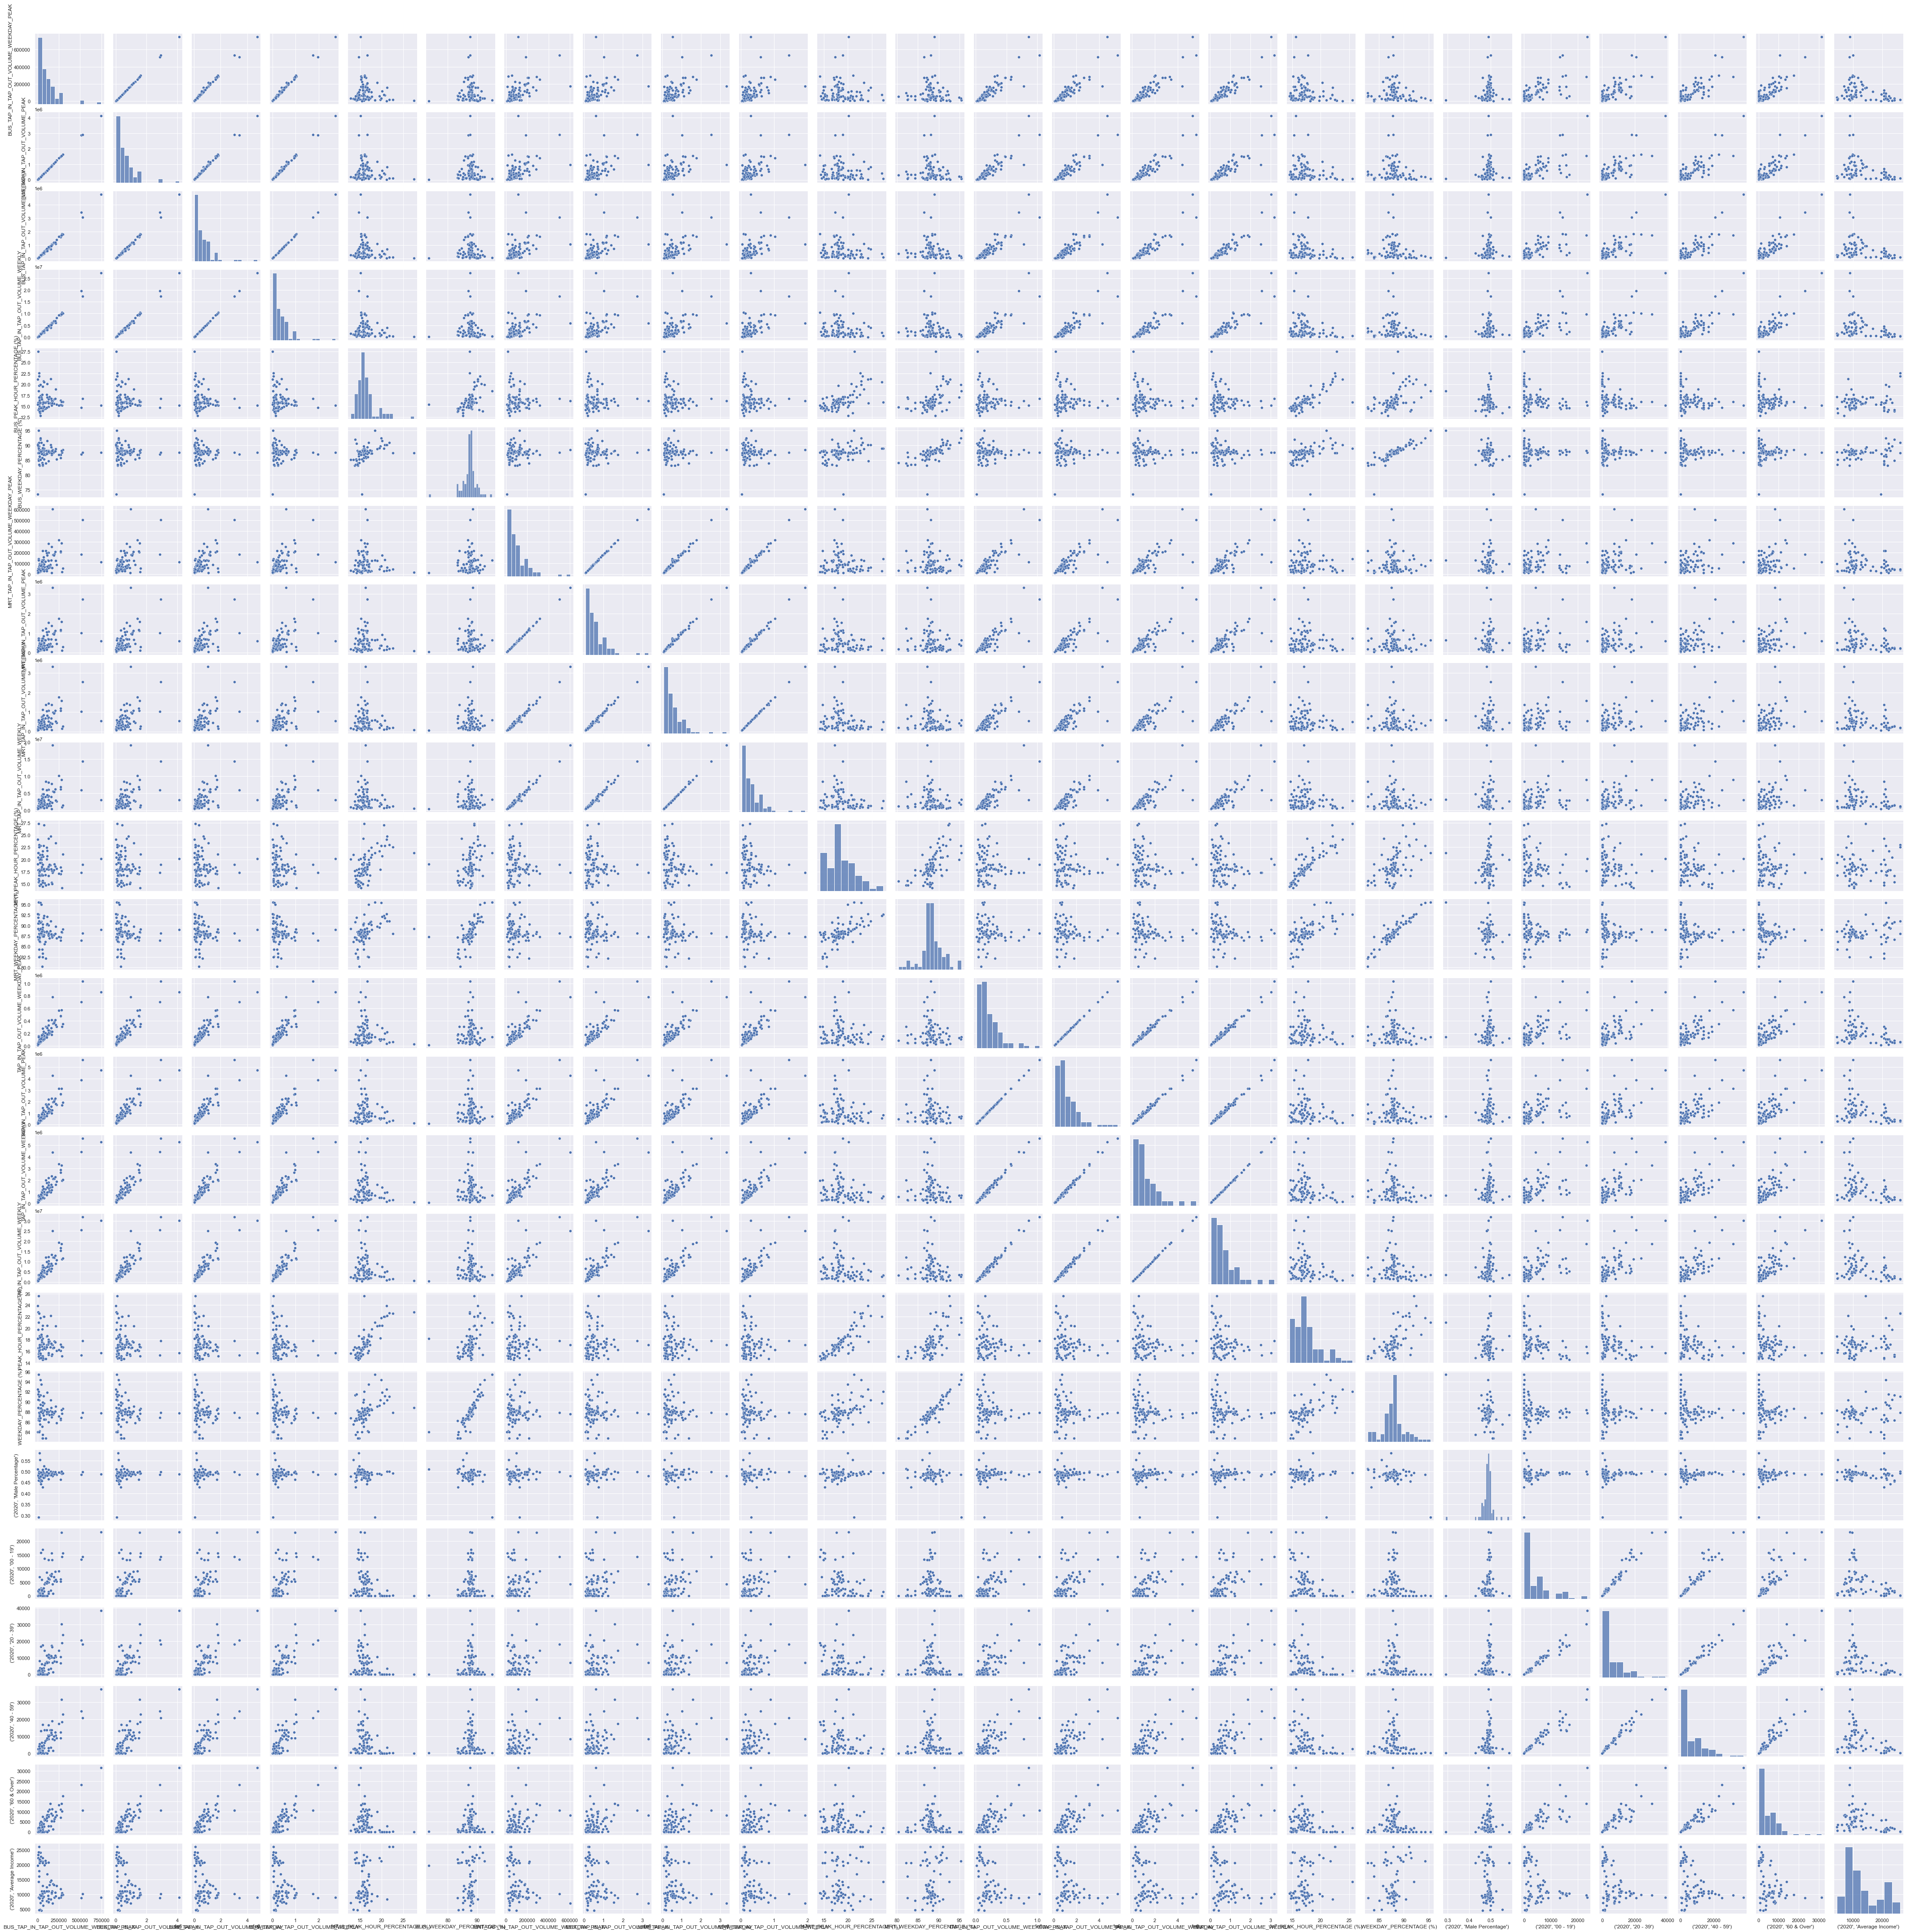

In [121]:
# Draw pairs of variables against one another
sb.pairplot(data = BusMRTGeoData)